In [1]:
import pandas as pd
import numpy as np
import matplotlib
colores = list(matplotlib.colors.cnames.keys())
import matplotlib.pyplot as plt
import datetime
import random
import numpy as np
import matplotlib.patches as mpatches
matplotlib.rcParams['figure.facecolor'] = "white"
from matplotlib import cm
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import seaborn as sns
from tqdm.notebook import tqdm
tqdm.pandas()

# VACUNAS

In [2]:
%%time
#vacunas_base = pd.read_csv("https://sisa.msal.gov.ar/datos/descargas/covid-19/files/datos_nomivac_covid19.zip")
#vacunas_base = pd.read_csv("/home/santiago/Downloads/datos_nomivac_covid19 (1).zip")

CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 3.81 µs


In [3]:
vacunas_base = pd.read_csv("/home/santiago/datos_nomivac_covid19_compressed.csv")

In [4]:
condiciones = {'60 o más años': '>60',
 'Salud':'Salud',
 '18 a 59 años CON Factores de Riesgo': 'Riesgo',
 'Estratégico': 'Estratégico',
 'Otros': 'Otros',
 '12 a 17 años CON Factores de Riesgo': 'Riesgo 12-17',
 '40 a 49 años SIN Factores de Riesgo': 'Población general',
 '50 a 59 años SIN Factores de Riesgo': 'Población general',
 '18 a 39 años SIN Factores de Riesgo': 'Población general',
 '12 a 17 años SIN Factores de Riesgo': 'Población general 12-17',
 '3 a 11 años SIN Factores de Riesgo': 'Población general 3-11',
               '3 a 11 años CON Factores de Riesgo': 'Riesgo 3-11'
              }

for i in set(vacunas_base["condicion_aplicacion"]):
    if i not in condiciones: print("Falta describir condición", i)



In [5]:
vacunas_base.loc[vacunas_base.orden_dosis == 4, "orden_dosis"] = 3

In [6]:
vacunas_base["condicion_aplicacion"] = vacunas_base["condicion_aplicacion"].map(condiciones)

In [7]:
# print(len(vacunas_base))
# vacunas_base = vacunas_base.groupby(['sexo', 'grupo_etario', 'jurisdiccion_residencia',
#        'jurisdiccion_residencia_id', 'depto_residencia', 'depto_residencia_id',
#        'jurisdiccion_aplicacion', 'jurisdiccion_aplicacion_id',
#        'depto_aplicacion', 'depto_aplicacion_id', 'fecha_aplicacion', 'vacuna',
#        'condicion_aplicacion', 'orden_dosis'], as_index = False).count()
# print(len(vacunas_base))

In [8]:
vacunas_base.loc[vacunas_base.grupo_etario == '<12',"grupo_etario"] = '3-11'

vacunas_base.loc[vacunas_base.condicion_aplicacion == 'Riesgo 12-17',"grupo_etario"] = '12-17'
vacunas_base.loc[vacunas_base.condicion_aplicacion == 'Población general 12-17',"grupo_etario"] = '12-17'
vacunas_base.loc[vacunas_base.condicion_aplicacion == 'Riesgo 3-11',"grupo_etario"] = '3-11'
vacunas_base.loc[vacunas_base.condicion_aplicacion == 'Población general 3-11',"grupo_etario"] = '3-11'

In [9]:
vacunas_base.to_pickle("vacunas_base.pkl")

# DESDE LA LECTURA PKL

In [2]:
vacunas_base = pd.read_pickle("vacunas_base.pkl")

In [3]:
vacunas_base.rename(columns = {"count":"lote_vacuna"}, inplace = True)

In [13]:
primeras = vacunas_base[vacunas_base.orden_dosis == 1].groupby(["jurisdiccion_residencia","vacuna","fecha_aplicacion"],as_index = False).sum()[["jurisdiccion_residencia","vacuna","fecha_aplicacion","lote_vacuna"]]
segundas = vacunas_base[vacunas_base.orden_dosis == 2].groupby(["jurisdiccion_residencia","vacuna","fecha_aplicacion"],as_index = False).sum()[["jurisdiccion_residencia","vacuna","fecha_aplicacion","lote_vacuna"]]
primeras = primeras.rename(columns = {"lote_vacuna":"primera_dosis_cantidad","vacuna":"vacuna_nombre", "jurisdiccion_residencia":"jurisdiccion_nombre","fecha_aplicacion":"fecha"})
segundas = segundas.rename(columns = {"lote_vacuna":"segunda_dosis_cantidad"})
vacunas_file_alt = primeras.merge(segundas,how = "outer", left_on = ["vacuna_nombre","jurisdiccion_nombre","fecha"], right_on = ["vacuna","jurisdiccion_residencia","fecha_aplicacion"])


In [14]:
vacunas_base_grouped= vacunas_base.groupby(["jurisdiccion_residencia","grupo_etario",
                      "condicion_aplicacion","fecha_aplicacion","orden_dosis"],as_index = False).sum()[["jurisdiccion_residencia","grupo_etario",
                      "condicion_aplicacion","fecha_aplicacion","orden_dosis","lote_vacuna"]]
vacunas_base_grouped = vacunas_base_grouped.rename(columns = {"lote_vacuna":"cantidad"})
print((vacunas_base_grouped["fecha_aplicacion"] == 'S.I.').sum(), "vacunas sin fecha, reemplazadas por 2021-03-01")
vacunas_base_grouped["fecha_aplicacion"] = vacunas_base_grouped["fecha_aplicacion"].str.replace('S.I.',"2021-03-01") 
vacunas_base_grouped["fecha_aplicacion"] = pd.to_datetime(vacunas_base_grouped["fecha_aplicacion"])

0 vacunas sin fecha, reemplazadas por 2021-03-01


In [15]:
max(vacunas_base_grouped["fecha_aplicacion"])

Timestamp('2021-12-22 00:00:00')

In [16]:
try: 
    #vacunas_base = pd.reBREAKad_csv("https://sisa.msal.gov.ar/datos/descargas/covid-19/files/datos_nomivac_covid19.zip")
    primeras = vacunas_base[vacunas_base.orden_dosis == 1].groupby(["jurisdiccion_residencia","vacuna"],as_index = False).sum()[["jurisdiccion_residencia","vacuna","lote_vacuna"]]
    segundas = vacunas_base[vacunas_base.orden_dosis == 2].groupby(["jurisdiccion_residencia","vacuna"],as_index = False).sum()[["jurisdiccion_residencia","vacuna","lote_vacuna"]]
    terceras = vacunas_base[vacunas_base.orden_dosis == 3].groupby(["jurisdiccion_residencia","vacuna"],as_index = False).sum()[["jurisdiccion_residencia","vacuna","lote_vacuna"]]

    primeras = primeras.rename(columns = {"lote_vacuna":"primera_dosis_cantidad","vacuna":"vacuna_nombre", "jurisdiccion_residencia":"jurisdiccion_nombre"})
    segundas = segundas.rename(columns = {"lote_vacuna":"segunda_dosis_cantidad"})
    terceras = terceras.rename(columns = {"lote_vacuna":"tercera_dosis_cantidad"})
    vacunas_file = primeras.merge(segundas,how="outer", left_on = ["vacuna_nombre","jurisdiccion_nombre"], right_on = ["vacuna","jurisdiccion_residencia"]).merge(terceras,how="outer", left_on = ["vacuna_nombre","jurisdiccion_nombre"], right_on = ["vacuna","jurisdiccion_residencia"])
    vacunas_file = vacunas_file.fillna(0)
    print("LEIDO DE LA BASE DESAGREGADA")
except:
    vacunas_file = pd.read_csv("https://sisa.msal.gov.ar/datos/descargas/covid-19/files/Covid19VacunasAgrupadas.csv.zip")
    print("LEIDO DE LA AGREGADA")
vacunas = vacunas_file.groupby("jurisdiccion_nombre",as_index = False).sum()
vacunas = vacunas[vacunas.jurisdiccion_nombre != "S.I."] 
poblaciones = dict(zip(pd.read_csv("poblacion_provincial.csv").Provincia,pd.read_csv("poblacion_provincial.csv").Población))
distribuidas = dict(zip(pd.read_csv("poblacion_provincial.csv").Provincia,pd.read_csv("poblacion_provincial.csv").Distribuidas))
datos_pba = False
datos_caba = False

LEIDO DE LA BASE DESAGREGADA


In [17]:
vacunas = vacunas[~vacunas.jurisdiccion_nombre.isin(["Ministerio de Salud de la Nación","0",0])]

In [18]:
for col in vacunas:
    if col[-8:] == "cantidad":
        vacunas[col] = vacunas[col].astype(float).astype(int)
  

In [19]:
primer_envio = dict(zip(pd.read_csv("poblacion_provincial.csv").Provincia,pd.read_csv("poblacion_provincial.csv").Primer_Envio))
vacunas["poblacion"] = [poblaciones[i] for i in vacunas.jurisdiccion_nombre]
vacunas["distribuidas"] = [distribuidas[i] for i in vacunas.jurisdiccion_nombre]

vacunas["primer_envio"] = [primer_envio[i] for i in vacunas.jurisdiccion_nombre]

vacunas["porcentaje_primera"] = vacunas.primera_dosis_cantidad / vacunas.poblacion * 100
vacunas["porcentaje_primer_envio"] = vacunas.primera_dosis_cantidad / vacunas.primer_envio * 100

vacunas["porcentaje_segunda"] = vacunas.segunda_dosis_cantidad / vacunas.poblacion * 100
vacunas.sort_values("jurisdiccion_nombre", ascending = False ,inplace = True)
vacunas["jurisdiccion_nombre"] =vacunas.jurisdiccion_nombre.str.replace('Santiago','S.')
vacunas["jurisdiccion_nombre"] =vacunas.jurisdiccion_nombre.str.replace('Tierra','T.')

if datos_pba:
    vacunas.loc[vacunas.jurisdiccion_nombre == "Buenos Aires", "jurisdiccion_nombre"] = "Buenos Aires*"
    
if datos_caba:
    vacunas.loc[vacunas.jurisdiccion_nombre == "CABA", "jurisdiccion_nombre"] = "CABA*"

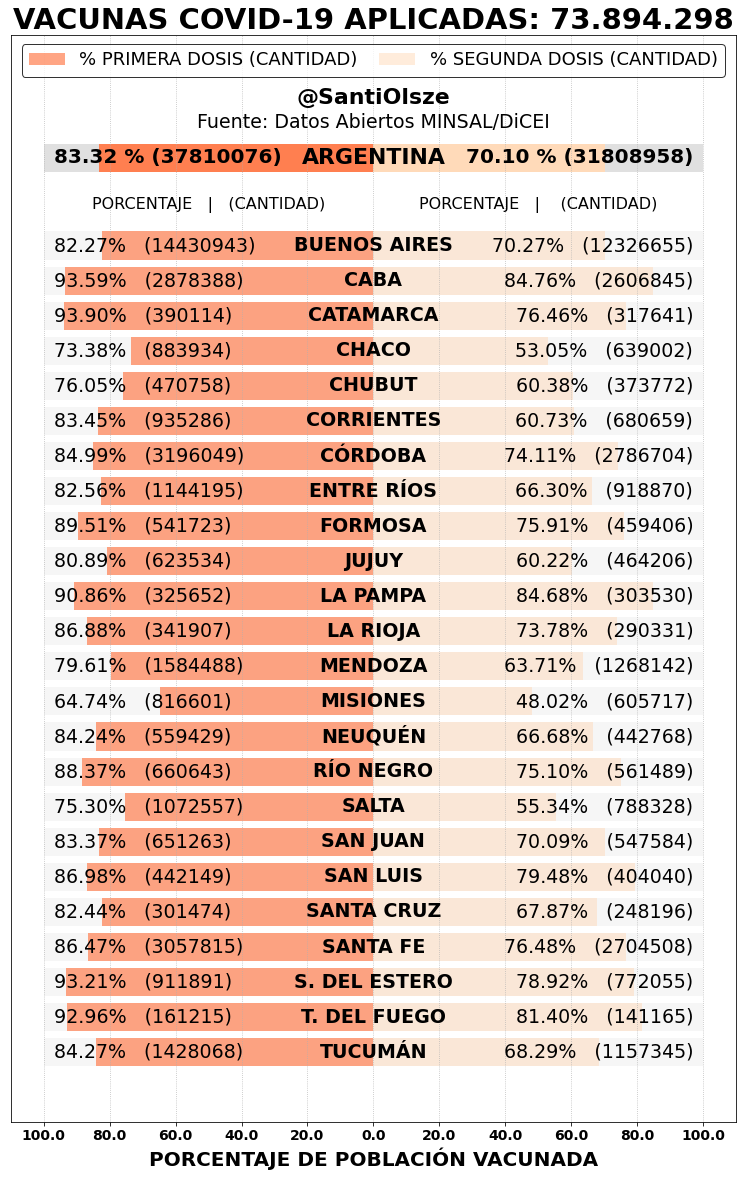

In [20]:
reminder = True
#reminder = bool(input("CARGASTE LOS DATOS DE PBA (True or False)?:    "))
if reminder:
    xmax = 100
    nticks = 11
    colora = "coral"
    colorb = "peachpuff"
    #colora = "lightgreen"
    #colorb = "mediumseagreen"

    fig, ax = plt.subplots(figsize = (13,20))
    ax.barh(vacunas.jurisdiccion_nombre, [-xmax for i in range(len(vacunas.jurisdiccion_nombre))], align='center', color = "lightgray", alpha = 0.2)
    ax.barh(vacunas.jurisdiccion_nombre, [xmax for i in range(len(vacunas.jurisdiccion_nombre))], align='center', color = "lightgray", alpha = 0.2)

    ax.barh(vacunas.jurisdiccion_nombre, vacunas.porcentaje_primera*-1, align='center'
            , label = "% Primera dosis (cantidad)".upper(), alpha = 0.7,color= colora) #color = "salmon
    ax.barh(vacunas.jurisdiccion_nombre, vacunas.porcentaje_segunda
            , align='center',  label = "% Segunda dosis (cantidad)".upper(), alpha = 0.5
           , color = colorb) #color= "deepskyblue"

    plt.grid(alpha = 0.9, ls = ":")

    for pais in vacunas.jurisdiccion_nombre:
        if pais != "S.I.":
            plt.text(0, pais, s = pais.upper(), ha = "center", va = "center", fontsize = 19, fontweight = "bold", color = "k")
            porc = round(vacunas[vacunas.jurisdiccion_nombre == pais].porcentaje_primera.item(),2)
            absoluto = str(vacunas[vacunas.jurisdiccion_nombre == pais].primera_dosis_cantidad.item())
            plt.text(-xmax*.97, pais, s = format(porc, '.2f') + "%   (" + absoluto + ")", ha = "left", va = "center", fontsize = 19, color = "k")
            porc = round(vacunas[vacunas.jurisdiccion_nombre == pais].porcentaje_segunda.item(),2)
            absoluto = str(vacunas[vacunas.jurisdiccion_nombre == pais].segunda_dosis_cantidad.item())
            plt.text(xmax*0.97, pais, s = format(porc, '.2f') + "%   (" + absoluto + ")", ha = "right", va = "center", fontsize = 19, color = "k")



    plt.text(0,27.05,"@SantiOlsze", fontsize = 22, fontweight = "bold", ha = "center")
    plt.ylim(-2,29)
    ax.set_facecolor("white")
    plt.yticks([], fontsize = 15, fontweight = "bold")
    plt.xticks(np.linspace(-xmax,xmax,nticks).astype(int),[i for i in abs(np.linspace(-xmax,xmax,nticks))], fontsize = 14, fontweight = "bold")
    leg = plt.legend(loc = "upper center", ncol = 2 , fontsize = 18,columnspacing = 1.2)
    leg.get_frame().set_edgecolor('k')
    # plt.title("MUERTES POR MILLON DE HABITANTES", fontsize = 25, fontweight = "bold")
    plt.xlabel("PORCENTAJE DE POBLACIÓN VACUNADA", fontsize = 20, fontweight = "bold")

    pais = 25.5



    ax.barh(pais, -xmax, align='center', color = "lightgray", alpha = 0.7)
    ax.barh(pais, xmax, align='center', color = "lightgray", alpha = 0.7)
    ax.barh(pais, sum(vacunas.primera_dosis_cantidad)/sum(vacunas.poblacion)*-100,color = colora) #color = "salmon")
    ax.barh(pais, sum(vacunas.segunda_dosis_cantidad)/sum(vacunas.poblacion)*100, color = colorb)#color = "deepskyblue")

    plt.text(0, pais, s = "ARGENTINA", ha = "center", va = "center", fontsize = 22, fontweight = "bold", color = "k")

    porc = round(sum(vacunas.primera_dosis_cantidad)/sum(vacunas.poblacion)*-100,2)
    absoluto = str(sum(vacunas.primera_dosis_cantidad))
    total = int(absoluto)
    plt.text(-xmax*.97, pais, s = format(porc*-1, '.2f') + " % (" + absoluto + ")", ha = "left", va = "center", fontsize = 20, color = "k", fontweight = "bold")
    porc = round(sum(vacunas.segunda_dosis_cantidad)/sum(vacunas.poblacion)*-100,2)
    absoluto = str(sum(vacunas.segunda_dosis_cantidad))
    plt.text(xmax*.97, pais, s = format(porc*-1, '.2f') + " % (" + absoluto + ")", ha = "right", va = "center", fontsize = 20, color = "k", fontweight = "bold")
    
    absoluto3 = str(sum(vacunas.tercera_dosis_cantidad))

    total = total + int(absoluto) + int(absoluto3)
    plt.text(-xmax/2,pais -1.35, s = "PORCENTAJE   |   (CANTIDAD)", ha = "center", va = "center", fontsize = 16, color = "k")
    plt.text(xmax/2,pais -1.35, s = "PORCENTAJE   |    (CANTIDAD)", ha = "center", va = "center", fontsize = 16, color = "k")
        
    
    if total < 1000000:
        text = str(total)[-6:-3] + "." + str(total)[-3:]
        plt.title("VACUNAS COVID-19 APLICADAS: "+ text, fontsize = 31, fontweight = "bold")
    else: 
        text = str(total)[:-6] +  "." + str(total)[-6:-3] + "." + str(total)[-3:]
        plt.title("VACUNAS COVID-19 APLICADAS: "+ text, fontsize = 29, fontweight = "bold")

    if datos_pba and datos_caba:
        plt.text(0,-1.2, "* Los datos de PBA están tomados de https://portal-coronavirus.gba.gob.ar/sala-de-situacion\n y los de CABA de https://www.buenosaires.gob.ar/coronavirus/datos/vacunacion" ,ha = "center", va = "center", fontsize = 14)
        plt.text(0,26.35,"Fuente: Datos Abiertos MINSAL/DiCEI + Sala de Situación PBA* + Datos Abiertos GCBA*", fontsize = 15, ha = "center")
    
    elif datos_pba:
        plt.text(0,-1.2, "* Los datos de PBA están tomados de https://portal-coronavirus.gba.gob.ar/sala-de-situacion\n" ,ha = "center", va = "center", fontsize = 14)
        plt.text(0,26.35,"Fuente: Datos Abiertos MINSAL/DiCEI + Sala de Situación PBA*", fontsize = 15, ha = "center")
        
    else: 
        plt.text(0,26.35,"Fuente: Datos Abiertos MINSAL/DiCEI", fontsize = 19, ha = "center")

    
  
    plt.savefig("vac_arg", bbox_inches = "tight")


In [21]:
vacunas.tercera_dosis_cantidad.sum()

4275264

In [22]:
round(sum(vacunas.primera_dosis_cantidad)/sum(vacunas.poblacion)*-100,6)

-83.324754

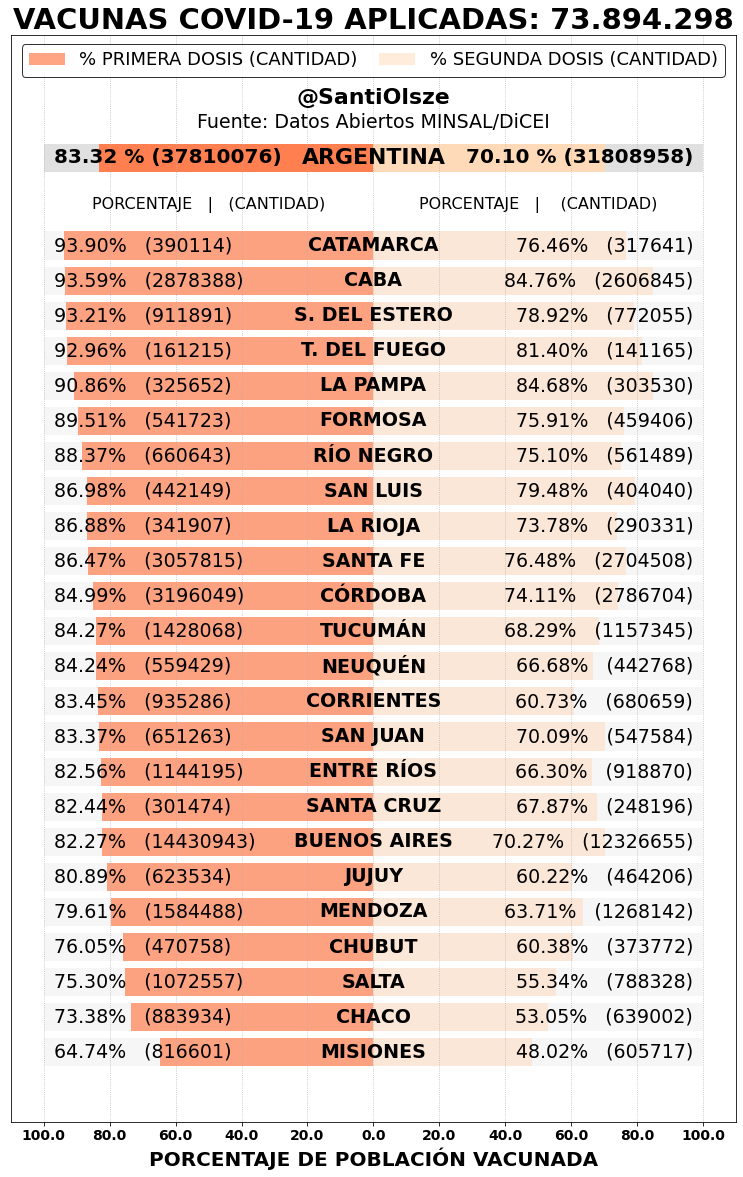

In [23]:
reminder = True
#reminder = bool(input("CARGASTE LOS DATOS DE PBA (True or False)?:    "))
if reminder:
    xmax = 100
    nticks = 11

    colora = "coral"
    colorb = "peachpuff"
    
    vacunas.sort_values("porcentaje_primera",ascending = True, inplace = True) 
    
    fig, ax = plt.subplots(figsize = (13,20))
    ax.barh(vacunas.jurisdiccion_nombre, [-xmax for i in range(len(vacunas.jurisdiccion_nombre))], align='center', color = "lightgray", alpha = 0.2)
    ax.barh(vacunas.jurisdiccion_nombre, [xmax for i in range(len(vacunas.jurisdiccion_nombre))], align='center', color = "lightgray", alpha = 0.2)

    ax.barh(vacunas.jurisdiccion_nombre, vacunas.porcentaje_primera*-1, align='center'
            , label = "% Primera dosis (cantidad)".upper(), alpha = 0.7,color= colora) #color = "salmon
    ax.barh(vacunas.jurisdiccion_nombre, vacunas.porcentaje_segunda
            , align='center',  label = "% Segunda dosis (cantidad)".upper(), alpha = 0.5
           , color = colorb) #color= "deepskyblue"

    plt.grid(alpha = 0.9, ls = ":")

    for pais in vacunas.jurisdiccion_nombre:
        plt.text(0, pais, s = pais.upper(), ha = "center", va = "center", fontsize = 19, fontweight = "bold", color = "k")
        porc = round(vacunas[vacunas.jurisdiccion_nombre == pais].porcentaje_primera.item(),2)
        absoluto = str(vacunas[vacunas.jurisdiccion_nombre == pais].primera_dosis_cantidad.item())
        plt.text(-xmax*.97, pais, s = format(porc, '.2f') + "%   (" + absoluto + ")", ha = "left", va = "center", fontsize = 19, color = "k")
        porc = round(vacunas[vacunas.jurisdiccion_nombre == pais].porcentaje_segunda.item(),2)
        absoluto = str(vacunas[vacunas.jurisdiccion_nombre == pais].segunda_dosis_cantidad.item())
        plt.text(xmax*0.97, pais, s = format(porc, '.2f') + "%   (" + absoluto + ")", ha = "right", va = "center", fontsize = 19, color = "k")



    plt.text(0,27.05,"@SantiOlsze", fontsize = 22, fontweight = "bold", ha = "center")
    plt.ylim(-2,29)
    ax.set_facecolor("white")
    plt.yticks([], fontsize = 15, fontweight = "bold")
    plt.xticks(np.linspace(-xmax,xmax,nticks).astype(int),[i for i in abs(np.linspace(-xmax,xmax,nticks))], fontsize = 14, fontweight = "bold")
    leg = plt.legend(loc = "upper center", ncol = 2 , fontsize = 18,columnspacing = 1.2)
    leg.get_frame().set_edgecolor('k')
    # plt.title("MUERTES POR MILLON DE HABITANTES", fontsize = 25, fontweight = "bold")
    plt.xlabel("PORCENTAJE DE POBLACIÓN VACUNADA", fontsize = 20, fontweight = "bold")

    pais = 25.5



    ax.barh(pais, -xmax, align='center', color = "lightgray", alpha = 0.7)
    ax.barh(pais, xmax, align='center', color = "lightgray", alpha = 0.7)
    ax.barh(pais, sum(vacunas.primera_dosis_cantidad)/sum(vacunas.poblacion)*-100,color = colora) #color = "salmon")
    ax.barh(pais, sum(vacunas.segunda_dosis_cantidad)/sum(vacunas.poblacion)*100, color = colorb)#color = "deepskyblue")

    plt.text(0, pais, s = "ARGENTINA", ha = "center", va = "center", fontsize = 22, fontweight = "bold", color = "k")

    porc = round(sum(vacunas.primera_dosis_cantidad)/sum(vacunas.poblacion)*-100,2)
    absoluto = str(sum(vacunas.primera_dosis_cantidad))
    total = int(absoluto)
    plt.text(-xmax*.97, pais, s = format(porc*-1, '.2f') + " % (" + absoluto + ")", ha = "left", va = "center", fontsize = 20, color = "k", fontweight = "bold")
    porc = round(sum(vacunas.segunda_dosis_cantidad)/sum(vacunas.poblacion)*-100,2)
    absoluto = str(sum(vacunas.segunda_dosis_cantidad))
    plt.text(xmax*.97, pais, s = format(porc*-1, '.2f') + " % (" + absoluto + ")", ha = "right", va = "center", fontsize = 20, color = "k", fontweight = "bold")
    absoluto3 = str(sum(vacunas.tercera_dosis_cantidad))
    total = total + int(absoluto) + int(absoluto3)
    plt.text(-xmax/2,pais -1.35, s = "PORCENTAJE   |   (CANTIDAD)", ha = "center", va = "center", fontsize = 16, color = "k")
    plt.text(xmax/2,pais -1.35, s = "PORCENTAJE   |    (CANTIDAD)", ha = "center", va = "center", fontsize = 16, color = "k")
        
    
    if total < 1000000:
        text = str(total)[-6:-3] + "." + str(total)[-3:]
        plt.title("VACUNAS COVID-19 APLICADAS: "+ text, fontsize = 31, fontweight = "bold")
    else: 
        text = str(total)[:-6] +  "." + str(total)[-6:-3] + "." + str(total)[-3:]
        plt.title("VACUNAS COVID-19 APLICADAS: "+ text, fontsize = 29, fontweight = "bold")

    if datos_pba and datos_caba:
        plt.text(0,-1.2, "* Los datos de PBA están tomados de https://portal-coronavirus.gba.gob.ar/sala-de-situacion\n y los de CABA de https://www.buenosaires.gob.ar/coronavirus/datos/vacunacion" ,ha = "center", va = "center", fontsize = 14)
        plt.text(0,26.35,"Fuente: Datos Abiertos MINSAL/DiCEI + Sala de Situación PBA* + Datos Abiertos GCBA*", fontsize = 15, ha = "center")
    
    elif datos_pba:
        plt.text(0,-1.2, "* Los datos de PBA están tomados de https://portal-coronavirus.gba.gob.ar/sala-de-situacion\n" ,ha = "center", va = "center", fontsize = 14)
        plt.text(0,26.35,"Fuente: Datos Abiertos MINSAL/DiCEI + Sala de Situación PBA*", fontsize = 15, ha = "center")
        
    else: 
        plt.text(0,26.35,"Fuente: Datos Abiertos MINSAL/DiCEI", fontsize = 19, ha = "center")

    plt.savefig("vac_arg_sorted", bbox_inches = "tight")

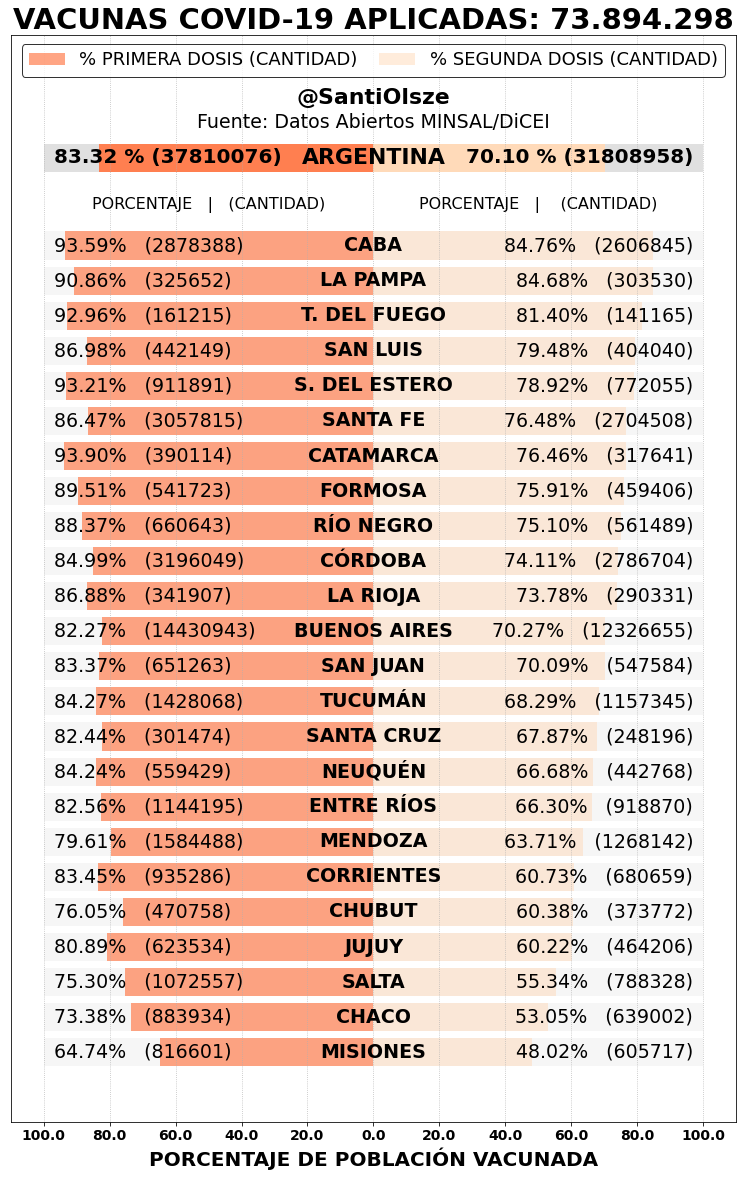

In [24]:
reminder = True
#reminder = bool(input("CARGASTE LOS DATOS DE PBA (True or False)?:    "))
if reminder:
    xmax = 100
    nticks = 11

    colora = "coral"
    colorb = "peachpuff"
    
    vacunas.sort_values("porcentaje_segunda",ascending = True, inplace = True) 
    
    fig, ax = plt.subplots(figsize = (13,20))
    ax.barh(vacunas.jurisdiccion_nombre, [-xmax for i in range(len(vacunas.jurisdiccion_nombre))], align='center', color = "lightgray", alpha = 0.2)
    ax.barh(vacunas.jurisdiccion_nombre, [xmax for i in range(len(vacunas.jurisdiccion_nombre))], align='center', color = "lightgray", alpha = 0.2)

    ax.barh(vacunas.jurisdiccion_nombre, vacunas.porcentaje_primera*-1, align='center'
            , label = "% Primera dosis (cantidad)".upper(), alpha = 0.7,color= colora) #color = "salmon
    ax.barh(vacunas.jurisdiccion_nombre, vacunas.porcentaje_segunda
            , align='center',  label = "% Segunda dosis (cantidad)".upper(), alpha = 0.5
           , color = colorb) #color= "deepskyblue"

    plt.grid(alpha = 0.9, ls = ":")

    for pais in vacunas.jurisdiccion_nombre:
        plt.text(0, pais, s = pais.upper(), ha = "center", va = "center", fontsize = 19, fontweight = "bold", color = "k")
        porc = round(vacunas[vacunas.jurisdiccion_nombre == pais].porcentaje_primera.item(),2)
        absoluto = str(vacunas[vacunas.jurisdiccion_nombre == pais].primera_dosis_cantidad.item())
        plt.text(-xmax*.97, pais, s = format(porc, '.2f') + "%   (" + absoluto + ")", ha = "left", va = "center", fontsize = 19, color = "k")
        porc = round(vacunas[vacunas.jurisdiccion_nombre == pais].porcentaje_segunda.item(),2)
        absoluto = str(vacunas[vacunas.jurisdiccion_nombre == pais].segunda_dosis_cantidad.item())
        plt.text(xmax*0.97, pais, s = format(porc, '.2f') + "%   (" + absoluto + ")", ha = "right", va = "center", fontsize = 19, color = "k")



    plt.text(0,27.05,"@SantiOlsze", fontsize = 22, fontweight = "bold", ha = "center")
    plt.ylim(-2,29)
    ax.set_facecolor("white")
    plt.yticks([], fontsize = 15, fontweight = "bold")
    plt.xticks(np.linspace(-xmax,xmax,nticks).astype(int),[i for i in abs(np.linspace(-xmax,xmax,nticks))], fontsize = 14, fontweight = "bold")
    leg = plt.legend(loc = "upper center", ncol = 2 , fontsize = 18,columnspacing = 1.2)
    leg.get_frame().set_edgecolor('k')
    # plt.title("MUERTES POR MILLON DE HABITANTES", fontsize = 25, fontweight = "bold")
    plt.xlabel("PORCENTAJE DE POBLACIÓN VACUNADA", fontsize = 20, fontweight = "bold")

    pais = 25.5



    ax.barh(pais, -xmax, align='center', color = "lightgray", alpha = 0.7)
    ax.barh(pais, xmax, align='center', color = "lightgray", alpha = 0.7)
    ax.barh(pais, sum(vacunas.primera_dosis_cantidad)/sum(vacunas.poblacion)*-100,color = colora) #color = "salmon")
    ax.barh(pais, sum(vacunas.segunda_dosis_cantidad)/sum(vacunas.poblacion)*100, color = colorb)#color = "deepskyblue")

    plt.text(0, pais, s = "ARGENTINA", ha = "center", va = "center", fontsize = 22, fontweight = "bold", color = "k")

    porc = round(sum(vacunas.primera_dosis_cantidad)/sum(vacunas.poblacion)*-100,2)
    absoluto = str(sum(vacunas.primera_dosis_cantidad))
    total = int(absoluto)
    plt.text(-xmax*.97, pais, s = format(porc*-1, '.2f') + " % (" + absoluto + ")", ha = "left", va = "center", fontsize = 20, color = "k", fontweight = "bold")
    porc = round(sum(vacunas.segunda_dosis_cantidad)/sum(vacunas.poblacion)*-100,2)
    absoluto = str(sum(vacunas.segunda_dosis_cantidad))
    plt.text(xmax*.97, pais, s = format(porc*-1, '.2f') + " % (" + absoluto + ")", ha = "right", va = "center", fontsize = 20, color = "k", fontweight = "bold")
    absoluto3 = str(sum(vacunas.tercera_dosis_cantidad))
    total = total + int(absoluto) + int(absoluto3) 
    plt.text(-xmax/2,pais -1.35, s = "PORCENTAJE   |   (CANTIDAD)", ha = "center", va = "center", fontsize = 16, color = "k")
    plt.text(xmax/2,pais -1.35, s = "PORCENTAJE   |    (CANTIDAD)", ha = "center", va = "center", fontsize = 16, color = "k")
        
    
    if total < 1000000:
        text = str(total)[-6:-3] + "." + str(total)[-3:]
        plt.title("VACUNAS COVID-19 APLICADAS: "+ text, fontsize = 31, fontweight = "bold")
    else: 
        text = str(total)[:-6] +  "." + str(total)[-6:-3] + "." + str(total)[-3:]
        plt.title("VACUNAS COVID-19 APLICADAS: "+ text, fontsize = 29, fontweight = "bold")

    if datos_pba and datos_caba:
        plt.text(0,-1.2, "* Los datos de PBA están tomados de https://portal-coronavirus.gba.gob.ar/sala-de-situacion\n y los de CABA de https://www.buenosaires.gob.ar/coronavirus/datos/vacunacion" ,ha = "center", va = "center", fontsize = 14)
        plt.text(0,26.35,"Fuente: Datos Abiertos MINSAL/DiCEI + Sala de Situación PBA* + Datos Abiertos GCBA*", fontsize = 15, ha = "center")
    
    elif datos_pba:
        plt.text(0,-1.2, "* Los datos de PBA están tomados de https://portal-coronavirus.gba.gob.ar/sala-de-situacion\n" ,ha = "center", va = "center", fontsize = 14)
        plt.text(0,26.35,"Fuente: Datos Abiertos MINSAL/DiCEI + Sala de Situación PBA*", fontsize = 15, ha = "center")
        
    else: 
        plt.text(0,26.35,"Fuente: Datos Abiertos MINSAL/DiCEI", fontsize = 19, ha = "center")

    plt.savefig("vac_arg_sorted_b", bbox_inches = "tight")

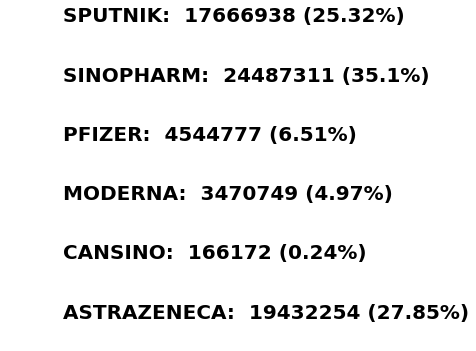

In [25]:
vacunas_tipo = vacunas_file.groupby(["vacuna_nombre"], as_index = False).sum()
vacunas_tipo["vacuna_nombre"] = vacunas_tipo["vacuna_nombre"].str.replace("COVISHIELD","AstraZeneca") 

vacunas_tipo["total"] = vacunas_tipo.primera_dosis_cantidad + vacunas_tipo.segunda_dosis_cantidad
vacunas_tipo = vacunas_tipo.groupby(["vacuna_nombre"], as_index = False).sum()


plt.figure(figsize = (2,1))
for i in vacunas_tipo.sort_values("total", ascending = False)[["vacuna_nombre","total"]].index:
    if i > 0: plt.ylim(i-1.1,i*1)
    plt.text(0.5,i*1.2,vacunas_tipo.iloc[i].vacuna_nombre.upper() + ": "+ " " + str(vacunas_tipo.iloc[i].total.astype(int)) + 
            " ("  + str(round(vacunas_tipo.iloc[i].total/vacunas_tipo.total.sum()*100,2)) + "%)\n"
             , ha = "left", va = "center", fontweight = "bold",fontsize = 20)
    plt.axis('off')
    plt.savefig("distrib")
    
vacunas_tipo["share"] = vacunas_tipo["total"] / vacunas_tipo.total.sum() * 100

In [26]:
vacunas.poblacion.sum()

45376763

In [27]:
vacunas_tipo["vacuna"] = vacunas_tipo["vacuna_nombre"] + " (" + round(vacunas_tipo["share"],2).astype(str) + "%)" 

In [28]:
vacunas_tipo[["vacuna","total"]].transpose().astype(str)

0                1                2  \
vacuna  AstraZeneca (27.85%)  Cansino (0.24%)  Moderna (4.97%)   
total             19432254.0         166172.0        3470749.0   

                     3                  4                 5  
vacuna  Pfizer (6.51%)  Sinopharm (35.1%)  Sputnik (25.32%)  
total        4544777.0         24487311.0        17666938.0

In [29]:
vacunas_tipo["total"] = vacunas_tipo["total"].astype(int)
vacunas_tipo[["vacuna","total"]].sort_values("total",ascending = False)

vacuna     total
4     Sinopharm (35.1%)  24487311
0  AstraZeneca (27.85%)  19432254
5      Sputnik (25.32%)  17666938
3        Pfizer (6.51%)   4544777
2       Moderna (4.97%)   3470749
1       Cansino (0.24%)    166172

In [30]:
vacunas_tipo.total.sum()

69768201

In [31]:
# total = vacunas_file[vacunas_file.vacuna_nombre == "Sputnik"][["primera_dosis_cantidad","segunda_dosis_cantidad"]].sum().sum()
# d ={"Alberto\nFernández":12946037/1000000,
# "Mauricio\nMacri":10811586/1000000,
# "Roberto\nLavagna":1649322/1000000,
# "Nicolás\nDel Caño":579228/1000000,
# "J. J. Gómez\nCenturión":57956/1000000,
# "José Luis \nEspert":394207/1000000,
# "Sputnik\nV": total/1000000}

# df = pd.DataFrame(d.items(), columns = ["Candidato", "Votos"])
# df.sort_values("Votos", ascending = False, inplace = True)
# df["Candidato"] = df.Candidato.str.upper()
# df["color"] = ["lightgray" if i != "SPUTNIK\nV" else "darkblue" for i in df.Candidato]


# plt.figure(figsize = (15,10))
# plt.title("VOTOS 2019 vs DOSIS DE SPUTNIK V APLICADAS",fontsize = 30, fontweight = "bold")
# plt.bar(df.Candidato, df.Votos, color = df.color)

# for i in df.index:
#     x = df[df.index == i].Candidato.item()
#     y= round( df[df.index == i].Votos.item()+0.4,2)
#     t = str(round( df[df.index == i].Votos.item(),2))  + " M"
#     plt.text(x,y,t ,ha = "center", va = "center",fontsize = 22, fontweight = "bold" )
# plt.grid(alpha = 0.5)
# plt.yticks(np.linspace(0,14,15),fontsize = 15, fontweight = "bold")
# plt.xticks(fontsize = 15, fontweight = "bold")
# plt.ylabel("VOTOS o DOSIS (EN MILLONES)",fontsize = 23, fontweight = "bold")

In [32]:
 vacunas["total_dosis"] = vacunas.primera_dosis_cantidad + vacunas.segunda_dosis_cantidad  + vacunas.tercera_dosis_cantidad

In [33]:
vac_plot_comp = vacunas[["jurisdiccion_nombre","primera_dosis_cantidad","total_dosis","distribuidas","poblacion"]]
vac_plot_comp["aplicadas_porc"] = vac_plot_comp.total_dosis / vac_plot_comp.poblacion * 100
vac_plot_comp["distribuidas_porc"] = vac_plot_comp.distribuidas / vac_plot_comp.poblacion * 100

<ipython-input-33-44a8dbc70953>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vac_plot_comp["aplicadas_porc"] = vac_plot_comp.total_dosis / vac_plot_comp.poblacion * 100
<ipython-input-33-44a8dbc70953>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vac_plot_comp["distribuidas_porc"] = vac_plot_comp.distribuidas / vac_plot_comp.poblacion * 100


In [34]:
vac_plot_comp.sort_values("aplicadas_porc",ascending = True, inplace = True)
vac_plot_comp["aplicadas_rank"] = range(len(vac_plot_comp))

vac_plot_comp.sort_values("distribuidas_porc",ascending = True, inplace = True)
vac_plot_comp["distribuidas_rank"] = range(len(vac_plot_comp))

<ipython-input-34-ff8a50c0752b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vac_plot_comp.sort_values("aplicadas_porc",ascending = True, inplace = True)
<ipython-input-34-ff8a50c0752b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vac_plot_comp["aplicadas_rank"] = range(len(vac_plot_comp))
<ipython-input-34-ff8a50c0752b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  va

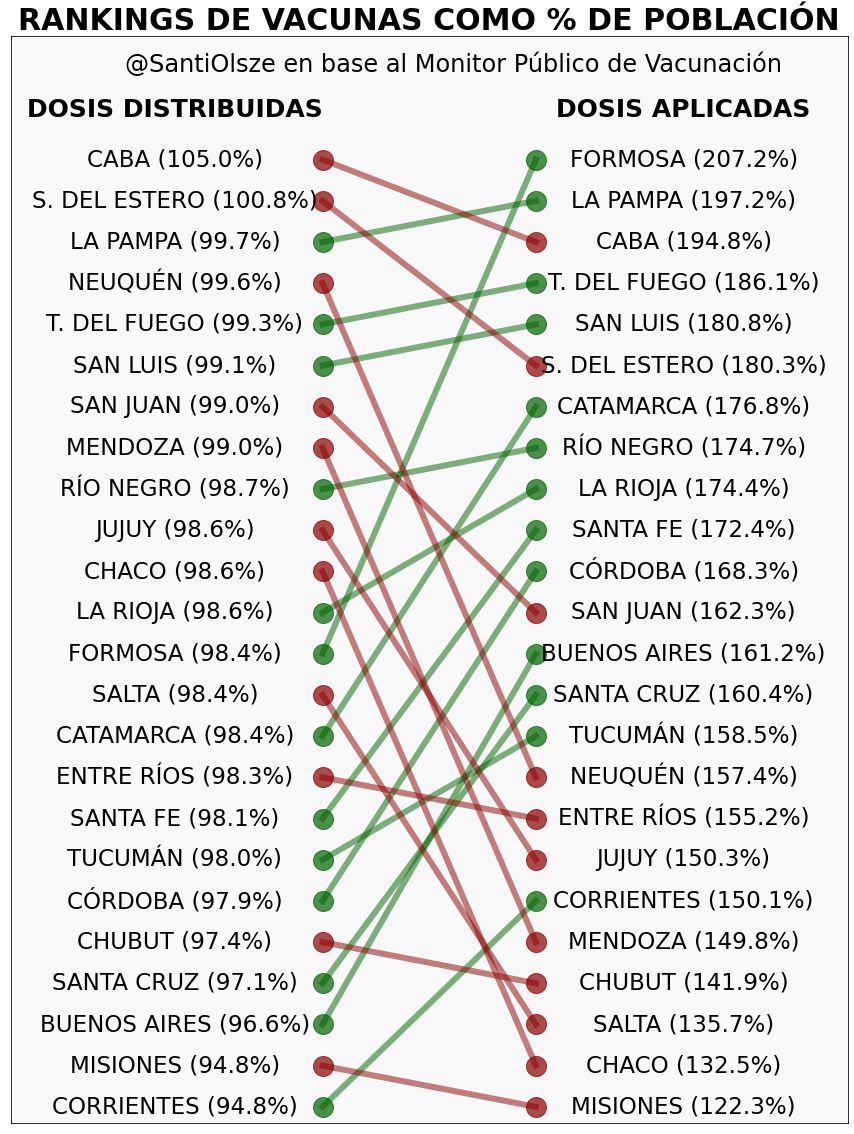

In [35]:
plt.figure(figsize = (15,20))

x = vac_plot_comp.jurisdiccion_nombre
dis = dict(zip(x,vac_plot_comp.distribuidas_rank))
dis_val = dict(zip(x,vac_plot_comp.distribuidas_porc))
apl = dict(zip(x,vac_plot_comp.aplicadas_rank)) 
apl_val = dict(zip(x,vac_plot_comp.aplicadas_porc)) 
plt.ylim(-0.4,26)
plt.xlim(-1.7,3.4)
for i in x:
    texto_dis = "{} ({:.1f}%)".format(i.upper(),dis_val[i])
    plt.text(x = -0.7, y = dis[i], s = texto_dis, ha = "center", va = "center", fontsize = 23)#, fontweight = "bold")
    texto_apl = "{} ({:.1f}%)".format(i.upper(),apl_val[i])

    plt.text(x = 2.4, y = apl[i], s = texto_apl, ha = "center", va = "center", fontsize = 23)#, fontweight = "bold")
    color = "goldenrod"
    if dis[i] < apl[i]:
        color = "darkgreen"
    elif dis[i] >apl[i]:
        color = "darkred"

    
    plt.plot([0.2,1.5],[dis[i],apl[i]], color = color, linewidth = 6, alpha = 0.5)
    plt.plot([0.2,1.5],[dis[i],apl[i]], color = color, linewidth = 0, alpha = 0.7, ms = 20, marker = "o")

plt.text(x = -0.7, y = 24.2, s = "DOSIS DISTRIBUIDAS", ha = "center", va = "center", fontsize = 25, fontweight = "bold")
plt.text(x = 2.4, y = 24.2, s = "DOSIS APLICADAS", ha = "center", va = "center", fontsize = 25, fontweight = "bold")

plt.text(x = 1, y = 25.3, s = "@SantiOlsze en base al Monitor Público de Vacunación", ha = "center", va = "center", fontsize = 24)


#plt.axis('off')
plt.title("RANKINGS DE VACUNAS COMO % DE POBLACIÓN", fontsize = 30, fontweight = "bold")

ax = plt.gca()
ax.set_facecolor("lightgray")
ax.patch.set_alpha(0.15)
plt.yticks([], fontsize = 15, fontweight = "bold")
plt.xticks([], fontsize = 15, fontweight = "bold")


plt.savefig("rankings_vacunas", bbox_inches= "tight")

In [36]:
vac_plot_comp["stock"] = vac_plot_comp["distribuidas"] - vac_plot_comp["total_dosis"]
vac_plot_comp["stock_porcentual"] = vac_plot_comp["stock"] / vac_plot_comp["poblacion"] * 100
vac_plot_comp.sort_values("stock_porcentual")[["jurisdiccion_nombre","total_dosis","stock","stock_porcentual"]]

<ipython-input-36-ac62f7aece30>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vac_plot_comp["stock"] = vac_plot_comp["distribuidas"] - vac_plot_comp["total_dosis"]


jurisdiccion_nombre  total_dosis     stock  stock_porcentual
8              Formosa      1253961   -658488       -108.806282
10            La Pampa       706987   -349700        -97.564922
1                 CABA      5989894  -2760458        -89.752137
23        T. del Fuego       322685   -150407        -86.723903
19            San Luis       919132   -415408        -81.720464
22       S. del Estero      1763538   -777166        -79.439402
2            Catamarca       734509   -325757        -78.412904
15           Río Negro      1306246   -568168        -75.997913
11            La Rioja       686358   -298411        -75.829096
21            Santa Fe      6098374  -2629719        -74.361091
6              Córdoba      6327303  -2644604        -70.326796
0         Buenos Aires     28277745 -11329635        -64.588928
20          Santa Cruz       586438   -231297        -63.248090
18            San Juan      1267618   -493858        -63.216494
24             Tucumán      2685437  -1024337        -60.445129
14             Neuquén      1044910   -383571        -57.761758
7           Entre Ríos      2151002   -789269        -56.947418
5           Corrientes      1682378   -619888        -55.307588
9                Jujuy      1158833   -398366        -51.676718
12             Mendoza      2980567  -1010505        -50.770522
4               Chubut       878619   -275911        -44.574099
17               Salta      1932612   -531131        -37.288130
3                Chaco      1596396   -408754        -33.934420
13            Misiones      1542756   -346456        -27.468298

In [37]:
pob = pd.read_csv("poblacion_provincial.csv")
pob = pob.Población.sum()-1

In [38]:
#vacunas_base = pd.read_pickle("vacunas_base.pkl")
primeras = vacunas_base[vacunas_base.orden_dosis == 1]
primeras_grouped = primeras.groupby(["fecha_aplicacion"],as_index = False).sum()[["fecha_aplicacion","lote_vacuna"]].rename(columns = {"lote_vacuna":"n"})
primeras_grouped["fecha_aplicacion"] = pd.to_datetime(primeras_grouped.fecha_aplicacion.replace("S.I.","2020-12-29"))
primeras_grouped.sort_values("fecha_aplicacion", inplace = True)
primeras_grouped["cumsum"] = primeras_grouped.n.cumsum()
primeras_grouped["cumporc"] = primeras_grouped["cumsum"] / pob * 100

segundas = vacunas_base[vacunas_base.orden_dosis == 2]
segundas_grouped = segundas.groupby(["fecha_aplicacion"],as_index = False).sum()[["fecha_aplicacion","lote_vacuna"]].rename(columns = {"lote_vacuna":"n"})
segundas_grouped["fecha_aplicacion"] = pd.to_datetime(segundas_grouped.fecha_aplicacion.replace("S.I.","2020-12-29"))
segundas_grouped.sort_values("fecha_aplicacion", inplace = True)
segundas_grouped["cumsum"] = segundas_grouped.n.cumsum()


segundas_grouped["cumporc"] = segundas_grouped["cumsum"] / pob * 100




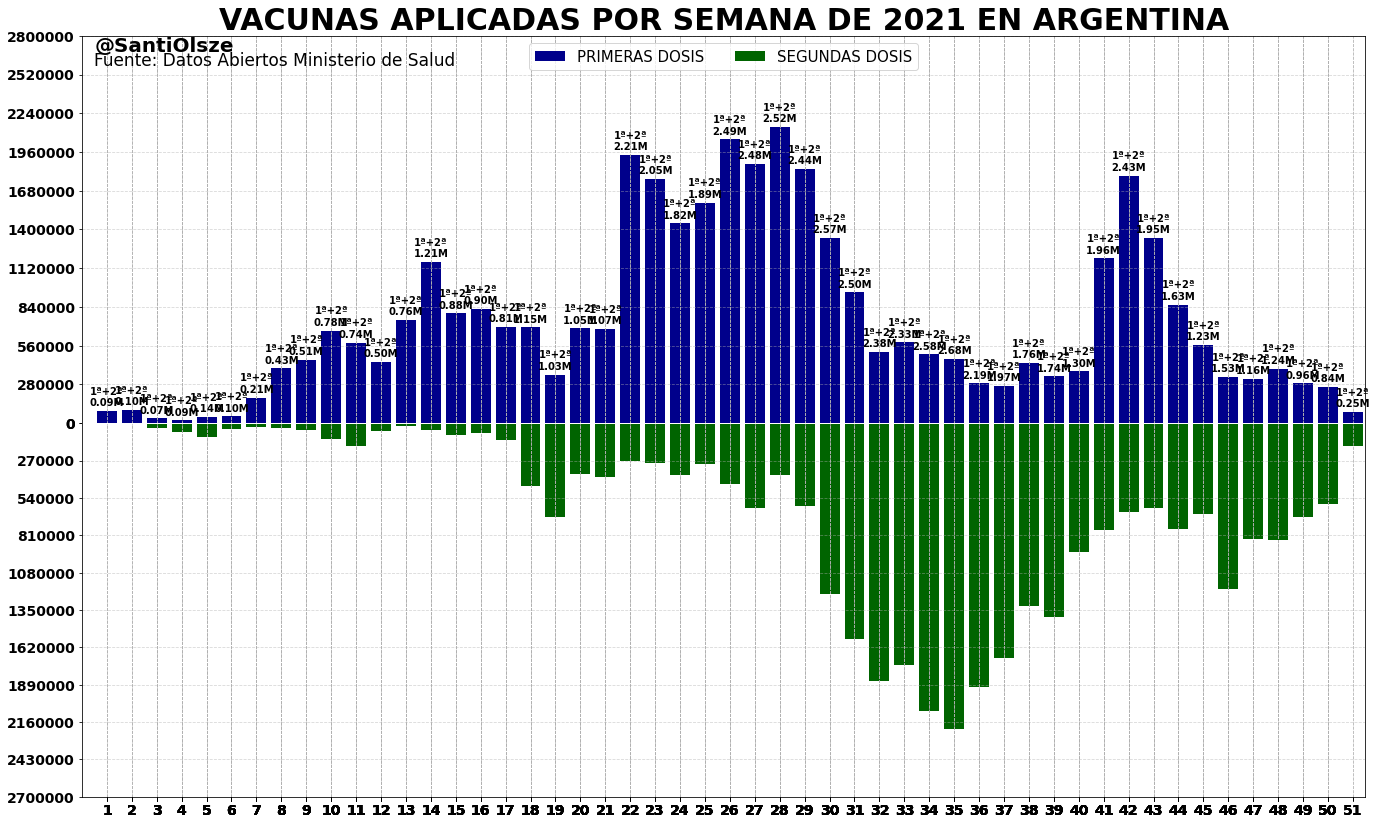

In [39]:
max_primeras = primeras_grouped["n"].max()
max_segundas = segundas_grouped["n"].max()


week = [i.isocalendar()[1] for i in primeras_grouped["fecha_aplicacion"]]
primeras_grouped["week"] = week

primeras_grouped2 = primeras_grouped.groupby(["week"],
                                            as_index = False
                                           ).sum()[["week","n"]].rename(columns = {"sexo":"n"})


week = [i.isocalendar()[1] for i in segundas_grouped["fecha_aplicacion"]]
segundas_grouped["week"] = week

segundas_grouped2 = segundas_grouped.groupby(["week"],
                                            as_index = False
                                           ).sum()[["week","n"]].rename(columns = {"sexo":"n"})


max_primeras = primeras_grouped2["n"].max()
max_segundas = segundas_grouped2["n"].max()

w = 1  
plt.figure(figsize = (23,14))
plt.bar(primeras_grouped2["week"], primeras_grouped2["n"].rolling(window=w).mean() , linewidth = 5,color = "darkblue", label = "PRIMERAS DOSIS")
#plt.fill_between(primeras_grouped2["week"], primeras_grouped2["n"].rolling(window=w).mean(), y2=0, alpha = 0.3)

plt.bar(segundas_grouped2["week"], segundas_grouped2["n"].rolling(window=w).mean()*-1 , linewidth = 5, color = "darkgreen", label = "SEGUNDAS DOSIS")
#plt.fill_between(segundas_grouped2["week"], segundas_grouped2["n"].rolling(window=w).mean()*-1, y2=0, alpha = 0.3, color = "green")


# plt.axhline(max_primeras, color = "darkblue", linewidth = 5, ls = ":")
# props = dict(boxstyle='round', facecolor='w', alpha=1, edgecolor = "darkblue")

# fecha = max(pd.to_datetime(primeras_grouped.fecha_aplicacion,errors = "coerce")).strftime('%d/%m')
# plt.text(x = pd.to_datetime("2021-03-01"), va = "center", y = max_primeras, s = "Al {} el {:.1f}% de la población tiene al menos una dosis".format(fecha,max_primeras),
#          bbox = props, color = "darkblue", fontsize = 17, fontweight = "bold", ha = "center")


limit = datetime.datetime.today().isocalendar()[1] + 1
# plt.axhline(max_segundas*-1, color = "darkgreen", linewidth = 5, ls = ":")
# props = dict(boxstyle='round', facecolor='w', alpha=1, edgecolor = "darkgreen")

# fecha = max(pd.to_datetime(primeras_grouped.fecha_aplicacion,errors = "coerce")).strftime('%d/%m')
# plt.text(x = pd.to_datetime("2021-03-01"), va = "center", y = max_segundas * -1, s = "Al {} el {:.1f}% de la población cuenta con dos dosis".format(fecha,max_segundas),
#          bbox = props, color = "darkgreen", fontsize = 17, fontweight = "bold", ha = "center")



plt.axhline(0, color = "w", linewidth = 1, ls = "-")

a = round(max_primeras*1.3)
b = round(max_segundas*1.2)
n_a = len(str(a))-2
a_m= round(a/10**n_a)*10**n_a
n_b = len(str(b))-2
b_m = round(b/10**n_b)*10**n_b
la = int(a_m / 10**n_a)
lb = int(b_m /10**n_b)


plt.text(x=0.5, y = a - 100000, s = "@SantiOlsze",fontsize = 20, fontweight = "bold")
plt.text(x=0.5, y = a - 200000, s = "Fuente: Datos Abiertos Ministerio de Salud",fontsize = 17)

t1 = pd.Series(np.linspace(-b_m,0, int((0+lb)/(lb/10)+1)))
t2 = pd.Series(np.linspace(0,a_m, int((0+la)/(la/10)+1)))

t = t1.append(t2)
t_labels = abs(t).astype(int)


m = pd.merge(primeras_grouped2,segundas_grouped2, on = "week")
m = m[m.week < limit]
m["total"] = m["n_x"] + m["n_y"]


for i in range(len(m)):
    plt.text(x = m.loc[i].week, y = m.loc[i].n_x + 100000, fontsize = 10, fontweight = "bold",
            s = "1ª+2ª\n{:.2f}M".format(m.loc[i].total/1000000), va = "center", ha = "center")

# plt.tick_params(labeltop=False, labelright=True)
plt.title("VACUNAS APLICADAS POR SEMANA DE 2021 EN ARGENTINA", fontweight = "bold", fontsize = 30)
plt.yticks(t,t_labels, fontweight = "bold", fontsize = 14);
# plt.ylabel("PORCENTAJE ACUMULADO DE PERSONAS VACUNADAS",fontweight = "bold", fontsize = 18)
# #plt.grid(alpha = 0.5)
# plt.xticks([i for i in primeras_grouped.fecha_aplicacion if i.day in [1]],rotation = 90, fontweight = "bold", fontsize = 18)
plt.xticks(week,rotation = 0, fontweight = "bold", fontsize = 14);
plt.grid(alpha = 0.5, ls = "--")
plt.legend(loc = "upper center", fontsize = 15, ncol = 2)
plt.xlim(0, limit-0.5)

plt.savefig("semanal_vacunas_arg_segundas", bbox_inches = "tight");

In [40]:
hide_last_week = False

primeras = vacunas_base[vacunas_base.orden_dosis == 1]
primeras_grouped = primeras.groupby(["fecha_aplicacion"],as_index = False).sum()[["fecha_aplicacion","lote_vacuna"]].rename(columns = {"lote_vacuna":"n"})
primeras_grouped["fecha_aplicacion"] = pd.to_datetime(primeras_grouped.fecha_aplicacion.replace("S.I.","2020-12-29"))
primeras_grouped.sort_values("fecha_aplicacion", inplace = True)
primeras_grouped["cumsum"] = primeras_grouped.n.cumsum()
primeras_grouped["cumporc"] = primeras_grouped["cumsum"] / sum(vacunas.poblacion) * 100

segundas = vacunas_base[vacunas_base.orden_dosis == 2]
segundas_grouped = segundas.groupby(["fecha_aplicacion"],as_index = False).sum()[["fecha_aplicacion","lote_vacuna"]].rename(columns = {"lote_vacuna":"n"})
segundas_grouped["fecha_aplicacion"] = pd.to_datetime(segundas_grouped.fecha_aplicacion.replace("S.I.","2020-12-29"))
segundas_grouped.sort_values("fecha_aplicacion", inplace = True)
segundas_grouped["cumsum"] = segundas_grouped.n.cumsum()
segundas_grouped["cumporc"] = segundas_grouped["cumsum"] / sum(vacunas.poblacion) * 100



terceras = vacunas_base[vacunas_base.orden_dosis == 3]
terceras_grouped = terceras.groupby(["fecha_aplicacion"],as_index = False).sum()[["fecha_aplicacion","lote_vacuna"]].rename(columns = {"lote_vacuna":"n"})
terceras_grouped["fecha_aplicacion"] = pd.to_datetime(terceras_grouped.fecha_aplicacion.replace("S.I.","2020-12-29"))
terceras_grouped.sort_values("fecha_aplicacion", inplace = True)
terceras_grouped["cumsum"] = terceras_grouped.n.cumsum()
terceras_grouped["cumporc"] = terceras_grouped["cumsum"] / sum(vacunas.poblacion) * 100


Index(['week', 'n_x', 'n_y', 'n'], dtype='object')


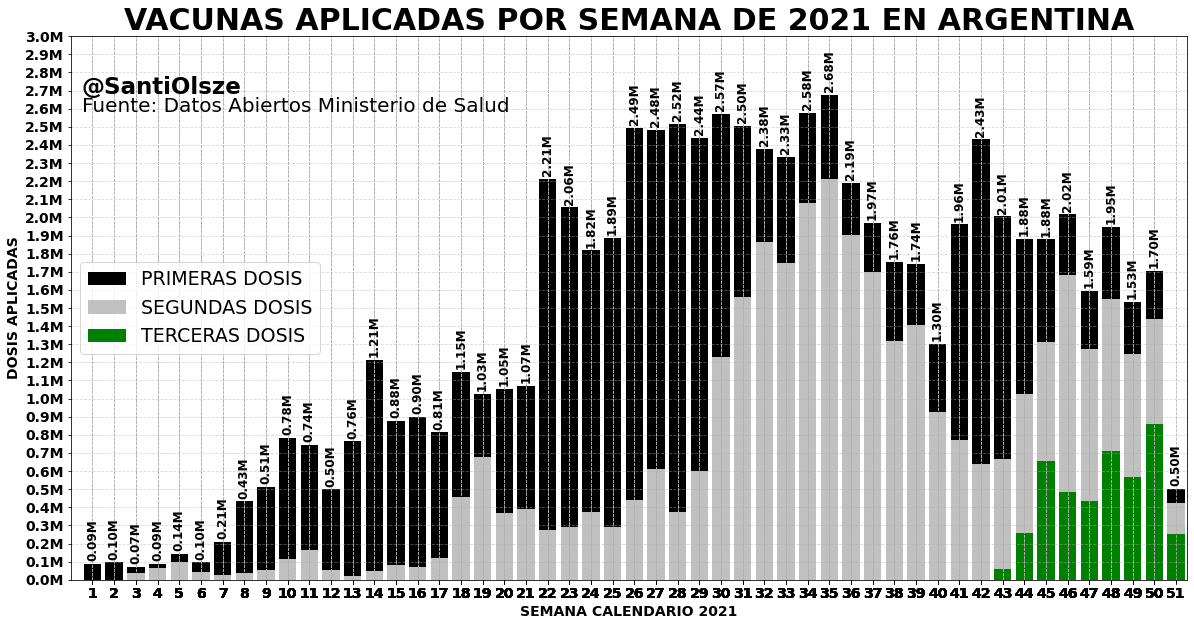

In [41]:

max_primeras = primeras_grouped["n"].max()
max_segundas = segundas_grouped["n"].max()


week = [i.isocalendar()[1] for i in primeras_grouped["fecha_aplicacion"]]
primeras_grouped["week"] = week

primeras_grouped2 = primeras_grouped.groupby(["week"],
                                            as_index = False
                                           ).sum()[["week","n"]].rename(columns = {"sexo":"n"})


week = [i.isocalendar()[1] for i in segundas_grouped["fecha_aplicacion"]]
segundas_grouped["week"] = week

segundas_grouped2 = segundas_grouped.groupby(["week"],
                                            as_index = False
                                           ).sum()[["week","n"]].rename(columns = {"sexo":"n"})



weekx = [i.isocalendar()[1] for i in terceras_grouped["fecha_aplicacion"]]
terceras_grouped["week"] = weekx

terceras_grouped2 = terceras_grouped.groupby(["week"],
                                            as_index = False
                                           ).sum()[["week","n"]].rename(columns = {"sexo":"n"})




if hide_last_week:
    limit = datetime.datetime.today().isocalendar()[1]
else:
    limit = datetime.datetime.today().isocalendar()[1] + 1

m = pd.merge(primeras_grouped2,segundas_grouped2, on = "week").merge(terceras_grouped2, on = "week", how = "left")
print(m.columns)

m = m[m.week < limit]

m["n"].fillna(0, inplace= True)
m["total"] = m["n_x"] + m["n_y"] + m["n"]


max_primeras = primeras_grouped2["n"].max()
max_segundas = segundas_grouped2["n"].max()

w = 1  
plt.figure(figsize = (20,10))
plt.bar(m["week"], m["total"].rolling(window=w).mean() , linewidth = 5, color = "k", label = "PRIMERAS DOSIS")

plt.bar(m["week"], (m["n_y"] + m["n"]).rolling(window=w).mean() , linewidth = 5,color = "silver", label = "SEGUNDAS DOSIS")

plt.bar(m["week"], m["n"].rolling(window=w).mean() , linewidth = 5,color = "g", label = "TERCERAS DOSIS")






plt.axhline(0, color = "w", linewidth = 1, ls = "-")
a = round(max_primeras*1.3)
b = round(max_segundas*1.2)
# n_a = len(str(a))-2
# a_m= round(a/10**n_a)*10**n_a
# n_b = len(str(b))-2
# b_m = round(b/10**n_b)*10**n_b
# la = int(a_m / 10**n_a)
# lb = int(b_m /10**n_b)


plt.text(x=0.5, y = a - 100000, s = "@SantiOlsze",fontsize = 23, fontweight = "bold")
plt.text(x=0.5, y = a - 200000, s = "Fuente: Datos Abiertos Ministerio de Salud",fontsize = 20)

#t1 = pd.Series(np.linspace(-b_m,0, int((0+lb)/(lb/10)+1)))
#t2 = pd.Series(np.linspace(0,a_m, int((0+la)/(la/10)+1)))

#t = t1.append(t2)
#t_labels = abs(t).astype(int)


for i in range(len(m)):
    plt.text(x = m.loc[i].week, y = m.loc[i].total + 130000, fontsize = 12, fontweight = "bold",
            s = "{:.2f}M".format(m.loc[i].total/1000000), va = "center", ha = "center", rotation = 90)


t = np.linspace(0,3000000,31)
t_labels = ["{:.1f}M".format(float(i/1000000)) for i in t]
plt.title("VACUNAS APLICADAS POR SEMANA DE 2021 EN ARGENTINA", fontweight = "bold", fontsize = 30)
plt.yticks(t,t_labels, fontweight = "bold", fontsize = 14);
# plt.ylabel("PORCENTAJE ACUMULADO DE PERSONAS VACUNADAS",fontweight = "bold", fontsize = 18)
# #plt.grid(alpha = 0.5)
# plt.xticks([i for i in primeras_grouped.fecha_aplicacion if i.day in [1]],rotation = 90, fontweight = "bold", fontsize = 18)
plt.xticks(week,rotation = 0, fontweight = "bold", fontsize = 14)
plt.yticks(t,t_labels,rotation = 0, fontweight = "bold", fontsize = 14);
plt.xlabel("SEMANA CALENDARIO 2021", fontweight = "bold", fontsize = 14)
plt.ylabel("DOSIS APLICADAS", fontweight = "bold", fontsize = 14)

plt.grid(alpha = 0.5, ls = "--")
plt.legend(loc = "center left", fontsize = 19, ncol = 1)
plt.xlim(0, limit-0.5)

plt.savefig("semanal_vacunas_arg", bbox_inches = "tight");

In [42]:
m.rename(columns = {"n_x":"primeras","n_y":"segundas", "n":"terceras"}, inplace = True)
m.tail(5)

week  primeras  segundas  terceras      total
46    47    322095    834532  437496.0  1594123.0
47    48    394261    843699  708439.0  1946399.0
48    49    288631    675699  569936.0  1534266.0
49    50    261826    582434  859039.0  1703299.0
50    51     80355    166918  254721.0   501994.0

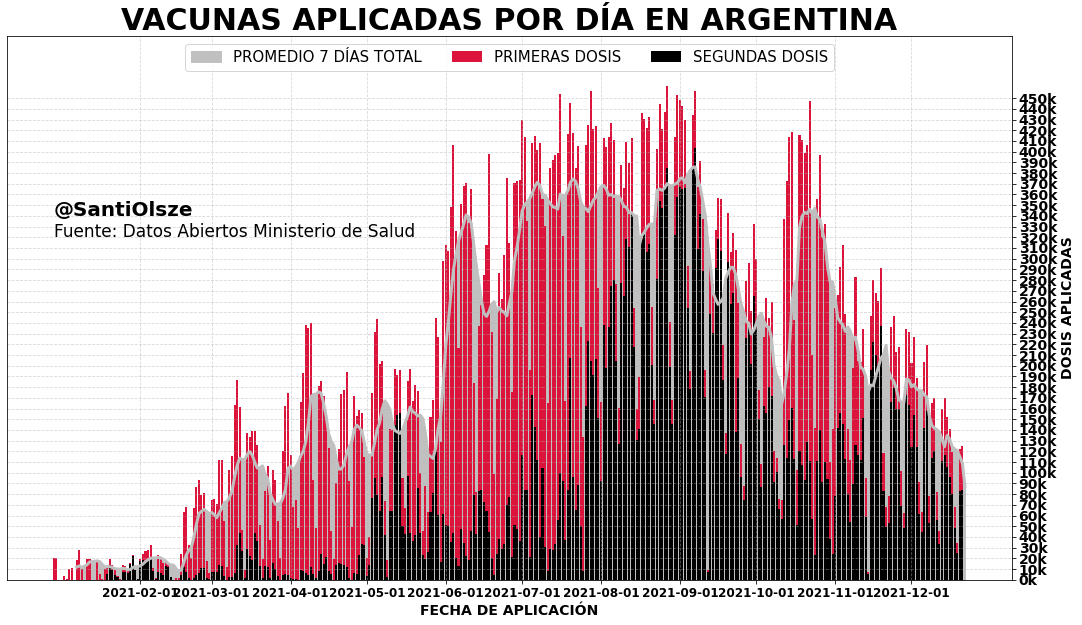

In [43]:


primeras_grouped3 = primeras_grouped.groupby(["fecha_aplicacion"],
                                            as_index = False
                                           ).sum()[["fecha_aplicacion","n"]].rename(columns = {"sexo":"n"})



segundas_grouped3 = segundas_grouped.groupby(["fecha_aplicacion"],
                                            as_index = False
                                           ).sum()[["fecha_aplicacion","n"]].rename(columns = {"sexo":"n"})


if hide_last_week:
    limit = datetime.datetime.today().isocalendar()[1]
else:
    limit = datetime.datetime.today().isocalendar()[1] + 1

m = pd.merge(primeras_grouped3,segundas_grouped3, on = "fecha_aplicacion")
m["total"] = m["n_x"] + m["n_y"]



#max_primeras = primeras_grouped2["n"].max()
#max_segundas = segundas_grouped2["n"].max()

w = 1  
fig,ax = plt.subplots(figsize = (18,10))
plt.bar(m["fecha_aplicacion"], m["total"].rolling(window=w).mean() , linewidth = 5, color = "crimson", label = "PRIMERAS DOSIS")

plt.bar(m["fecha_aplicacion"], m["n_y"].rolling(window=w).mean() , linewidth = 5,color = "k", label = "SEGUNDAS DOSIS")



plt.fill_between(m["fecha_aplicacion"],0, m["total"].rolling(window=7).mean(), color = "silver", label = "PROMEDIO 7 DÍAS TOTAL")
plt.plot(m["fecha_aplicacion"], m["total"].rolling(window=7).mean(), color = "silver", linewidth = 3)




plt.axhline(0, color = "w", linewidth = 1, ls = "-")

# a = round(max_primeras*1.3)
# b = round(max_segundas*1.2)
# n_a = len(str(a))-2
# a_m= round(a/10**n_a)*10**n_a
# n_b = len(str(b))-2
# b_m = round(b/10**n_b)*10**n_b
# la = int(a_m / 10**n_a)
# lb = int(b_m /10**n_b)



plt.text(x=m.fecha_aplicacion[0], y = 340000, s = "@SantiOlsze",fontsize = 20, fontweight = "bold")
plt.text(x=m.fecha_aplicacion[0], y = 320000, s = "Fuente: Datos Abiertos Ministerio de Salud",fontsize = 17)

#t1 = pd.Series(np.linspace(-b_m,0, int((0+lb)/(lb/10)+1)))
#t2 = pd.Series(np.linspace(0,a_m, int((0+la)/(la/10)+1)))

#t = t1.append(t2)
#t_labels = abs(t).astype(int)


#for i in range(len(m)):
#    plt.text(x = m.loc[i].fecha_aplicacion, y = m.loc[i].total + 70000, fontsize = 12, fontweight = "bold",
#            s = "1ª+2ª\n{:.2f}M".format(m.loc[i].total/1000000), va = "center", ha = "center")


t = np.linspace(0,450000,46)
t_labels = ["{:.0f}k".format(int(i/1000)) for i in t]
plt.title("VACUNAS APLICADAS POR DÍA EN ARGENTINA", fontweight = "bold", fontsize = 30)
#plt.yticks(t,t_labels, fontweight = "bold", fontsize = 14);
# plt.ylabel("PORCENTAJE ACUMULADO DE PERSONAS VACUNADAS",fontweight = "bold", fontsize = 18)
# #plt.grid(alpha = 0.5)
plt.xticks([i for i in m.fecha_aplicacion if i.day in [1]],rotation = 0, fontweight = "bold", fontsize = 12)
#plt.xticks(week,rotation = 0, fontweight = "bold", fontsize = 14)
plt.yticks(t,t_labels,rotation = 0, fontweight = "bold", fontsize = 14);
plt.xlabel("FECHA DE APLICACIÓN", fontweight = "bold", fontsize = 14)
plt.ylabel("DOSIS APLICADAS", fontweight = "bold", fontsize = 14)

plt.grid(alpha = 0.5, ls = "--")
plt.legend(loc = "upper center", fontsize = 15, ncol = 3)
plt.ylim(0, max(m.total)*1.1)

ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()

plt.savefig("diario_vacunas_arg", bbox_inches = "tight");

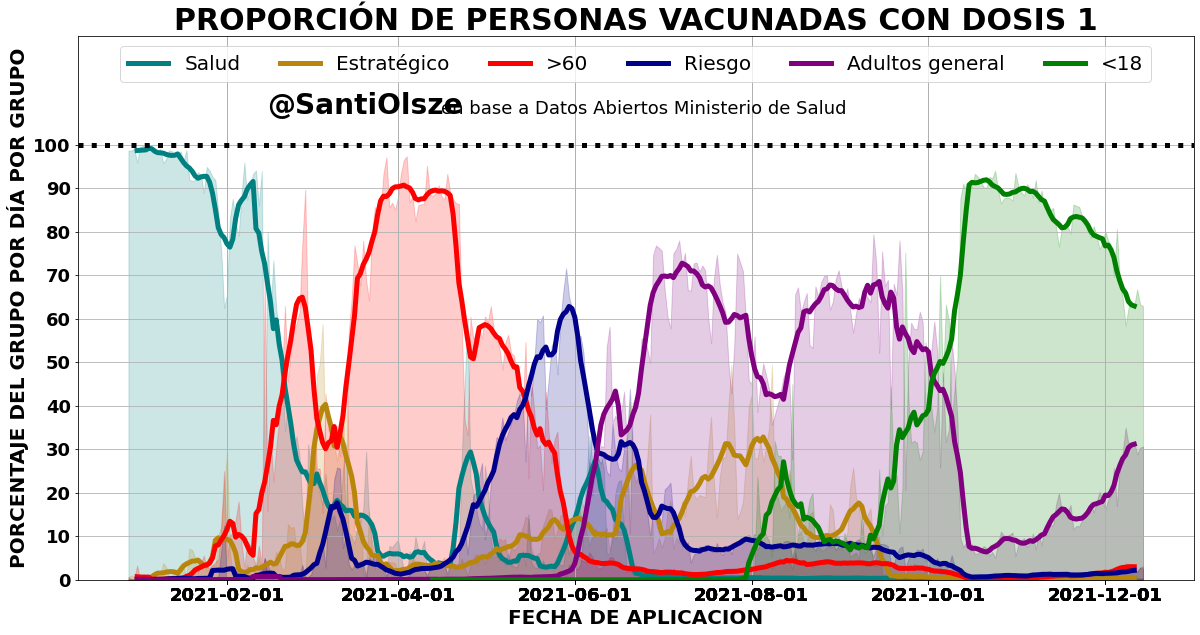

In [44]:
base_copy = vacunas_base.copy()
base_copy["condicion_aplicacion"] = base_copy.condicion_aplicacion.map({'>60':'>60',
 'Estratégico':'Estratégico',
 'Otros':'Otros',
 'Población general':'Adultos general',
 'Población general 12-17':'<18',
 'Población general 3-11':'<18',
 'Riesgo':'Riesgo',
 'Riesgo 12-17':'<18',
 'Riesgo 3-11':'<18',
 'Salud':'Salud'})
df = base_copy[base_copy.orden_dosis == 1].groupby(["fecha_aplicacion","condicion_aplicacion"]).agg({'lote_vacuna': 'sum'})


ratios = df.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
ratios.to_csv("ratios.csv")
ratios = pd.read_csv("ratios.csv")
ratios["fecha_aplicacion"] = pd.to_datetime(ratios["fecha_aplicacion"],errors = "coerce" )

plt.figure(figsize = (20,10))
colores = ["teal","darkgoldenrod","red","darkblue","purple","green"]

ratios = ratios[ratios.condicion_aplicacion != "Otros"]
for z,i in enumerate(["Salud","Estratégico",">60","Riesgo", "Adultos general","<18"]):
    d = ratios[ratios.condicion_aplicacion == i]
    d = d[d.fecha_aplicacion != "S.I."]
    d = d[d.condicion_aplicacion != "S.I."]
    d = d[d.fecha_aplicacion != ratios.fecha_aplicacion.max()]

    d["fecha_aplicacion"] = pd.to_datetime(d.fecha_aplicacion)
    d.sort_values("fecha_aplicacion", inplace = True)
    d = d[d.fecha_aplicacion < datetime.datetime.today()-datetime.timedelta(days = 0.5)]
    plt.plot(d.fecha_aplicacion, d.lote_vacuna.rolling(window = 7, center = True).mean(), label = i, linewidth = 5, color = colores[z])
    plt.fill_between(d.fecha_aplicacion, d.lote_vacuna,0, alpha = 0.2, color = colores[z])

plt.grid(":")
plt.legend(loc = "upper center", ncol = 6,fontsize = 20)
plt.xticks([i for i in ratios.fecha_aplicacion if i.day == 1 and i.month % 2 == 0],fontsize = 18, fontweight = "bold")
plt.ylim(0,125)
plt.yticks(np.linspace(0,100,11),fontsize = 18, fontweight = "bold")
plt.title("PROPORCIÓN DE PERSONAS VACUNADAS CON DOSIS 1",fontsize = 30, fontweight = "bold")
plt.text(x = pd.to_datetime("2021-02-15"),y = 107, s = "@SantiOlsze",fontsize = 28, fontweight = "bold")
plt.text(x = pd.to_datetime("2021-04-16"),y = 107, s = "en base a Datos Abiertos Ministerio de Salud",fontsize = 18)
plt.ylabel("PORCENTAJE DEL GRUPO POR DÍA POR GRUPO",fontsize = 20, fontweight = "bold")
plt.xlabel("FECHA DE APLICACION",fontsize = 20, fontweight = "bold")
plt.axhline(100, color = "k", ls = ":", linewidth = 5)
plt.savefig("condicion_vacunas_arg", bbox_inches = "tight")
del base_copy;

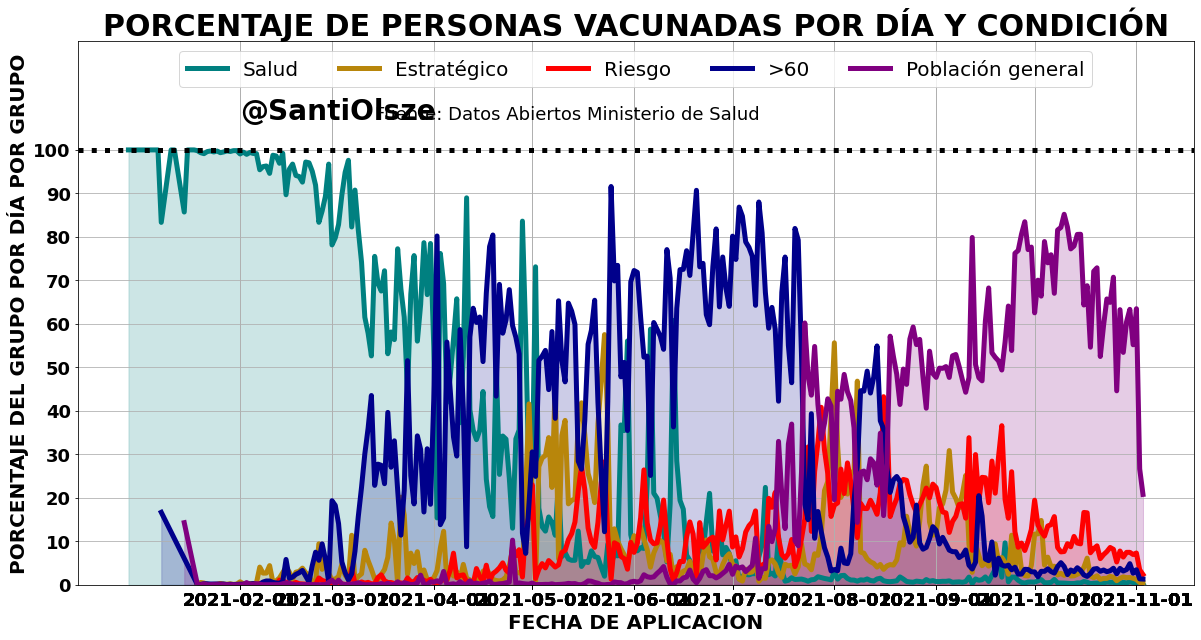

In [70]:
df = vacunas_base[vacunas_base.orden_dosis == 2].groupby(["fecha_aplicacion","condicion_aplicacion"]).agg({'lote_vacuna': 'sum'})

ratios = df.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
ratios.to_csv("ratios.csv")
ratios = pd.read_csv("ratios.csv")
ratios["fecha_aplicacion"] = pd.to_datetime(ratios["fecha_aplicacion"],errors = "coerce" )

plt.figure(figsize = (20,10))
colores = ["teal","darkgoldenrod","red","darkblue","purple"]

ratios = ratios[ratios.condicion_aplicacion != "Otros"]
for z,i in enumerate(["Salud","Estratégico","Riesgo",">60", "Población general"]):
    d = ratios[ratios.condicion_aplicacion == i]
    d = d[d.fecha_aplicacion != "S.I."]
    d = d[d.condicion_aplicacion != "S.I."]
    d = d[d.fecha_aplicacion != ratios.fecha_aplicacion.max()]

    d["fecha_aplicacion"] = pd.to_datetime(d.fecha_aplicacion)
    d.sort_values("fecha_aplicacion", inplace = True)
    d = d[d.fecha_aplicacion < datetime.datetime.today()-datetime.timedelta(days = 0.5)]
    plt.plot(d.fecha_aplicacion, d.lote_vacuna, label = i, linewidth = 5, color = colores[z])
    plt.fill_between(d.fecha_aplicacion, d.lote_vacuna,0, alpha = 0.2, color = colores[z])

plt.grid(":")
plt.legend(loc = "upper center", ncol = 5,fontsize = 20)
plt.xticks([i for i in ratios.fecha_aplicacion if i.day == 1],fontsize = 18, fontweight = "bold")
plt.ylim(0,125)
plt.yticks(np.linspace(0,100,11),fontsize = 18, fontweight = "bold")
plt.title("PORCENTAJE DE PERSONAS VACUNADAS POR DÍA Y CONDICIÓN",fontsize = 30, fontweight = "bold")
plt.text(x = pd.to_datetime("2021-02-1"),y = 107, s = "@SantiOlsze",fontsize = 28, fontweight = "bold")
plt.text(x = pd.to_datetime("2021-03-14"),y = 107, s = "Fuente: Datos Abiertos Ministerio de Salud",fontsize = 18)
plt.ylabel("PORCENTAJE DEL GRUPO POR DÍA POR GRUPO",fontsize = 20, fontweight = "bold")
plt.xlabel("FECHA DE APLICACION",fontsize = 20, fontweight = "bold")
plt.axhline(100, color = "k", ls = ":", linewidth = 5)
plt.savefig("condicion_vacunas_arg_dosis2", bbox_inches = "tight");

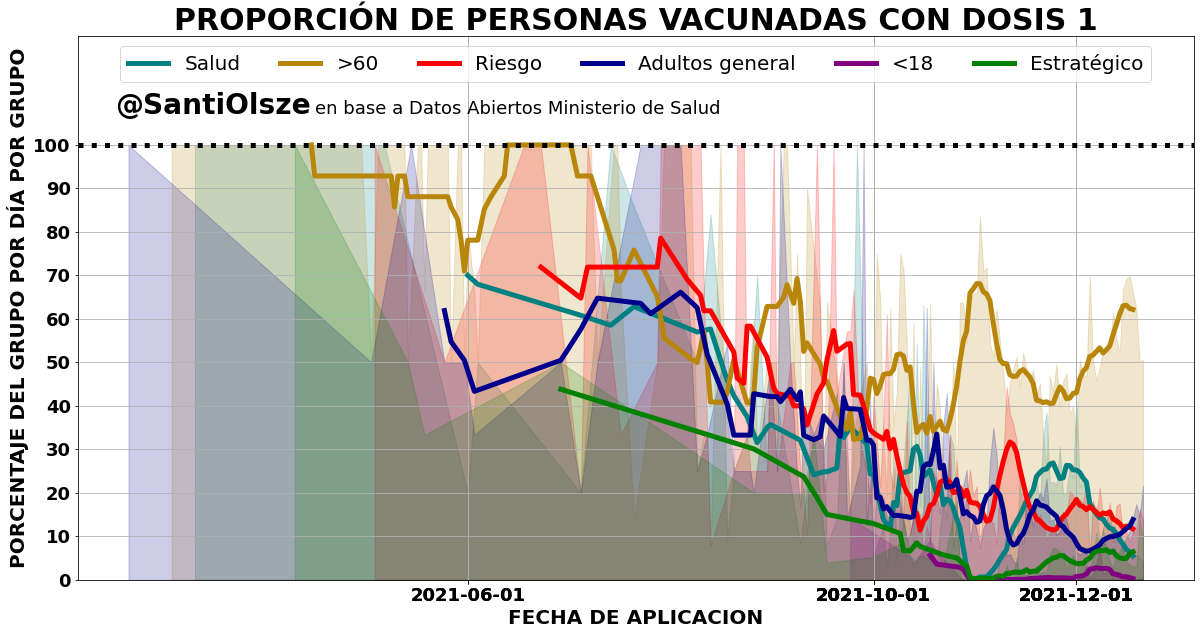

In [12]:
base_copy = vacunas_base.copy()
base_copy["condicion_aplicacion"] = base_copy.condicion_aplicacion.map({'>60':'>60',
 'Estratégico':'Estratégico',
 'Otros':'Otros',
 'Población general':'Adultos general',
 'Población general 12-17':'<18',
 'Población general 3-11':'<18',
 'Riesgo':'Riesgo',
 'Riesgo 12-17':'<18',
 'Riesgo 3-11':'<18',
 'Salud':'Salud'})
df = base_copy[base_copy.orden_dosis == 3].groupby(["fecha_aplicacion","condicion_aplicacion"]).agg({'lote_vacuna': 'sum'})


ratios = df.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
ratios.to_csv("ratios.csv")
ratios = pd.read_csv("ratios.csv")
ratios["fecha_aplicacion"] = pd.to_datetime(ratios["fecha_aplicacion"],errors = "coerce" )

plt.figure(figsize = (20,10))
colores = ["teal","darkgoldenrod","red","darkblue","purple","green"]

ratios = ratios[ratios.condicion_aplicacion != "Otros"]
for z,i in enumerate(["Salud",">60","Riesgo", "Adultos general","<18","Estratégico"]):
    d = ratios[ratios.condicion_aplicacion == i]
    d = d[d.fecha_aplicacion != "S.I."]
    d = d[d.condicion_aplicacion != "S.I."]
    d = d[d.fecha_aplicacion != ratios.fecha_aplicacion.max()]

    d["fecha_aplicacion"] = pd.to_datetime(d.fecha_aplicacion)
    d.sort_values("fecha_aplicacion", inplace = True)
    d = d[d.fecha_aplicacion < datetime.datetime.today()-datetime.timedelta(days = 0.5)]
    plt.plot(d.fecha_aplicacion, d.lote_vacuna.rolling(window = 7, center = True).mean(), label = i, linewidth = 5, color = colores[z])
    plt.fill_between(d.fecha_aplicacion, d.lote_vacuna,0, alpha = 0.2, color = colores[z])

plt.grid(":")
plt.legend(loc = "upper center", ncol = 6,fontsize = 20)
plt.xticks([i for i in ratios.fecha_aplicacion if i.day == 1 and i.month % 2 == 0],fontsize = 18, fontweight = "bold")
plt.ylim(0,125)
plt.yticks(np.linspace(0,100,11),fontsize = 18, fontweight = "bold")
plt.title("PROPORCIÓN DE PERSONAS VACUNADAS CON DOSIS 1",fontsize = 30, fontweight = "bold")
plt.text(x = pd.to_datetime("2021-02-15"),y = 107, s = "@SantiOlsze",fontsize = 28, fontweight = "bold")
plt.text(x = pd.to_datetime("2021-04-16"),y = 107, s = "en base a Datos Abiertos Ministerio de Salud",fontsize = 18)
plt.ylabel("PORCENTAJE DEL GRUPO POR DÍA POR GRUPO",fontsize = 20, fontweight = "bold")
plt.xlabel("FECHA DE APLICACION",fontsize = 20, fontweight = "bold")
plt.axhline(100, color = "k", ls = ":", linewidth = 5)
plt.savefig("condicion_vacunas_arg_3", bbox_inches = "tight")
del base_copy;

In [71]:
rrr = vacunas_base.groupby(["fecha_aplicacion"], as_index = False).sum()[["fecha_aplicacion","lote_vacuna"]]

In [72]:
rrr["cumsum"] = rrr.lote_vacuna.cumsum()
rrr[rrr["cumsum"] > 3000000]

fecha_aplicacion  lote_vacuna    cumsum
79        2021-03-18       138489   3111543
80        2021-03-19       125684   3237227
81        2021-03-20        50670   3287897
82        2021-03-21        19585   3307482
83        2021-03-22        82676   3390158
..               ...          ...       ...
306       2021-10-31       138874  60411338
307       2021-11-01       261008  60672346
308       2021-11-02       268850  60941196
309       2021-11-03       248086  61189282
310       2021-11-04           26  61189308

[232 rows x 3 columns]

# PIRAMIDE

In [47]:
#pob = pd.read_excel("/home/santiago/Downloads/Proyeccion2020_ProvEdad.xlsx")
#pob.groupby(["Edad","Sexo"], as_index = False).sum().sort_values("Edad").to_csv("poblacion_arg.csv")

In [48]:
del vacunas_base

In [111]:
# pre_base = pd.read_pickle("vacunas_base.pkl")
# try:
#     pre_base["fecha_aplicacion"] = pre_base["fecha_aplicacion"].str.replace("S.I.","2020-12-30")
#     print("Fechas corregidas")
# except:
#     print("Already as date")
# pre_base["fecha_aplicacion"] = pd.to_datetime(pre_base.fecha_aplicacion)
# pre_base["grupo_etario"] = pre_base["grupo_etario"].str.replace("80-89", ">=80").replace("90-99", ">=80").replace(">=100", ">=80")
# vac_piramide = pre_base[pre_base.orden_dosis == 1].groupby(["grupo_etario","sexo"], as_index = False).count()[["grupo_etario","sexo","jurisdiccion_residencia_id"]]
# vac_piramide["sexo"] =vac_piramide["sexo"].str.replace("F","Mujeres").replace("M","Varones")
# vac_piramide = vac_piramide.rename(columns = {"jurisdiccion_residencia_id":"vacunados"})
# pob_piramide = pd.read_csv("poblacion_arg_piramide.csv")
# piramide = pd.merge(pob_piramide,vac_piramide, left_on = ["Edad","Sexo"], right_on = ["grupo_etario","sexo"], how = "left").fillna(0)
# piramide = piramide[["Edad","Sexo","Población","vacunados"]]
# piramide.sort_values("Edad", inplace = True, ascending = False) 
# piramide["porcentaje"] = piramide.vacunados / piramide["Población"] * 100
# piramide_male = piramide[piramide.Sexo == "Varones"].copy()
# piramide_male["Población"] = piramide_male["Población"]*-1
# piramide_male["vacunados"] = piramide_male["vacunados"]*-1
# piramide_female = piramide[piramide.Sexo == "Mujeres"].copy()

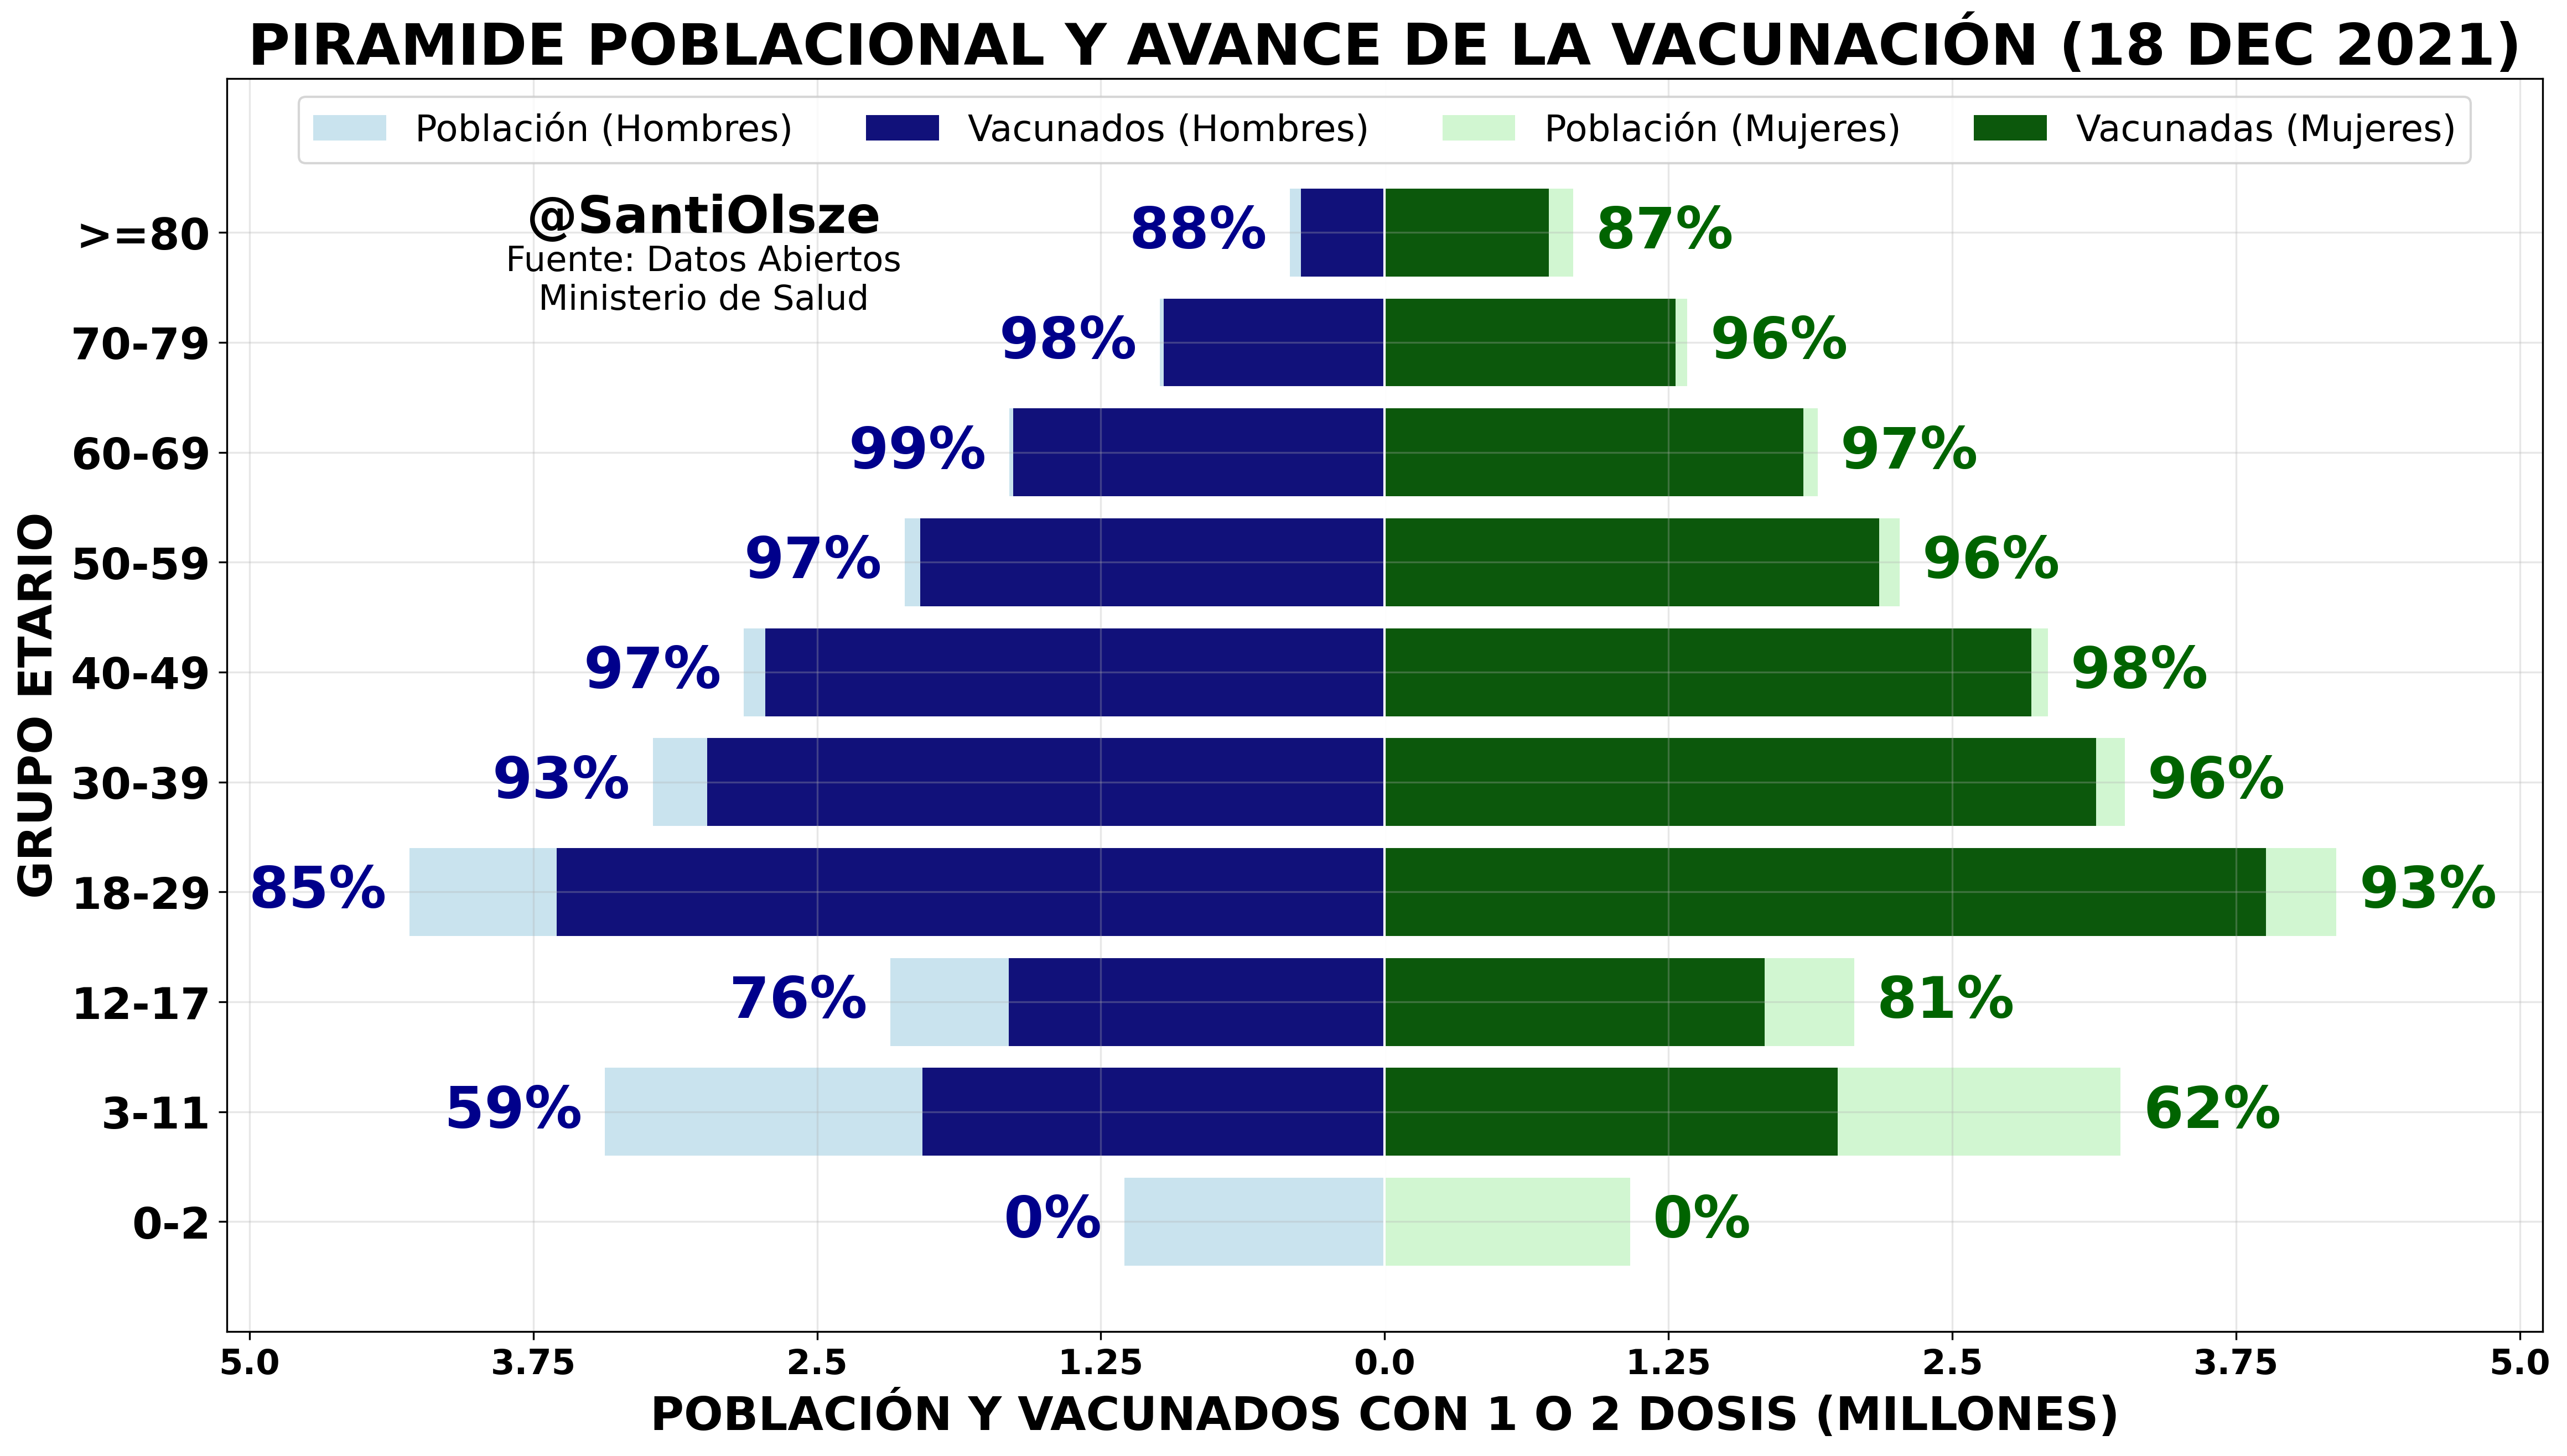

In [25]:
piramide = pd.read_csv("../Flourish/al_menos_una_dosis.csv")
hoy = piramide[piramide.Fecha == max(piramide.Fecha)].sort_values("Edad", ascending = False)

hoy["edad_inicial"] = [int(i.split("-")[0].replace(">=","")) for i in hoy.Edad]
hoy = hoy.sort_values(["edad_inicial"], ascending = False).drop_duplicates()
hoy.drop( "edad_inicial", axis = 1, inplace = True)
#hoy["Edad"] = hoy.Edad.str.replace("0-10","0-9").str.replace("10-18","10-17")
piramide_male = hoy[["Edad","Vacunados (Hombre)","No vacunados (Hombre)"]].rename(columns = {"Vacunados (Hombre)":"vacunados"})
piramide_male["Población"] = piramide_male.vacunados + piramide_male["No vacunados (Hombre)"]
piramide_male["Población"] = piramide_male.vacunados + piramide_male["No vacunados (Hombre)"]


piramide_female = hoy[["Edad","Vacunadas (Mujer)","No vacunadas (Mujer)"]].rename(columns = {"Vacunadas (Mujer)":"vacunados"})
piramide_female["Población"] = piramide_female.vacunados + piramide_female["No vacunadas (Mujer)"]
piramide_female["Población"] = piramide_female.vacunados + piramide_female["No vacunadas (Mujer)"]

piramide_male["porcentaje"] = piramide_male.vacunados / piramide_male.Población*100
piramide_female["porcentaje"] = piramide_female.vacunados / piramide_female.Población*100


date = datetime.datetime.today()
import seaborn as sns

cm1 = "palegreen"
cm2 = "darkgreen"
ch1 = "skyblue"
ch2 = "darkblue"

plt.figure(figsize = (18,10), dpi = 300)
bar_plot = sns.barplot(x='Población', y='Edad', data=piramide_male, lw=0, color = ch1, alpha = 0.5, label = "Población (Hombres)")
bar_plot = sns.barplot(x='vacunados', y='Edad', data=piramide_male, lw=0, color = ch2, label = "Vacunados (Hombres)")



bar_plot = sns.barplot(x='Población', y='Edad', data=piramide_female, lw=0, color = cm1, alpha = 0.5,  label = "Población (Mujeres)")
bar_plot = sns.barplot(x='vacunados', y='Edad', data=piramide_female, lw=0, color = cm2, label = "Vacunadas (Mujeres)")

plt.legend(ncol = 4, fontsize = 15.8, loc = "upper center")
plt.title("PIRAMIDE POBLACIONAL Y AVANCE DE LA VACUNACIÓN".upper() + " " + date.strftime("(%d %b %Y)").upper(), fontsize = 25, fontweight = "bold")

plt.ylabel("Grupo etario".upper(), fontsize = 20, fontweight = "bold")
plt.xlabel("Población y Vacunados con 1 o 2 dosis (millones)".upper(), fontsize = 20, fontweight = "bold")
plt.xticks(fontsize = 15, fontweight = "bold")
plt.yticks(fontsize = 19, fontweight = "bold")
plt.ylim(10,-1.4)
plt.grid(alpha = 0.3)
for i,z in enumerate(piramide_male.Edad):
    y = i
    x = piramide_male[piramide_male.Edad == z]["Población"] - 100000
    s = "{:.0f}%".format(piramide_male[piramide_male.Edad == z]["porcentaje"].item())
    plt.text(x = x ,y = y, s = s, fontsize = 25, fontweight = "bold", ha = "right", va = "center", color = ch2)
    
for i,z in enumerate(piramide_female.Edad):
    y = i
    x = piramide_female[piramide_female.Edad == z]["Población"] +100000
    s = "{:.0f}%".format(piramide_female[piramide_female.Edad == z]["porcentaje"].item())
    plt.text(x = x ,y = y, s = s, fontsize = 25, fontweight = "bold", ha = "left", va = "center", color = cm2)

plt.xticks(np.linspace(-5000000,5000000,9), abs(np.linspace(-5,5,9)))
plt.xlim(-5100000,5100000)
plt.text(x = -3000000,y = 0, s = "@SantiOlsze",fontsize = 22, fontweight = "bold", ha = "center")
plt.text(x = -3000000,y = .7, s = "Fuente: Datos Abiertos\nMinisterio de Salud",fontsize = 15, ha = "center")
plt.axvline(0,color = "w", linewidth = 1)
plt.savefig("piramide", bbox_inches = "tight")

In [26]:
hoy[["Edad","Porcentaje con al menos una dosis"]][["Edad","Porcentaje con al menos una dosis"]].sort_index()

Edad  Porcentaje con al menos una dosis
3550    0-2                               0.00
3551   3-11                              60.38
3552  12-17                              78.43
3553  18-29                              88.73
3554  30-39                              94.39
3555  40-49                              97.10
3556  50-59                              96.40
3557  60-69                              97.74
3558  70-79                              97.05
3559   >=80                              87.63

In [27]:
restan = hoy.copy()
restan["restantes"] = abs(restan["No vacunados (Hombre)"]) + restan["No vacunadas (Mujer)"]
restan = restan[["Edad","restantes"]]
restan = restan[:7]
restan["cumsum"] = restan.restantes.cumsum()
restan["share"] = restan["restantes"] / restan["restantes"].sum() *100
restan["cumsum_share"] = restan.share.cumsum()

In [28]:
restan["cumshare_inversa"] = 100 - round(restan.cumsum_share,4)

In [29]:
restan

Edad  restantes     cumsum      share  cumsum_share  cumshare_inversa
3559   >=80   154214.0   154214.0   7.917432      7.917432           92.0826
3558  70-79    68585.0   222799.0   3.521192     11.438624           88.5614
3557  60-69    80514.0   303313.0   4.133633     15.572257           84.4277
3556  50-59   157830.0   461143.0   8.103080     23.675337           76.3247
3555  40-49   166303.0   627446.0   8.538088     32.213425           67.7866
3554  30-39   363694.0   991140.0  18.672251     50.885676           49.1143
3553  18-29   956638.0  1947778.0  49.114324    100.000000            0.0000

In [30]:
t = hoy[~hoy.Edad.isin(["0-9","10-17"])]
#t  = hoy.copy()
t["Vac"] = abs(t["Vacunados (Hombre)"]) + t["Vacunadas (Mujer)"]
t["Pob"] = abs(t["No vacunados (Hombre)"]) + t["No vacunadas (Mujer)"] + t["Vac"]

In [31]:
(1033733.0 + 1057580.0 + 620800.0 + 610705.0) / (1033733.0 + 1057580.0 + 620800.0 + 610705.0 + 1144573.0 + 1010791.0 + 2814409.0 + 2631195.0)

0.3041819017692218

In [32]:
print(t.head(7).Vac.sum() / t.head(7).Pob.sum())
t.head(7)

0.9395572523381023


Fecha   Edad  Vacunados (Hombre)  Vacunadas (Mujer)  \
3559  2021-12-18   >=80           -368951.0           723278.0   
3558  2021-12-18  70-79           -972488.0          1282322.0   
3557  2021-12-18  60-69          -1635917.0          1844104.0   
3556  2021-12-18  50-59          -2046088.0          2177977.0   
3555  2021-12-18  40-49          -2727914.0          2849413.0   
3554  2021-12-18  30-39          -2984693.0          3134278.0   
3553  2021-12-18  18-29          -3647539.0          3882433.0   

      No vacunados (Hombre)  No vacunadas (Mujer)  \
3559               -47959.0              106255.0   
3558               -17477.0               51108.0   
3557               -17508.0               63006.0   
3556               -67377.0               90453.0   
3555               -94241.0               72062.0   
3554              -237677.0              126017.0   
3553              -647437.0              309201.0   

      Porcentaje con al menos una dosis        Vac        Pob  
3559                              87.63  1092229.0  1246443.0  
3558                              97.05  2254810.0  2323395.0  
3557                              97.74  3480021.0  3560535.0  
3556                              96.40  4224065.0  4381895.0  
3555                              97.10  5577327.0  5743630.0  
3554                              94.39  6118971.0  6482665.0  
3553                              88.73  7529972.0  8486610.0

In [33]:
restan["acumulada"] = restan.cumshare_inversa.shift(-1).fillna(100)

In [34]:
restan

Edad  restantes     cumsum      share  cumsum_share  cumshare_inversa  \
3559   >=80   154214.0   154214.0   7.917432      7.917432           92.0826   
3558  70-79    68585.0   222799.0   3.521192     11.438624           88.5614   
3557  60-69    80514.0   303313.0   4.133633     15.572257           84.4277   
3556  50-59   157830.0   461143.0   8.103080     23.675337           76.3247   
3555  40-49   166303.0   627446.0   8.538088     32.213425           67.7866   
3554  30-39   363694.0   991140.0  18.672251     50.885676           49.1143   
3553  18-29   956638.0  1947778.0  49.114324    100.000000            0.0000   

      acumulada  
3559    88.5614  
3558    84.4277  
3557    76.3247  
3556    67.7866  
3555    49.1143  
3554     0.0000  
3553   100.0000

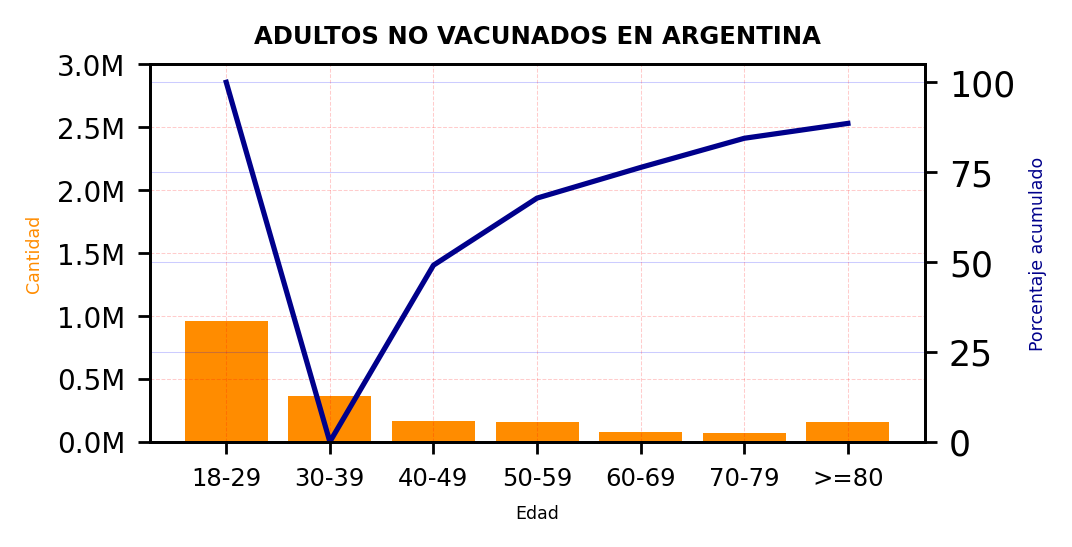

In [35]:
restan.sort_values("Edad", inplace = True)
fig, ax = plt.subplots(figsize = (4,2),dpi = 250)
plt.bar(restan.Edad, restan.restantes/1000000, color = "darkorange")
plt.yticks(np.linspace(0,3,7),[f"{i}M" for i in np.linspace(0,3,7)], fontsize = 8)
plt.xticks(fontsize = 7)
plt.title("Adultos no vacunados en Argentina".upper(), fontweight = "bold", fontsize = 7)
plt.ylabel("Cantidad", fontsize = 5, color = "darkorange")
plt.xlabel("Edad", fontsize = 5)
ax2 = ax.twinx()
ax2.plot(restan.Edad, restan.acumulada, color = "darkblue")
ax2.set_ylabel("Porcentaje acumulado", fontsize = 5, color = "darkblue")
ax.grid(alpha = 0.2, color = "r", ls = "--", linewidth = .3)
ax2.set_ylim(0,105)
ax2.grid(alpha = 0.2, color = "b", ls = "-", linewidth = .3)

In [36]:
piramide["fecha"] = pd.to_datetime(piramide.Fecha)

In [37]:
Edad = ['0-2',"3-11",'12-17', '18-29', '30-39','40-49', '50-59', '60-69',  '70-79', '>=80']
Color = ["gray","crimson","green","blue","darkblue","goldenrod","darkgoldenrod","red","darkred","lightgray"]
palette = dict(zip(Edad,Color))

In [38]:
if True:
    piramide.rename(columns = {"Porcentaje con al menos una dosis":"Porcentaje cubierto del grupo etario"}, inplace = True)
    hoy.rename(columns = {"Porcentaje con al menos una dosis":"Porcentaje cubierto del grupo etario"}, inplace = True)

In [39]:
v = abs(hoy.head().sum()["Vacunados (Hombre)"]) + abs(hoy.head().sum()["Vacunadas (Mujer)"])

nv = abs(hoy.head().sum()["No vacunados (Hombre)"]) + abs(hoy.head().sum()["No vacunadas (Mujer)"])

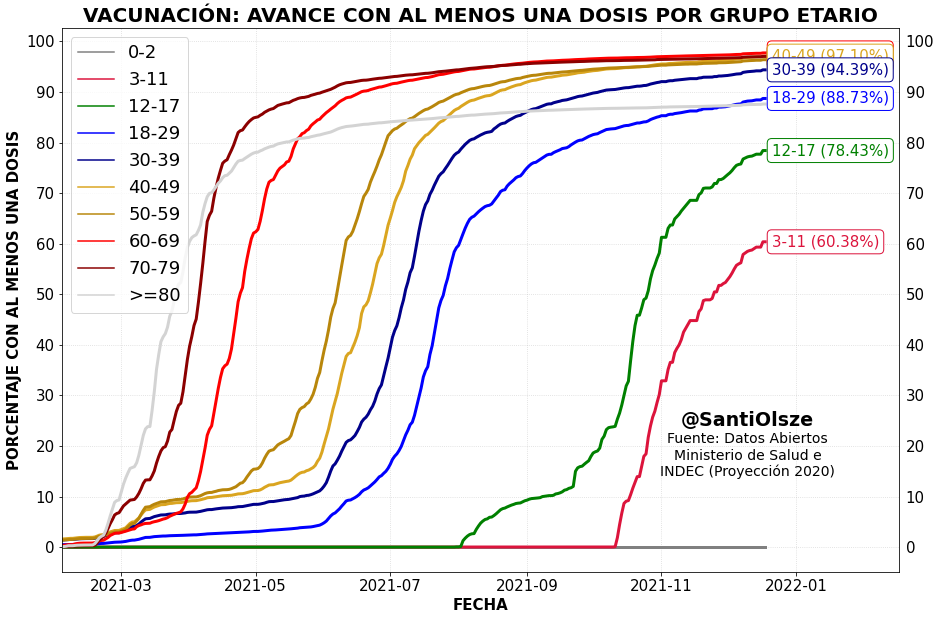

In [40]:
fig, ax = plt.subplots(figsize = (15,10))

sns.lineplot(x = "fecha", y = "Porcentaje cubierto del grupo etario", data = piramide, hue = "Edad", linewidth = 3, ax = ax, palette = palette)
ax.legend(ncol = 1, fontsize = 18, loc = "upper left")
plt.xlabel("Fecha".upper(), fontsize = 15, fontweight = "bold")
plt.xticks(fontsize = 15)
plt.grid(alpha = 0.5, ls = ":")
ax.set_yticks(np.linspace(0,100,11))
hoy["edad_inicial"] = [int(i.split("-")[0].replace(">=","")) for i in hoy.Edad]
hoy = hoy.sort_values(["edad_inicial"], ascending = False).drop_duplicates()
hoy.drop( "edad_inicial", axis = 1, inplace = True)
box = ["3-11","12-17","18-29","30-39","40-49","50-59","60-69","70-79"]
box.reverse()
for p in box:
    sdf = hoy[hoy.Edad == p]
    props = dict(boxstyle='round', facecolor='w', alpha=1, edgecolor = palette[p])

    ax.text(x = pd.to_datetime(hoy.Fecha.max())+datetime.timedelta(days = 3),       # set the text at 1 unit right of the bar
            y = sdf["Porcentaje cubierto del grupo etario"], # get Y coordinate + X coordinate / 2
            s= '{} ({:.2f}%)'.format(p, sdf["Porcentaje cubierto del grupo etario"].item())
            , fontsize = 15, color = palette[p], va = "center",bbox = props)

ax.tick_params(axis='y', which='both', labelleft='on', labelright='off')
#ax.yaxis.set_label_position("left")
plt.yticks(np.linspace(0,100,11),fontsize = 15)
ax.set_ylabel("Porcentaje con al menos una dosis".upper(), fontsize = 15, fontweight = "bold")

plt.title("VACUNACIÓN: AVANCE CON AL MENOS UNA DOSIS POR GRUPO ETARIO", fontsize = 20, fontweight = "bold")


plt.text(x = pd.to_datetime("2021-12-10"),y = 24, s = "@SantiOlsze",fontsize = 19, fontweight = "bold", ha = "center")
plt.text(x = pd.to_datetime("2021-12-10"),y = 14, s = "Fuente: Datos Abiertos\nMinisterio de Salud e\nINDEC (Proyección 2020)",fontsize = 14, ha = "center")

plt.xlim(pd.to_datetime("2021-2-2"),datetime.datetime.today() +datetime.timedelta(days = 60))

plt.savefig("avance_por_franja", bbox_inches = "tight")

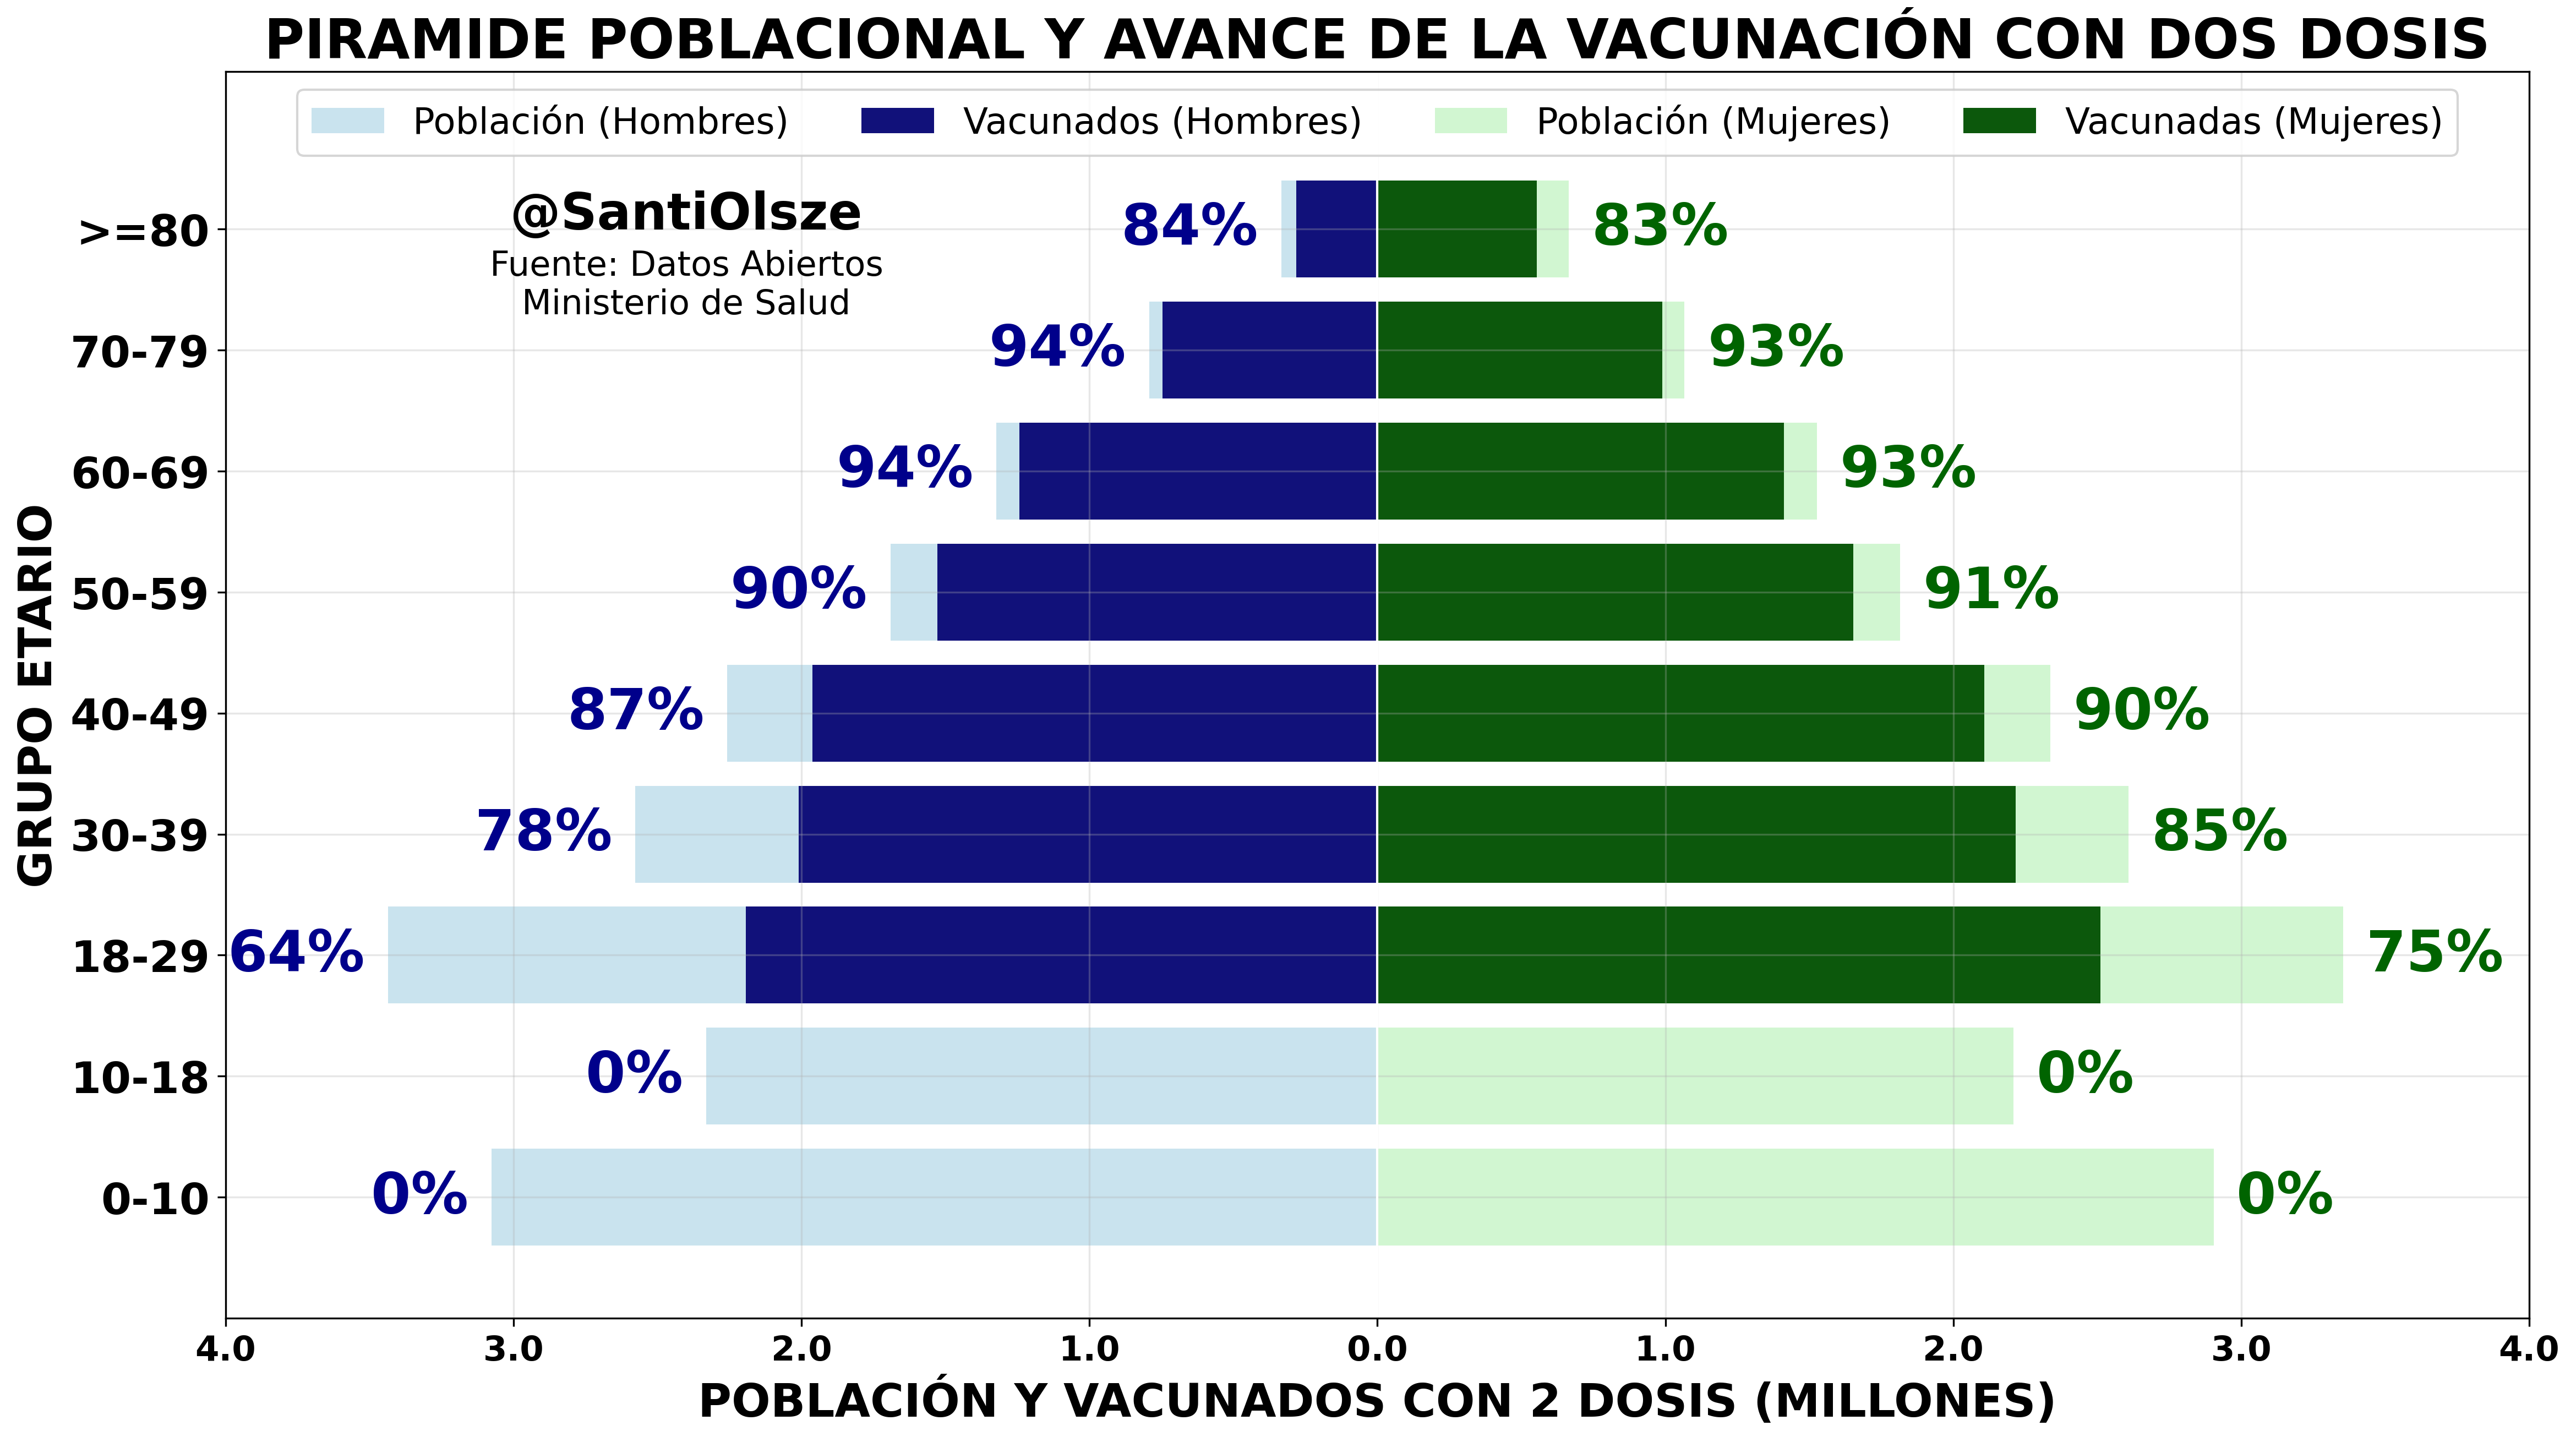

In [41]:
pre_base = pd.read_pickle("vacunas_base.pkl")
pre_base.rename(columns = {"count":"lote_vacuna"}, inplace = True)
try:
    pre_base["fecha_aplicacion"] = pre_base["fecha_aplicacion"].str.replace("S.I.","2020-12-30")
except:
    print()
pre_base["fecha_aplicacion"] = pd.to_datetime(pre_base.fecha_aplicacion)
pre_base["grupo_etario"] = pre_base["grupo_etario"].str.replace("80-89", ">=80").replace("90-99", ">=80").replace(">=100", ">=80").replace("10-17", "10-18")
vac_piramide = pre_base[pre_base.orden_dosis == 2].groupby(["grupo_etario","sexo"], as_index = False).sum()[["grupo_etario","sexo","lote_vacuna"]]
vac_piramide["sexo"] =vac_piramide["sexo"].str.replace("F","Mujeres").replace("M","Varones")
vac_piramide = vac_piramide.rename(columns = {"lote_vacuna":"vacunados"})
pob_piramide = pd.read_csv("poblacion_arg_piramide.csv")
piramide = pd.merge(pob_piramide,vac_piramide, left_on = ["Edad","Sexo"], right_on = ["grupo_etario","sexo"], how = "left").fillna(0)
piramide = piramide[["Edad","Sexo","Población","vacunados"]]




piramide.sort_values("Edad", inplace = True, ascending = False) 
piramide["porcentaje"] = piramide.vacunados / piramide["Población"] * 100
piramide_male = piramide[piramide.Sexo == "Varones"].copy()
piramide_male["Población"] = piramide_male["Población"]*-1
piramide_male["vacunados"] = piramide_male["vacunados"]*-1
piramide_female = piramide[piramide.Sexo == "Mujeres"].copy()


import seaborn as sns

cm1 = "palegreen"
cm2 = "darkgreen"
ch1 = "skyblue"
ch2 = "darkblue"

plt.figure(figsize = (18,10), dpi = 300)
bar_plot = sns.barplot(x='Población', y='Edad', data=piramide_male, lw=0, color = ch1, alpha = 0.5, label = "Población (Hombres)")
bar_plot = sns.barplot(x='vacunados', y='Edad', data=piramide_male, lw=0, color = ch2, label = "Vacunados (Hombres)")


bar_plot = sns.barplot(x='Población', y='Edad', data=piramide_female, lw=0, color = cm1, alpha = 0.5,  label = "Población (Mujeres)")
bar_plot = sns.barplot(x='vacunados', y='Edad', data=piramide_female, lw=0, color = cm2, label = "Vacunadas (Mujeres)")

plt.legend(ncol = 4, fontsize = 15.8, loc = "upper center")
plt.title("PIRAMIDE POBLACIONAL Y AVANCE DE LA VACUNACIÓN CON DOS DOSIS".upper(), fontsize = 24, fontweight = "bold")

plt.ylabel("Grupo etario".upper(), fontsize = 20, fontweight = "bold")
plt.xlabel("Población y Vacunados con 2 dosis (millones)".upper(), fontsize = 20, fontweight = "bold")
plt.xticks(fontsize = 15, fontweight = "bold")
plt.yticks(fontsize = 19, fontweight = "bold")
plt.ylim(9,-1.3)
plt.grid(alpha = 0.3)
for i,z in enumerate(piramide_male.Edad):
    y = i
    x = piramide_male[piramide_male.Edad == z]["Población"] - 100000
    s = "{:.0f}%".format(piramide_male[piramide_male.Edad == z]["porcentaje"].item())
    plt.text(x = x ,y = y, s = s, fontsize = 25, fontweight = "bold", ha = "right", va = "center", color = ch2)
    
for i,z in enumerate(piramide_female.Edad):
    y = i
    x = piramide_female[piramide_female.Edad == z]["Población"] +100000
    s = "{:.0f}%".format(piramide_female[piramide_female.Edad == z]["porcentaje"].item())
    plt.text(x = x ,y = y, s = s, fontsize = 25, fontweight = "bold", ha = "left", va = "center", color = cm2)

plt.xticks(np.linspace(-5000000,5000000,9), abs(np.linspace(-4,4,9)))
plt.xlim(-5000000,5000000)
plt.text(x = -3000000,y = 0, s = "@SantiOlsze",fontsize = 22, fontweight = "bold", ha = "center")
plt.text(x = -3000000,y = .7, s = "Fuente: Datos Abiertos\nMinisterio de Salud",fontsize = 15, ha = "center")
plt.axvline(0,color = "w", linewidth = 1)
plt.savefig("piramide_segundas", bbox_inches = "tight")

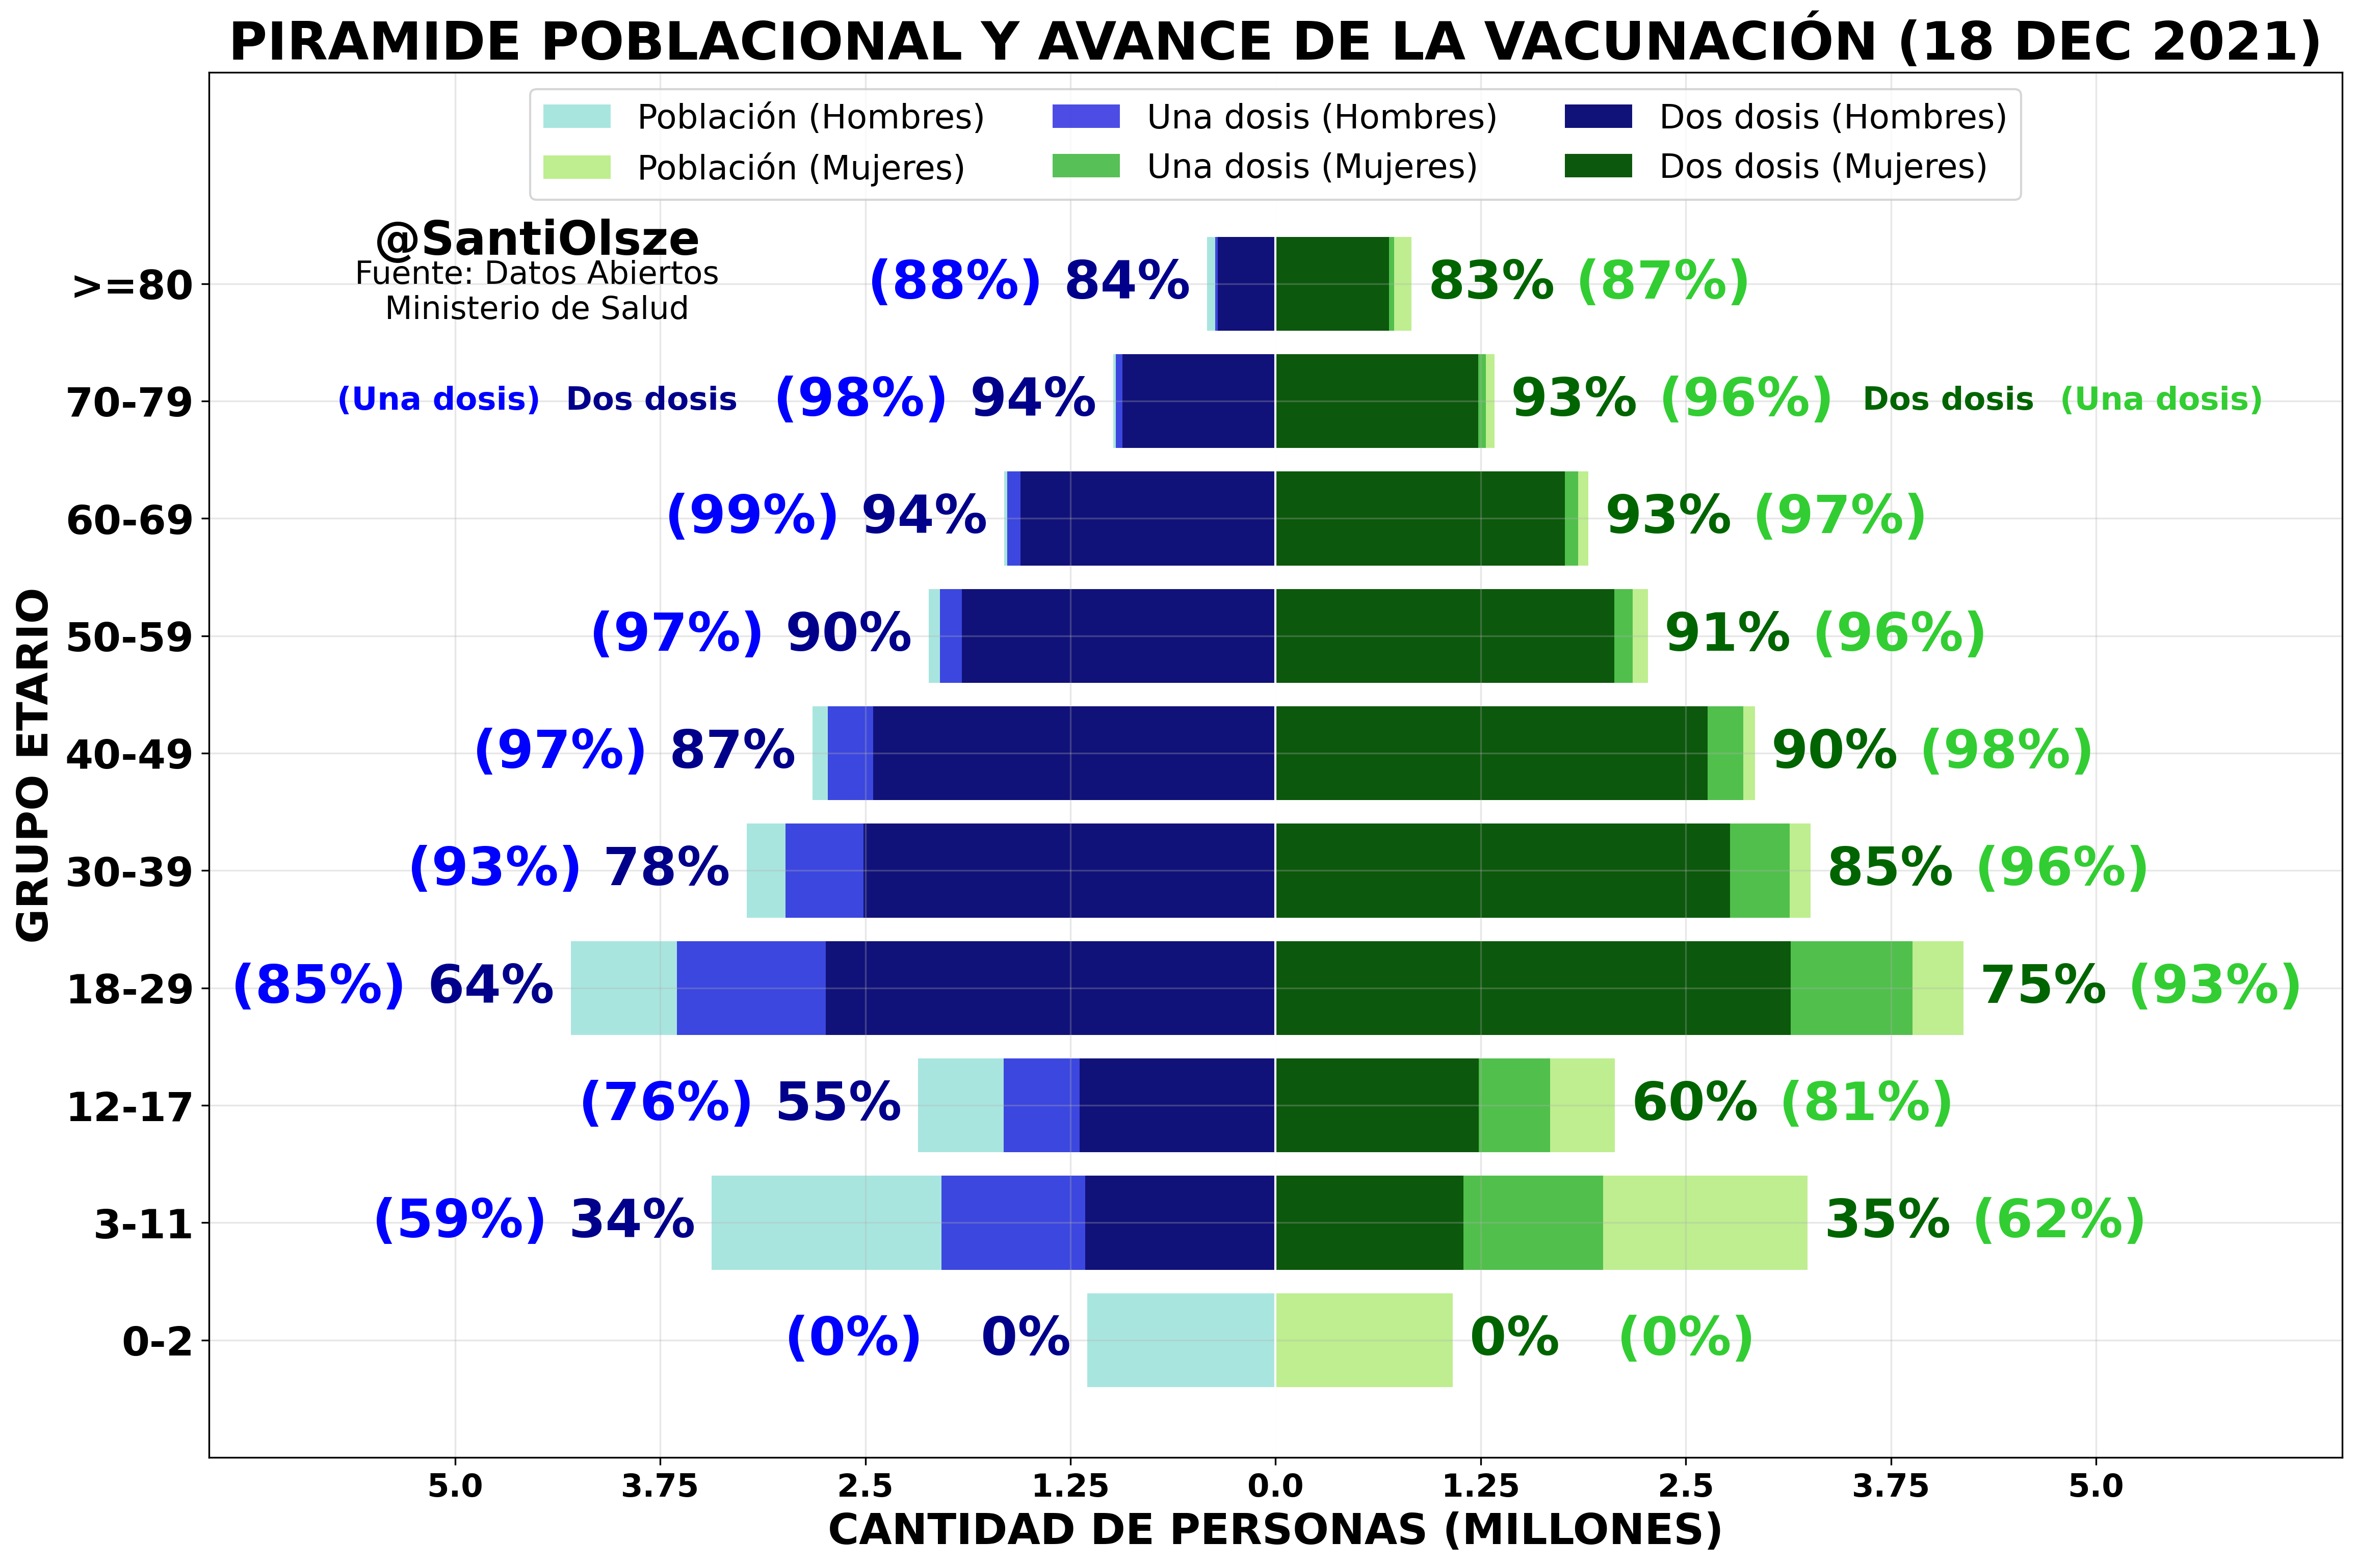

In [42]:
piramide = pd.read_csv("../Flourish/al_menos_una_dosis.csv")
hoy = piramide[piramide.Fecha == max(piramide.Fecha)].sort_values("Edad", ascending = False)



hoy["edad_inicial"] = [int(i.split("-")[0].replace(">=","")) for i in hoy.Edad]
hoy = hoy.sort_values(["edad_inicial"], ascending = False).drop_duplicates()
hoy.drop( "edad_inicial", axis = 1, inplace = True)


piramide_male = hoy[["Edad","Vacunados (Hombre)","No vacunados (Hombre)"]].rename(columns = {"Vacunados (Hombre)":"vacunados"})
piramide_male["Población"] = piramide_male.vacunados + piramide_male["No vacunados (Hombre)"]
piramide_male["Población"] = piramide_male.vacunados + piramide_male["No vacunados (Hombre)"]


piramide_female = hoy[["Edad","Vacunadas (Mujer)","No vacunadas (Mujer)"]].rename(columns = {"Vacunadas (Mujer)":"vacunados"})
piramide_female["Población"] = piramide_female.vacunados + piramide_female["No vacunadas (Mujer)"]
piramide_female["Población"] = piramide_female.vacunados + piramide_female["No vacunadas (Mujer)"]

piramide_male["porcentaje"] = piramide_male.vacunados / piramide_male.Población*100
piramide_female["porcentaje"] = piramide_female.vacunados / piramide_female.Población*100




date = datetime.datetime.today()
import seaborn as sns

cm1 = "chartreuse"#"lime"#"palegreen"
cm2 = "limegreen"
ch1 = "turquoise"#"skyblue"
ch2 = "b"

plt.figure(figsize = (18,12), dpi = 300)
bar_plot = sns.barplot(x='Población', y='Edad', data=piramide_male, lw=0, color = ch1, alpha = 0.5, label = "Población (Hombres)")


bar_plot = sns.barplot(x='Población', y='Edad', data=piramide_female, lw=0, color = cm1, alpha = 0.5,  label = "Población (Mujeres)")

bar_plot = sns.barplot(x='vacunados', y='Edad', data=piramide_male, lw=0, color = ch2,alpha = 0.8, label = "Una dosis (Hombres)")
bar_plot = sns.barplot(x='vacunados', y='Edad', data=piramide_female, lw=0, color = cm2,alpha = 0.9, label = "Una dosis (Mujeres)")



for i,z in enumerate(piramide_male.Edad):
    y = i
    x = piramide_male[piramide_male.Edad == z]["Población"] - 1000000
    s = "({:.0f}%)".format(piramide_male[piramide_male.Edad == z]["porcentaje"].item())
    plt.text(x = x ,y = y, s = s, fontsize = 25, fontweight = "bold", ha = "right", va = "center", color = ch2)
    
for i,z in enumerate(piramide_female.Edad):
    y = i
    x = piramide_female[piramide_female.Edad == z]["Población"] +1000000
    s = "({:.0f}%)".format(piramide_female[piramide_female.Edad == z]["porcentaje"].item())
    plt.text(x = x ,y = y, s = s, fontsize = 25, fontweight = "bold", ha = "left", va = "center", color = cm2)


pre_base = pd.read_pickle("vacunas_base.pkl")
pre_base["lote_vacuna"] = pre_base["count"]
try:
    pre_base["fecha_aplicacion"] = pre_base["fecha_aplicacion"].str.replace("S.I.","2020-12-30")
except:
    print()
pre_base["fecha_aplicacion"] = pd.to_datetime(pre_base.fecha_aplicacion)
pre_base["grupo_etario"] = pre_base["grupo_etario"].str.replace("80-89", ">=80").replace("90-99", ">=80").replace(">=100", ">=80")
vac_piramide = pre_base[pre_base.orden_dosis == 2].groupby(["grupo_etario","sexo"], as_index = False).sum()[["grupo_etario","sexo","lote_vacuna"]]
vac_piramide["sexo"] =vac_piramide["sexo"].str.replace("F","F").replace("M","M")
vac_piramide = vac_piramide.rename(columns = {"lote_vacuna":"vacunados"})
pob_piramide = pd.read_csv("poblacion_piramide_artificial.csv")
piramide = pd.merge(pob_piramide,vac_piramide, left_on = ["Edad","Sexo"], right_on = ["grupo_etario","sexo"], how = "left").fillna(0)
piramide = piramide[["Edad","Sexo","Población","vacunados"]]



piramide["edad_inicial"] = [int(i.split("-")[0].replace(">=","")) for i in piramide.Edad]
piramide = piramide.sort_values(["edad_inicial"], ascending = False).drop_duplicates()
piramide.drop( "edad_inicial", axis = 1, inplace = True)

piramide["porcentaje"] = piramide.vacunados / piramide["Población"] * 100
piramide_male = piramide[piramide.Sexo == "M"].copy()
piramide_male["Población"] = piramide_male["Población"]*-1
piramide_male["vacunados"] = piramide_male["vacunados"]*-1
piramide_female = piramide[piramide.Sexo == "F"].copy()



import seaborn as sns

cm1 = "r"
cm2b = "darkgreen"
ch1 = "r"
ch2b = "darkblue"


#bar_plot = sns.barplot(x='Población', y='Edad', data=piramide_female, lw=0, color = cm1, alpha = 0.5,  label = "Población (Mujeres)")
bar_plot = sns.barplot(x='vacunados', y='Edad', data=piramide_male, lw=0, color = ch2b, label = "Dos dosis (Hombres)")
bar_plot = sns.barplot(x='vacunados', y='Edad', data=piramide_female, lw=0, color = cm2b, label = "Dos dosis (Mujeres)")



plt.legend(ncol = 3, fontsize = 15.8, loc = "upper center")
plt.title("PIRAMIDE POBLACIONAL Y AVANCE DE LA VACUNACIÓN".upper() + " " + date.strftime("(%d %b %Y)").upper(), fontsize = 25, fontweight = "bold")
plt.ylabel("Grupo etario".upper(), fontsize = 20, fontweight = "bold")
plt.xlabel("CANTIDAD DE PERSONAS (MILLONES)".upper(), fontsize = 20, fontweight = "bold")
plt.xticks(fontsize = 15, fontweight = "bold")
plt.yticks(fontsize = 19, fontweight = "bold")
plt.ylim(10,-1.8)
plt.grid(alpha = 0.3)

for i,z in enumerate(piramide_male.Edad):
    y = i
    x = piramide_male[piramide_male.Edad == z]["Población"] - 100000
    s = "{:.0f}%".format(piramide_male[piramide_male.Edad == z]["porcentaje"].item())
    plt.text(x = x ,y = y, s = s, fontsize = 25, fontweight = "bold", ha = "right", va = "center", color = ch2b)
    
for i,z in enumerate(piramide_female.Edad):
    y = i
    x = piramide_female[piramide_female.Edad == z]["Población"] +100000
    s = "{:.0f}%".format(piramide_female[piramide_female.Edad == z]["porcentaje"].item())
    plt.text(x = x ,y = y, s = s, fontsize = 25, fontweight = "bold", ha = "left", va = "center", color = cm2b)


plt.text(x = -5100000,y = 1, s = "(Una dosis)",fontsize = 15, ha = "center",va = "center", color = ch2, fontweight = "bold")
plt.text(x = -3800000,y = 1, s = "Dos dosis",fontsize = 15, ha = "center",va = "center", color = ch2b, fontweight = "bold")

plt.text(x = 5400000,y = 1, s = "(Una dosis)",fontsize = 15, ha = "center",va = "center", color = cm2, fontweight = "bold")
plt.text(x = 4100000,y = 1, s = "Dos dosis",fontsize = 15, ha = "center",va = "center", color = cm2b, fontweight = "bold")


plt.xticks(np.linspace(-5000000,5000000,9), abs(np.linspace(-5,5,9)))
plt.xlim(-6500000,6500000)
plt.text(x = -4500000,y = -0.25, s = "@SantiOlsze",fontsize = 22, fontweight = "bold", ha = "center")
plt.text(x = -4500000,y = .3, s = "Fuente: Datos Abiertos\nMinisterio de Salud",fontsize = 15, ha = "center")
plt.axvline(0,color = "w", linewidth = 1)
plt.savefig("piramide_todas", bbox_inches = "tight")

In [43]:
u = hoy[["Edad","Porcentaje con al menos una dosis"]][["Edad","Porcentaje con al menos una dosis"]].sort_index()

In [44]:
u

Edad  Porcentaje con al menos una dosis
3550    0-2                               0.00
3551   3-11                              60.38
3552  12-17                              78.43
3553  18-29                              88.73
3554  30-39                              94.39
3555  40-49                              97.10
3556  50-59                              96.40
3557  60-69                              97.74
3558  70-79                              97.05
3559   >=80                              87.63

In [45]:
vacunas_base.groupby("orden_dosis").sum()[["lote_vacuna"]]

lote_vacuna
orden_dosis             
1               37739691
2               31556249
3                3815035

In [46]:
piramide["Edad"] = piramide.Edad.str.replace("3-11","03-11")
piramide.sort_values("Edad", inplace = True)

In [47]:
p = piramide.groupby("Edad").mean()
p[["porcentaje"]]

porcentaje
Edad             
0-2      0.000000
03-11   34.539256
12-17   57.324225
18-29   69.368526
30-39   81.461050
40-49   88.550864
50-59   90.756482
60-69   93.292394
70-79   93.503400
>=80    83.818014

In [48]:
f = 7

print("De los adultos, el {:.2f} recibió dos dosis".format(p.loc[p.index[-f:],:].vacunados.sum() 
                                                                        / p.loc[p.index[-f:],:].Población.sum()*100))

print(p.loc[p.index[-f:],:].index)

De los adultos, el 83.04 recibió dos dosis
Index(['18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '>=80'], dtype='object', name='Edad')


In [49]:
vacunas_base.groupby("grupo_etario").sum()

jurisdiccion_residencia_id  depto_residencia_id  \
grupo_etario                                                    
12-17                           15438257             97445931   
18-29                           62459084            410817671   
3-11                            13473627            101540331   
30-39                           56730726            404246062   
40-49                           49504776            346643693   
50-59                           41292945            280337463   
60-69                           27516792            187341644   
70-79                           17293653            117041382   
80-89                            9331044             69613521   
90-99                            2848334             25327828   
>=100                             158539              1381412   
S.I.                                3680                49860   

              jurisdiccion_aplicacion_id  depto_aplicacion_id  orden_dosis  \
grupo_etario                                                                 
12-17                           14805426             94864068       664716   
18-29                           58533246            401686786      2896741   
3-11                            13280032             93744092       578802   
30-39                           54034666            382990736      2824783   
40-49                           47891548            333390682      2536228   
50-59                           40231322            273732742      2190261   
60-69                           26906338            193388829      1532948   
70-79                           17013930            120534004       997831   
80-89                            9128282             65234187       548930   
90-99                            2784974             23173978       184665   
>=100                             145860              1066732         9708   
S.I.                                3558                28250          192   

              lote_vacuna  
grupo_etario               
12-17             5806290  
18-29            13645625  
3-11              6386466  
30-39            11775254  
40-49            11142741  
50-59             8912506  
60-69             7632568  
70-79             5222465  
80-89             2196336  
90-99              383171  
>=100                7408  
S.I.                  145

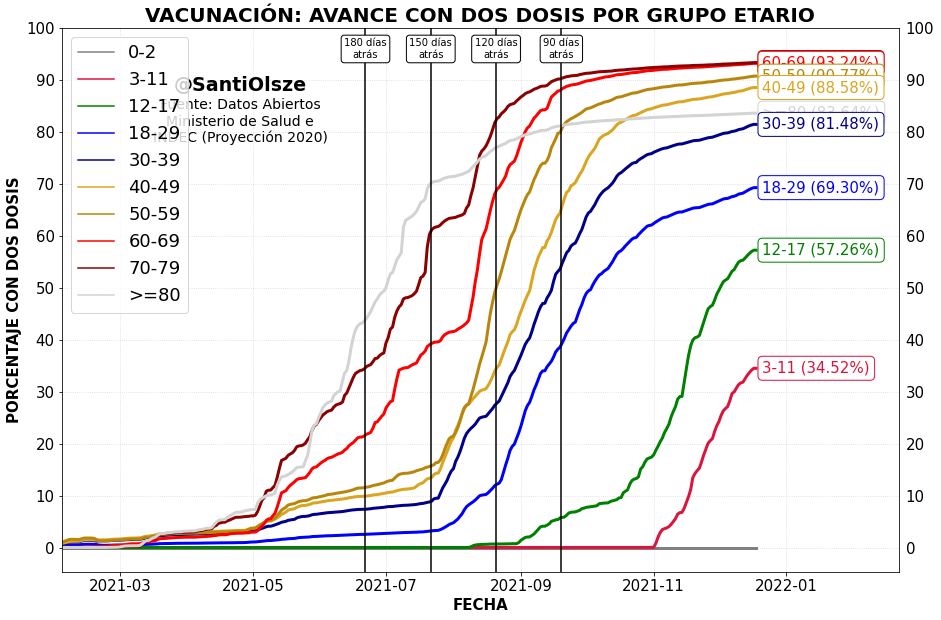

In [69]:
piramide = pd.read_csv("../Flourish/dos_dosis.csv")
piramide["fecha"] = pd.to_datetime(piramide.Fecha)
hoy = piramide[piramide.fecha == piramide.fecha.max()]

fig, ax = plt.subplots(figsize = (15,10))

sns.lineplot(x = "fecha", y = "Porcentaje con dos dosis", data = piramide, hue = "Edad", linewidth = 3, ax = ax, palette = palette)
ax.legend(ncol = 1, fontsize = 18, loc = "upper left")
plt.xlabel("Fecha".upper(), fontsize = 15, fontweight = "bold")
plt.xticks(fontsize = 15)
plt.grid(alpha = 0.5, ls = ":")
ax.set_yticks(np.linspace(0,100,11))

box = ["3-11","12-17","18-29","30-39","40-49","50-59","60-69","70-79", ">=80"]
box.reverse()
for p in box:
    sdf = hoy[hoy.Edad == p]
    props = dict(boxstyle='round', facecolor='w', alpha=1, edgecolor = palette[p])

    ax.text(x = pd.to_datetime(hoy.Fecha.max())+datetime.timedelta(days = 3),       # set the text at 1 unit right of the bar
            y = sdf["Porcentaje con dos dosis"], # get Y coordinate + X coordinate / 2
            s= '{} ({:.2f}%)'.format(p, sdf["Porcentaje con dos dosis"].item())
            , fontsize = 15, color = palette[p], va = "center",bbox = props)

ax.tick_params(axis='y', which='both', labelleft='on', labelright='off')
#ax.yaxis.set_label_position("left")
plt.yticks(np.linspace(0,100,11),fontsize = 15)
ax.set_ylabel("Porcentaje con dos dosis".upper(), fontsize = 15, fontweight = "bold")

plt.title("VACUNACIÓN: AVANCE CON DOS DOSIS POR GRUPO ETARIO", fontsize = 20, fontweight = "bold")


plt.text(x = pd.to_datetime("2021-04-25"),y = 88, s = "@SantiOlsze",fontsize = 19, fontweight = "bold", ha = "center")
plt.text(x = pd.to_datetime("2021-04-25"),y = 78, s = "Fuente: Datos Abiertos\nMinisterio de Salud e\nINDEC (Proyección 2020)",fontsize = 14, ha = "center")

plt.xlim(pd.to_datetime("2021-2-2"),datetime.datetime.today() +datetime.timedelta(days = 65))

props = dict(boxstyle='round', facecolor='w', alpha=1, edgecolor = "k")

flags = [90,120,150,180]
for f in flags:
    x = datetime.datetime.today()-datetime.timedelta(days = f)
    plt.axvline(x, color = "k")
    plt.text(x = x, y = 96, s = f"{f} días\natrás", va = "center", ha = "center", bbox = props)

plt.savefig("avance_por_franja_segundas", bbox_inches = "tight")


In [137]:
vacunas_base = pd.read_pickle("vacunas_base.pkl")

In [138]:
primeras = vacunas_base[vacunas_base.orden_dosis == 1]
segundas = vacunas_base[vacunas_base.orden_dosis == 2]
una = primeras[primeras.jurisdiccion_residencia == "Buenos Aires"].groupby("depto_residencia").sum()[["lote_vacuna"]].rename(columns = {"lote_vacuna":"una"})
dos = segundas[segundas.jurisdiccion_residencia == "Buenos Aires"].groupby("depto_residencia").sum()[["lote_vacuna"]].rename(columns = {"lote_vacuna":"dos"})

KeyError: "None of [Index(['lote_vacuna'], dtype='object')] are in the [columns]"

In [ ]:
pob_pba = pd.read_csv("poblaciones_pba.csv")

In [ ]:
both = una.merge(dos, left_index = True, right_index = True)

In [ ]:
both_pob = both.merge(pob_pba, left_index = True, right_on = "Municipio", how = "inner")

In [ ]:
both.merge(pob_pba, left_index = True, right_on = "Municipio", how = "right").sort_values("una")

In [ ]:
both_pob["una_porc"] = both_pob.una / both_pob.Población * 100
both_pob["dos_porc"] = both_pob.dos / both_pob.Población * 100

In [ ]:
both_pob[both_pob.Municipio == "Marcos Paz"]

In [ ]:
both_plot = both_pob[both_pob.Población > 200000].sort_values("una_porc")

In [ ]:
vacunas = both_plot.rename(columns = 
                           {"Municipio":"jurisdiccion_nombre",
                           "una":"primera_dosis_cantidad",
                           "dos":"segunda_dosis_cantidad",
                           "Población":"poblacion",
                           "una_porc":"porcentaje_primera",
                           "dos_porc":"porcentaje_segunda"})

In [ ]:

#reminder = bool(input("CARGASTE LOS DATOS DE PBA (True or False)?:    "))
if True:
    xmax = 100
    nticks = int(xmax/5 +1)
    colora = "coral"
    colorb = "peachpuff"
    #colora = "lightgreen"
    #colorb = "mediumseagreen"

    fig, ax = plt.subplots(figsize = (13,20))
    ax.barh(vacunas.jurisdiccion_nombre, [-xmax for i in range(len(vacunas.jurisdiccion_nombre))], align='center', color = "lightgray", alpha = 0.2)
    ax.barh(vacunas.jurisdiccion_nombre, [xmax for i in range(len(vacunas.jurisdiccion_nombre))], align='center', color = "lightgray", alpha = 0.2)

    ax.barh(vacunas.jurisdiccion_nombre, vacunas.porcentaje_primera*-1, align='center'
            , label = "% Primera dosis (cantidad)".upper(), alpha = 0.7,color= colora) #color = "salmon
    ax.barh(vacunas.jurisdiccion_nombre, vacunas.porcentaje_segunda
            , align='center',  label = "% Segunda dosis (cantidad)".upper(), alpha = 0.5
           , color = colorb) #color= "deepskyblue"

    plt.grid(alpha = 0.9, ls = ":")

    for pais in vacunas.jurisdiccion_nombre:
        plt.text(0, pais, s = pais.upper(), ha = "center", va = "center", fontsize = 19, fontweight = "bold", color = "k")
        porc = round(vacunas[vacunas.jurisdiccion_nombre == pais].porcentaje_primera.item(),2)
        absoluto = str(vacunas[vacunas.jurisdiccion_nombre == pais].primera_dosis_cantidad.item())
        plt.text(-xmax*.97, pais, s = format(porc, '.2f') + "%   (" + absoluto + ")", ha = "left", va = "center", fontsize = 19, color = "k")
        porc = round(vacunas[vacunas.jurisdiccion_nombre == pais].porcentaje_segunda.item(),2)
        absoluto = str(vacunas[vacunas.jurisdiccion_nombre == pais].segunda_dosis_cantidad.item())
        plt.text(xmax*0.97, pais, s = format(porc, '.2f') + "%   (" + absoluto + ")", ha = "right", va = "center", fontsize = 19, color = "k")



    plt.text(-xmax/1.5,27.05,"@SantiOlsze", fontsize = 22, fontweight = "bold", ha = "center")
    plt.ylim(-2,29)
    ax.set_facecolor("white")
    plt.yticks([], fontsize = 15, fontweight = "bold")
    plt.xticks(np.linspace(-xmax,xmax,nticks).astype(int),[i for i in abs(np.linspace(-xmax,xmax,nticks))], fontsize = 14, fontweight = "bold")
    leg = plt.legend(loc = "upper center", ncol = 2 , fontsize = 18,columnspacing = 1.2)
    leg.get_frame().set_edgecolor('k')
    # plt.title("MUERTES POR MILLON DE HABITANTES", fontsize = 25, fontweight = "bold")
    plt.xlabel("PORCENTAJE DE POBLACIÓN VACUNADA", fontsize = 20, fontweight = "bold")

    pais = 27.4



   # ax.barh(pais, -xmax, align='center', color = "lightgray", alpha = 0.7)
   # ax.barh(pais, xmax, align='center', color = "lightgray", alpha = 0.7)
   # ax.barh(pais, sum(vacunas.primera_dosis_cantidad)/sum(vacunas.poblacion)*-100,color = colora) #color = "salmon")
   # ax.barh(pais, sum(vacunas.segunda_dosis_cantidad)/sum(vacunas.poblacion)*100, color = colorb)#color = "deepskyblue")

    #plt.text(0, pais, s = "ARGENTINA", ha = "center", va = "center", fontsize = 22, fontweight = "bold", color = "k")

   # porc = round(sum(vacunas.primera_dosis_cantidad)/sum(vacunas.poblacion)*-100,2)
   # absoluto = str(sum(vacunas.primera_dosis_cantidad))
   # total = int(absoluto)
   # plt.text(-xmax*.97, pais, s = format(porc*-1, '.2f') + " % (" + absoluto + ")", ha = "left", va = "center", fontsize = 20, color = "k", fontweight = "bold")
   # porc = round(sum(vacunas.segunda_dosis_cantidad)/sum(vacunas.poblacion)*-100,2)
   # absoluto = str(sum(vacunas.segunda_dosis_cantidad))
   # plt.text(xmax*.97, pais, s = format(porc*-1, '.2f') + " % (" + absoluto + ")", ha = "right", va = "center", fontsize = 20, color = "k", fontweight = "bold")
   # total += int(absoluto)
    plt.text(-xmax/2,pais -1.35, s = "PORCENTAJE   |   (CANTIDAD)", ha = "center", va = "center", fontsize = 16, color = "k")
    plt.text(xmax/2,pais -1.35, s = "PORCENTAJE   |    (CANTIDAD)", ha = "center", va = "center", fontsize = 16, color = "k")
        
    total = 1000000
    if total < 1000000:
        text = str(total)[-6:-3] + "." + str(total)[-3:]
        plt.title("VACUNAS COVID-19 APLICADAS EN PBA", fontsize = 31, fontweight = "bold")
    else: 
        text = str(total)[:-6] +  "." + str(total)[-6:-3] + "." + str(total)[-3:]
        plt.title("VACUNAS COVID-19 APLICADAS EN BUENOS AIRES*", fontsize = 25, fontweight = "bold")

    if True:
        plt.text(0,-1.2, "*Se muestran los datos para los municipios con más de 200.000 habitantes" ,ha = "center", va = "center", fontsize = 14)
        #plt.text(0,26.35,"Fuente: Datos Abiertos MINSAL/DiCEI + Sala de Situación PBA*", fontsize = 15, ha = "center")
        
 
    plt.text(20,27.05,"Fuente: Datos Abiertos MINSAL/DiCEI", fontsize = 19, ha = "center")
        
    
  
    plt.savefig("pba_arg", bbox_inches = "tight")


In [86]:
vacunas_base.groupby("grupo_etario").sum()

jurisdiccion_residencia_id  depto_residencia_id  \
grupo_etario                                                    
12-17                           13128212             81442406   
18-29                           58153702            382257774   
3-11                            10013908             75371552   
30-39                           52981101            378050215   
40-49                           46171212            325100862   
50-59                           38529117            262183703   
60-69                           25314670            172617207   
70-79                           15594953            105322993   
80-89                            8312972             61399691   
90-99                            2536961             22283588   
>=100                             134560              1157639   
S.I.                                5080                59540   

              jurisdiccion_aplicacion_id  depto_aplicacion_id  orden_dosis  \
grupo_etario                                                                 
12-17                           12603200             79586947       549970   
18-29                           54537696            374198172      2649305   
3-11                             9937704             69886759       411186   
30-39                           50491314            358808156      2579504   
40-49                           44657990            313458129      2306206   
50-59                           37507228            256442480      1980047   
60-69                           24727630            178637379      1349386   
70-79                           15335754            108523189       847854   
80-89                            8151072             57818792       455155   
90-99                            2493486             20617227       152823   
>=100                             127566               955366         8021   
S.I.                                4958                35462          246   

              lote_vacuna   menor  
grupo_etario                       
12-17             5253414  386142  
18-29            13166721       0  
3-11              5218741  313838  
30-39            11393851       0  
40-49            10808348       0  
50-59             8646018       0  
60-69             7233560       0  
70-79             4830830       0  
80-89             1969863       0  
90-99              346604       0  
>=100                6608       0  
S.I.                  188       0

In [87]:
g

lote_vacuna
orden_dosis             
1               30068502
2               26208647
3                2125442

# PERSONAS FOTO HOY

In [150]:
vacunas_base = pd.read_pickle("vacunas_base.pkl")
vacunas_base.rename(columns = {"count":"lote_vacuna"}, inplace = True)
print(set(vacunas_base.grupo_etario))
vacunas_base["menor"] = vacunas_base.grupo_etario.isin(["10-17","10-18",'3-11','12-17','0-2'])
t = vacunas_base.groupby(["orden_dosis"], as_index = True).sum()[["lote_vacuna"]]
g = vacunas_base[~vacunas_base.menor].groupby(["orden_dosis"], as_index = True).sum()[["lote_vacuna"]]
m = vacunas_base[vacunas_base.menor].groupby(["orden_dosis"], as_index = True).sum()[["lote_vacuna"]]

{'90-99', '70-79', 'S.I.', '3-11', '40-49', '12-17', '80-89', '30-39', '>=100', '50-59', '18-29', '60-69'}


In [151]:
t.loc[1] / pob.Población.sum()

lote_vacuna    0.812978
Name: 1, dtype: float64

In [152]:
pob = pd.read_csv("poblacion_piramide_artificial.csv")
menores = pob[pob.Edad.isin(["10-17","10-18",'3-11','12-17','0-2'])].Población.sum()
mayores = pob.Población.sum() - menores

In [153]:
primeras = g.loc[1].lote_vacuna - g.loc[2].lote_vacuna
segundas = g.loc[2].lote_vacuna - g.loc[3].lote_vacuna
terceras = g.loc[3].lote_vacuna  

primeras_menores = m.loc[1].lote_vacuna - m.loc[2].lote_vacuna 
segundas_menores = m.loc[2].lote_vacuna - m.loc[3].lote_vacuna
terceras_menores = m.loc[3].lote_vacuna

resta_vacunar = mayores - primeras - segundas - terceras

resta_menores = menores - primeras_menores - segundas_menores - terceras_menores

In [154]:
df = pd.DataFrame({"Tres dosis": terceras + terceras_menores,
            "Dos dosis":segundas+segundas_menores,
                "Una sola dosis":primeras + primeras_menores, 
              "Mayores sin vacunar": resta_vacunar, 
              "Menores sin vacunar":resta_menores}, index = range(4)).transpose()[[0]].rename(columns = {0:"Personas"})

print( round(df.Personas*100 / (pob.Población.sum()),2).sum())
df["Porcentaje"] = round(df.Personas*100 / (pob.Población.sum()),2).astype(str)+"%"
df.index = df.index + " (" + df.Porcentaje + ")"
df.to_csv("personas_plot.csv")

100.00000000000001


In [155]:
print(df[0:3].Porcentaje.str.replace("%","").astype(float).sum())
df[0:3]

81.30000000000001


Personas Porcentaje
Tres dosis (4.69%)        2130202      4.69%
Dos dosis (61.1%)        27724046      61.1%
Una sola dosis (15.51%)   7036048     15.51%

# DOSIS CRUZADAS

In [ ]:
vacunas_base = pd.read_pickle("vacunas_base.pkl")

In [ ]:
p = vacunas_base.groupby(["jurisdiccion_aplicacion","jurisdiccion_residencia"], as_index = False).sum()[["jurisdiccion_aplicacion","jurisdiccion_residencia","lote_vacuna"]]

In [ ]:
p = p[p.jurisdiccion_aplicacion != p.jurisdiccion_residencia]
p = p[p.jurisdiccion_residencia != "S.I."]

In [ ]:
p = p.rename(columns = {"lote_vacuna":"cantidad"})

In [ ]:
p.replace("Tierra del Fuego","T. del Fuego").replace("Santiago del Estero","S. del Estero").to_csv("cruce_vacunas.csv", index = None)

In [ ]:
p.cantidad.sum()

In [ ]:
(314005 + 245250)/984225

In [ ]:
p.sort_values("cantidad",ascending = False)

In [ ]:
for i in set(jurisdiccion_aplicacion):
    for j in jurisdiccion_

# vacuna por rango etario

In [26]:
vacuna_base = pd.read_pickle("vacunas_base.pkl")

In [27]:
vacuna_base["vacuna"] = vacuna_base.vacuna.str.replace("COVISHIELD","AstraZeneca")
vacuna_base["grupo_etario"] = vacuna_base.grupo_etario.str.replace("80-89",">=80").str.replace("90-99",">=80").str.replace(">=100",">=80").str.replace("3-11","03-11")


In [28]:

aj = vacuna_base.groupby(["grupo_etario","vacuna"]).sum()[["count"]]

a = aj.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

a['cumsum'] = a.groupby('grupo_etario')['count'].transform(pd.Series.cumsum)


a["grupo_etario"] = [i[0] for i in a.index]
a["vacuna"] = [i[1] for i in a.index]

a.index = range(len(a))

In [29]:
a[a.grupo_etario == '60-69'].vacuna.values

array(['AstraZeneca', 'Cansino', 'Moderna', 'Pfizer', 'Sinopharm',
       'Sputnik'], dtype=object)

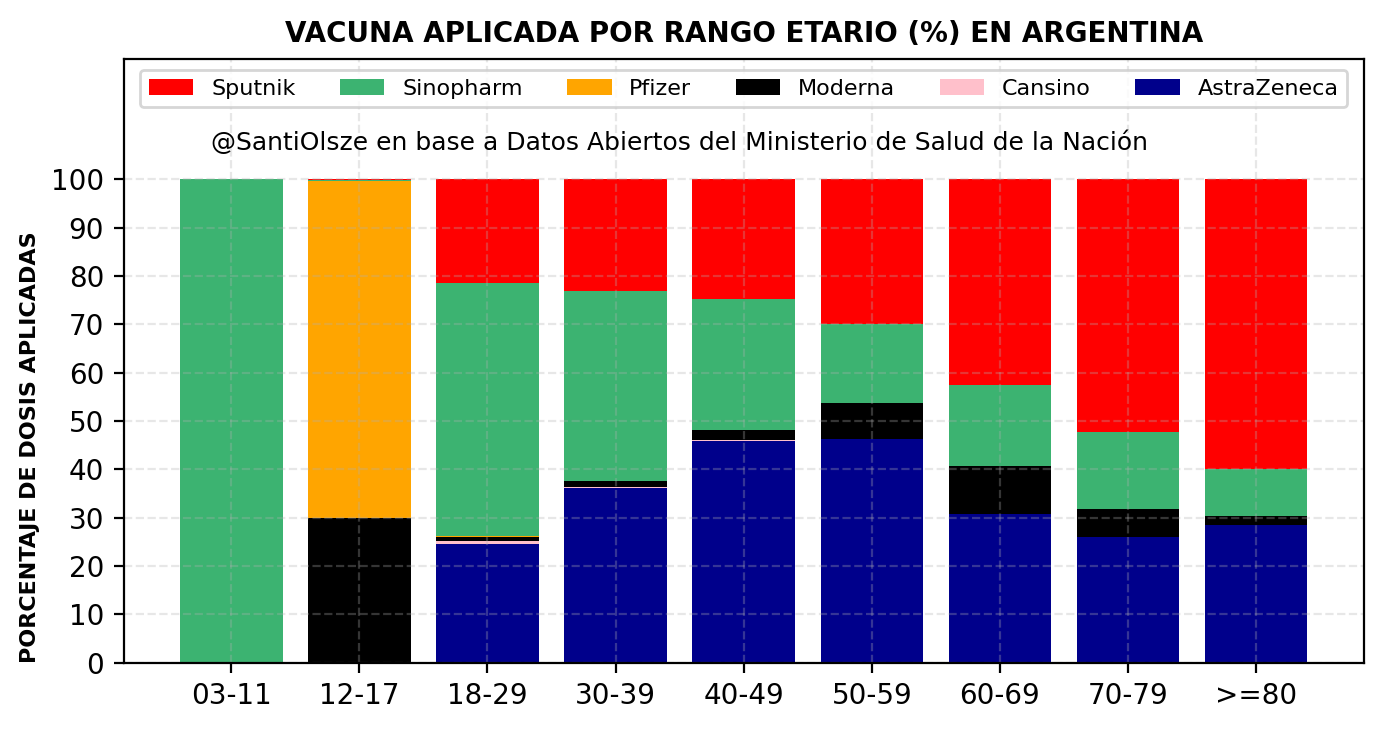

In [30]:
plt.figure(figsize = (8,4), dpi = 200)

colors = {"Sputnik":"red","AstraZeneca":"darkblue","Sinopharm":"mediumseagreen", "Moderna":"k", "Pfizer":"orange","Cansino":"pink"}
alphas = {"Sputnik":1,"AstraZeneca":1,"Sinopharm":1, "Moderna":1,"Pfizer":1,"Cansino":1}

plt.bar(a[~a.grupo_etario.isin(["S.I.", "<18"])].grupo_etario, 0)
vacunardas = list(a[a.grupo_etario == '60-69'].vacuna.values)#list(vacuna_base.vacuna.value_counts().index)
vacunardas.reverse()
for vacuna in vacunardas:
    
    df_plot = a[(a.vacuna == vacuna) & (a.grupo_etario != "S.I.")& (a.grupo_etario != "<18")]
    plt.bar(df_plot.grupo_etario, df_plot["cumsum"],
            color = colors[vacuna], alpha = alphas[vacuna], label = vacuna)


plt.yticks(np.linspace(0,100,11))
plt.ylim(0,125)
plt.legend(loc = "upper center", ncol = len(vacunardas), fontsize = 8)
plt.title("VACUNA APLICADA POR RANGO ETARIO (%) EN ARGENTINA", ha = "center", fontsize =10, fontweight = "bold")
plt.text(3.5,107.5, "@SantiOlsze en base a Datos Abiertos del Ministerio de Salud de la Nación",
        va = "center",ha = "center", fontsize  = 9)
plt.grid(alpha = 0.3, ls = "--")
plt.ylabel("Porcentaje de dosis aplicadas".upper(), fontsize = 8, loc = "bottom", fontweight = "bold")
plt.savefig("vacunas_por_edad", bbox_inches = "tight");

In [73]:
 p = vacuna_base.groupby(["grupo_etario","vacuna", "orden_dosis"], as_index = False).sum()[["grupo_etario","vacuna","orden_dosis","lote_vacuna"]]

KeyError: "['lote_vacuna'] not in index"

In [ ]:
p[p.vacuna == "Moderna"]

# vacunas por condicion

In [ ]:
a = vacuna_base.groupby(["condicion_aplicacion","vacuna"]).sum()[["lote_vacuna"]]

a = a.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

a['cumsum'] = a.groupby('condicion_aplicacion')['lote_vacuna'].transform(pd.Series.cumsum)


a["condicion_aplicacion"] = [i[0] for i in a.index]

a["condicion_aplicacion"] = a["condicion_aplicacion"].str.replace("Población general", "Pob. General")

a["vacuna"] = [i[1] for i in a.index]

a.index = range(len(a))



In [ ]:
order = {'>60':1, 'Estratégico':2, 'Otros':5, 'Pob. General':4, 'Riesgo':3, 'Salud':0}
a["orden"] = a.condicion_aplicacion.map(order)

a.sort_values("orden", inplace = True)

In [ ]:
plt.figure(figsize = (8,4), dpi = 200)

colors = {"Sputnik":"red","AstraZeneca":"darkblue","Sinopharm":"mediumseagreen", "Moderna":"orange"}
alphas = {"Sputnik":1,"AstraZeneca":1,"Sinopharm":1, "Moderna":0.9}
for vacuna in ["Sputnik","Sinopharm","Moderna","AstraZeneca"]:
    df_plot = a[(a.vacuna == vacuna) & (a.condicion_aplicacion != "Otros")]
    plt.bar(df_plot.condicion_aplicacion, df_plot["cumsum"],
            color = colors[vacuna], alpha = alphas[vacuna], label = vacuna)
    
plt.yticks(np.linspace(0,100,11))
plt.ylim(0,125)
plt.legend(loc = "upper center", ncol = 4, fontsize = 11)
plt.title("VACUNA APLICADA POR CONDICIÓN DE APLICACION (%) EN ARGENTINA", ha = "center", fontsize =10, fontweight = "bold")
plt.text(2,105, "@SantiOlsze en base a Datos Abiertos del Ministerio de Salud de la Nación",
        va = "center",ha = "center", fontsize  = 8)
plt.grid(alpha = 0.5, ls = "--")
plt.ylabel("Porcentaje de dosis aplicadas".upper(), fontsize = 8.6, loc = "bottom", fontweight = "bold")
plt.savefig("vacunas_por_condicion", bbox_inches = "tight");

In [24]:
18187970/pob_piramide.sum().Población

0.4008212309018164

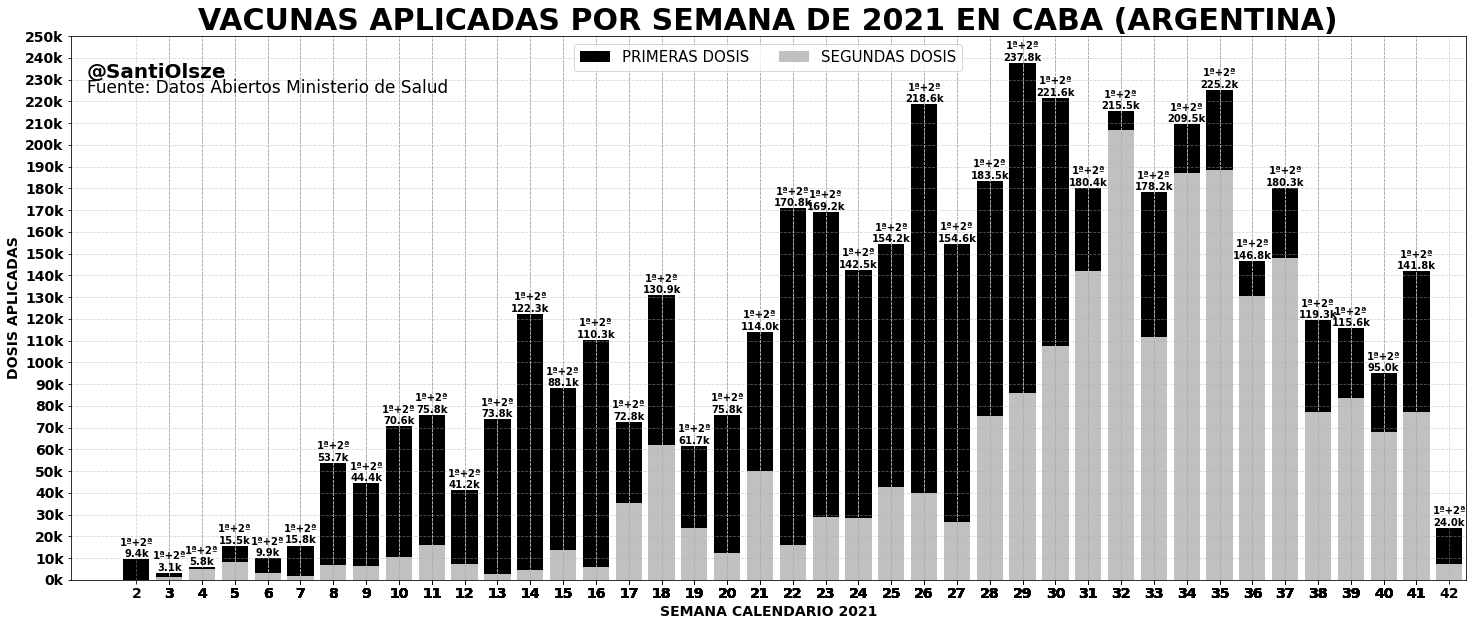

In [14]:
hide_last_week = False
#vacunas_base = pd.read_pickle("vacunas_base.pkl")
primeras = vacunas_base[(vacunas_base.orden_dosis == 1) & (vacunas_base.jurisdiccion_residencia == "CABA")]
primeras_grouped = primeras.groupby(["fecha_aplicacion"],as_index = False).sum()[["fecha_aplicacion","lote_vacuna"]].rename(columns = {"lote_vacuna":"n"})
primeras_grouped["fecha_aplicacion"] = pd.to_datetime(primeras_grouped.fecha_aplicacion.replace("S.I.","2020-12-29"))
primeras_grouped.sort_values("fecha_aplicacion", inplace = True)
primeras_grouped["cumsum"] = primeras_grouped.n.cumsum()
#primeras_grouped["cumporc"] = primeras_grouped["cumsum"] / pob * 100

segundas = vacunas_base[(vacunas_base.orden_dosis == 2)& (vacunas_base.jurisdiccion_residencia == "CABA")]
segundas_grouped = segundas.groupby(["fecha_aplicacion"],as_index = False).sum()[["fecha_aplicacion","lote_vacuna"]].rename(columns = {"lote_vacuna":"n"})
segundas_grouped["fecha_aplicacion"] = pd.to_datetime(segundas_grouped.fecha_aplicacion.replace("S.I.","2020-12-29"))
segundas_grouped.sort_values("fecha_aplicacion", inplace = True)
segundas_grouped["cumsum"] = segundas_grouped.n.cumsum()


#segundas_grouped["cumporc"] = segundas_grouped["cumsum"] / pob * 100



max_primeras = primeras_grouped["n"].max()
max_segundas = segundas_grouped["n"].max()


week = [i.isocalendar()[1] for i in primeras_grouped["fecha_aplicacion"]]
primeras_grouped["week"] = week

primeras_grouped2 = primeras_grouped.groupby(["week"],
                                            as_index = False
                                           ).sum()[["week","n"]].rename(columns = {"sexo":"n"})


week = [i.isocalendar()[1] for i in segundas_grouped["fecha_aplicacion"]]
segundas_grouped["week"] = week

segundas_grouped2 = segundas_grouped.groupby(["week"],
                                            as_index = False
                                           ).sum()[["week","n"]].rename(columns = {"sexo":"n"})


if hide_last_week:
    limit = datetime.datetime.today().isocalendar()[1]
else:
    limit = datetime.datetime.today().isocalendar()[1] + 1

m = pd.merge(primeras_grouped2,segundas_grouped2, on = "week")
m = m[m.week < limit]
m["total"] = m["n_x"] + m["n_y"]



max_primeras = primeras_grouped2["n"].max()
max_segundas = segundas_grouped2["n"].max()

w = 1  
plt.figure(figsize = (25,10))
plt.bar(m["week"], m["total"].rolling(window=w).mean() , linewidth = 5, color = "k", label = "PRIMERAS DOSIS")

plt.bar(m["week"], m["n_y"].rolling(window=w).mean() , linewidth = 5,color = "silver", label = "SEGUNDAS DOSIS")





plt.axhline(0, color = "w", linewidth = 1, ls = "-")
a = round(max_primeras*1.3)
b = round(max_segundas*1.2)
# n_a = len(str(a))-2
# a_m= round(a/10**n_a)*10**n_a
# n_b = len(str(b))-2
# b_m = round(b/10**n_b)*10**n_b
# la = int(a_m / 10**n_a)
# lb = int(b_m /10**n_b)


plt.text(x=0.5, y = a - 1500, s = "@SantiOlsze",fontsize = 20, fontweight = "bold")
plt.text(x=0.5, y = a - 8300, s = "Fuente: Datos Abiertos Ministerio de Salud",fontsize = 17)

#t1 = pd.Series(np.linspace(-b_m,0, int((0+lb)/(lb/10)+1)))
#t2 = pd.Series(np.linspace(0,a_m, int((0+la)/(la/10)+1)))

#t = t1.append(t2)
#t_labels = abs(t).astype(int)


for i in range(len(m)):
    plt.text(x = m.loc[i].week, y = m.loc[i].total + 5000, fontsize = 10, fontweight = "bold",
            s = "1ª+2ª\n{:.1f}k".format(m.loc[i].total/1000), va = "center", ha = "center")


t = np.linspace(0,250000,26)
t_labels = ["{:.0f}k".format(float(i/1000)) for i in t]
plt.title("VACUNAS APLICADAS POR SEMANA DE 2021 EN CABA (ARGENTINA)", fontweight = "bold", fontsize = 30)
plt.yticks(t,t_labels, fontweight = "bold", fontsize = 14);
# plt.ylabel("PORCENTAJE ACUMULADO DE PERSONAS VACUNADAS",fontweight = "bold", fontsize = 18)
# #plt.grid(alpha = 0.5)
# plt.xticks([i for i in primeras_grouped.fecha_aplicacion if i.day in [1]],rotation = 90, fontweight = "bold", fontsize = 18)
plt.xticks(week,rotation = 0, fontweight = "bold", fontsize = 14)
plt.yticks(t,t_labels,rotation = 0, fontweight = "bold", fontsize = 14);
plt.xlabel("SEMANA CALENDARIO 2021", fontweight = "bold", fontsize = 14)
plt.ylabel("DOSIS APLICADAS", fontweight = "bold", fontsize = 14)

plt.grid(alpha = 0.5, ls = "--")
plt.legend(loc = "upper center", fontsize = 15, ncol = 2)
plt.xlim(0, limit-0.5)

plt.savefig("semanal_vacunas_CABA", bbox_inches = "tight");

# POB > 50

In [110]:
pobs = pd.read_csv("pob_decenio.csv", index_col = None)
pobs50 = pobs[pobs.edad_inferior >= 50]
pobs50 = pobs50.groupby(["Provincia"], as_index = False).sum()[["Provincia","Cantidad"]]

In [121]:
dosis50 = vacunas_base[vacunas_base.grupo_etario.isin(['50-59',
 '60-69',
 '70-79',
 '80-89',
 '90-99',
 '>=100'])].groupby(["jurisdiccion_residencia","orden_dosis"]).sum()[["lote_vacuna"]]

In [122]:
dosis50

lote_vacuna
jurisdiccion_residencia orden_dosis             
Buenos Aires            1                4243977
                        2                3869734
CABA                    1                1071427
                        2                 962797
Catamarca               1                  93012
                        2                  81390
Chaco                   1                 219722
                        2                 161770
Chubut                  1                 129236
                        2                 107667
Corrientes              1                 239942
                        2                 189367
Córdoba                 1                 958398
                        2                 846197
Entre Ríos              1                 331763
                        2                 270186
Formosa                 1                 124673
                        2                  99168
Jujuy                   1                 158460
                        2                 129345
La Pampa                1                  98086
                        2                  92836
La Rioja                1                  79960
                        2                  69432
Mendoza                 1                 457481
                        2                 388811
Misiones                1                 206268
                        2                 164433
Neuquén                 1                 151047
                        2                 131547
Río Negro               1                 181370
                        2                 161713
Salta                   1                 258201
                        2                 197988
San Juan                1                 168850
                        2                 143620
San Luis                1                 117225
                        2                 110339
Santa Cruz              1                  64866
                        2                  58324
Santa Fe                1                 909335
                        2                 790502
Santiago del Estero     1                 198595
                        2                 172197
Tierra del Fuego        1                  35184
                        2                  33024
Tucumán                 1                 346813
                        2                 296264

In [123]:
for prov in pobs50.Provincia:
    pob = pobs50[pobs50.Provincia == prov].Cantidad
    sin_vacunar = pob  - dosis50.loc[(prov, 1)].lote_vacuna.item() 

    dosis50.loc[(prov,1),"lote_vacuna"] = dosis50.loc[(prov, 1)].lote_vacuna - dosis50.loc[(prov, 2)].lote_vacuna
    dosis50.loc[(prov, 0), "lote_vacuna"] = sin_vacunar.item()

In [126]:
dosis50.sort_values(["jurisdiccion_residencia","orden_dosis"]).to_csv("mayores_de_50.csv")

In [128]:
dosis50.sort_values(["jurisdiccion_residencia","orden_dosis"]).unstack().to_csv("mayores_de_50.csv")

In [128]:
vacunas_base.groupby("orden_dosis").sum()[["lote_vacuna"]]

lote_vacuna
orden_dosis             
1               36001591
2               27668667
3                 961237

In [19]:
u = vacunas_base[vacunas_base.orden_dosis == 1].groupby("fecha_aplicacion").sum()[["lote_vacuna"]]
d = vacunas_base[vacunas_base.orden_dosis == 2].groupby("fecha_aplicacion").sum()[["lote_vacuna"]]
t = vacunas_base[vacunas_base.orden_dosis == 3].groupby("fecha_aplicacion").sum()[["lote_vacuna"]]

for i in [u,d,t]:
    i["porcentaje"] = i.lote_vacuna.cumsum() / 45376753 * 100
    i.index = pd.to_datetime(i.index)

In [20]:
print(u.lote_vacuna.sum())
print(d.lote_vacuna.sum())
print(t.lote_vacuna.sum())

37893717
31874484
4281412


In [21]:
print(u.lote_vacuna.sum() / 45376753 * 100)
print(d.lote_vacuna.sum() / 45376753 * 100)
print(t.lote_vacuna.sum() / 45376753 * 100)

83.50909770912872
70.24408291179405
9.435254214861958


In [22]:
hitos = pd.read_csv("hitos.csv")
hitos["x"] = pd.to_datetime(hitos.x)

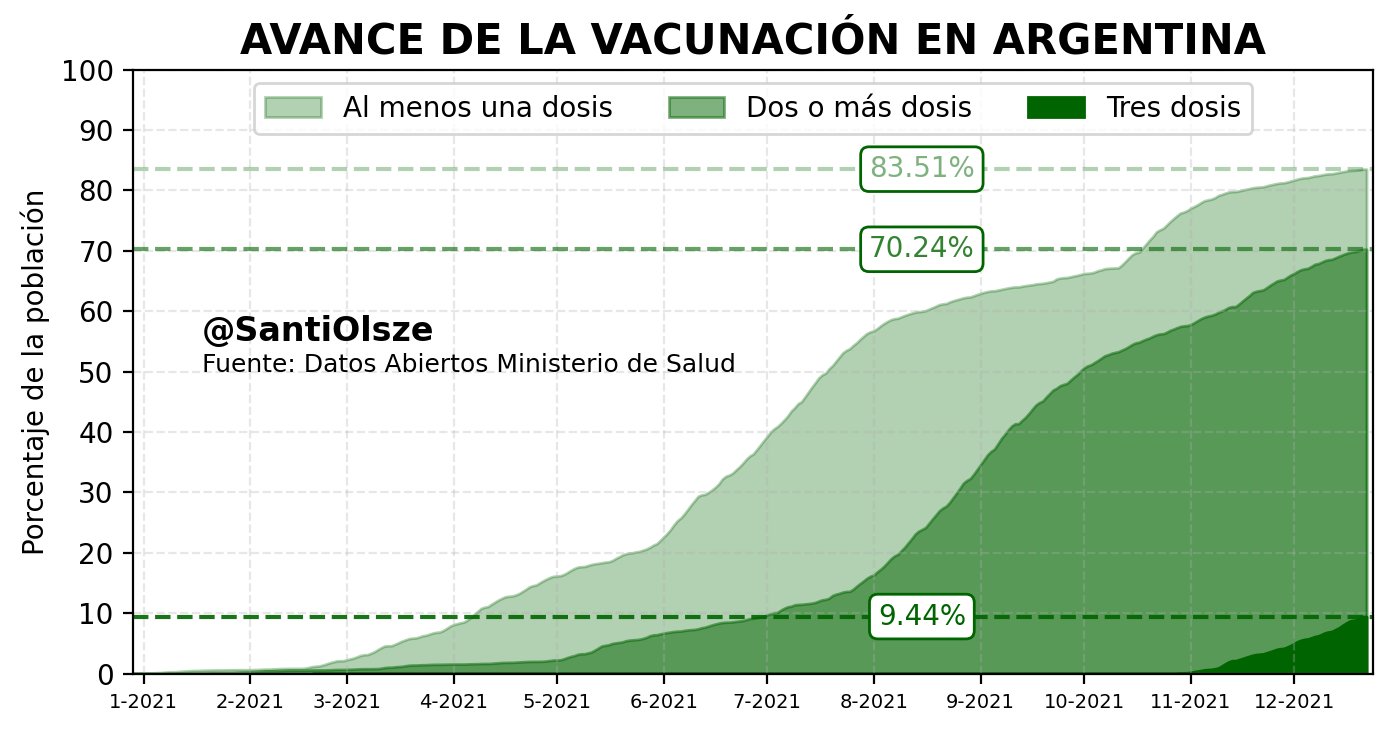

In [23]:
plt.figure(figsize = (8,4), dpi = 200)
plt.fill_between(u.index, u.porcentaje, label = "Al menos una dosis", alpha = .3, color = "darkgreen")
plt.fill_between(d.index, d.porcentaje, label = "Dos o más dosis", alpha = .5, color = "darkgreen")
plt.fill_between(t.index, t.porcentaje, label = "Tres dosis", alpha = 1, color = "darkgreen")


plt.grid(alpha =0.3, ls = "--")
plt.xticks([i for i in u.index if i.day == 1],[f"{i.month}-{i.year}" for i in u.index if i.day == 1], rotation = 0, fontsize = 7);
plt.ylim(0,100)
plt.xlim(u.index.min(), datetime.datetime.today() + datetime.timedelta(days = 1))
plt.yticks(np.linspace(0,100,11))
props = dict(boxstyle='round', facecolor='w', alpha=1, edgecolor = "k")
plt.title("AVANCE DE LA VACUNACIÓN EN ARGENTINA", fontweight = "bold", fontsize = 15)
plt.ylabel("Porcentaje de la población")
plt.legend(loc = "upper center", ncol = 3)

a = 100
plt.text(x=u.index[20], y = 55, s = "@SantiOlsze",fontsize = 12, fontweight = "bold")
plt.text(x=u.index[20], y = 50, s = "Fuente: Datos Abiertos Ministerio de Salud",fontsize = 9)

props = dict(boxstyle='round', facecolor='w', alpha=1, edgecolor = "darkgreen")


for z,i in enumerate([u,d,t]):
    plt.axhline(y = i.porcentaje.max(), ls = "--", color = "darkgreen", alpha = (z+1)*0.3)


plt.text(x = datetime.datetime.today() - datetime.timedelta(days = 130), y = u.porcentaje.max(),
         s = f"{u.porcentaje.max():.2f}%", color = "darkgreen", alpha = .5, 
         va = "center", ha = "center", bbox = props, fontsize = 10)


plt.text(x = datetime.datetime.today() - datetime.timedelta(days = 130), y = d.porcentaje.max(),
         s = f"{d.porcentaje.max():.2f}%", color = "darkgreen", alpha = .8, 
         va = "center", ha = "center", bbox = props, fontsize = 10)


plt.text(x = datetime.datetime.today() - datetime.timedelta(days = 130), y = t.porcentaje.max(),
         s = f"{t.porcentaje.max():.2f}%", color = "darkgreen", alpha = 1, 
         va = "center", ha = "center", bbox = props, fontsize = 10)

#for v,r in hitos.iterrows():
#    plt.text(r.x, r.y, r.h.replace(":,","\n"), va = "center", bbox = props, fontsize =6, ha = "center")
#    plt.axvline(r.x, ymax = (r.y)/75, color = "k" )
plt.savefig("hitos", bbox_inches = "tight")

In [24]:
u.max().porcentaje

83.50909770912872

In [105]:
z  = pd.DataFrame(columns = ["grupo_etario","vacuna","orden_dosis","lote_vacuna"])

In [106]:
prez = vacunas_base.groupby(["grupo_etario","vacuna","orden_dosis"], as_index = False).sum()[["grupo_etario","vacuna","orden_dosis","lote_vacuna"]]

In [281]:
c = vacunas_base[(vacunas_base.grupo_etario.isin(["3-11"]))].groupby(["jurisdiccion_residencia","jurisdiccion_aplicacion"]).sum()[["lote_vacuna"]].sort_values("lote_vacuna",ascending = False)

In [282]:
c["igual"] = [str(i[0] == i[1]).replace("True","MISMA PROVINCIA").replace("False","OTRA PROVINCIA") for i in c.index]

In [283]:
c = c.groupby(["jurisdiccion_residencia","igual"]).sum()

In [284]:
c = c.unstack()#.to_csv("resijuri.csv")

In [285]:
c["dist_"] = c[('lote_vacuna', 'MISMA PROVINCIA')]/c[('lote_vacuna', 'OTRA PROVINCIA')]

In [286]:
c.sort_values("dist_").to_csv("resijuri.csv")

Una dosis (Hombre)  Dos dosis (Hombre)  Tres dosis (Hombre)  \
0                   -0.0                -0.0                 -0.0   
1                   -0.0                -0.0                 -0.0   
2                   -1.0                -0.0                 -0.0   
3                -1332.0                -0.0                 -0.0   
4                -2725.0                -1.0                 -0.0   
...                  ...                 ...                  ...   
3325           -256036.0          -2320535.0             -62304.0   
3326              4988.0          -1718502.0            -159280.0   
3327             72523.0          -1377184.0            -161944.0   
3328             87193.0           -796878.0            -129572.0   
3329             25642.0           -304820.0             -44191.0   

      No vacunados (Hombre)  
0                -1146339.0  
1                -3435209.0  
2                -2178305.0  
3                -4293644.0  
4                -3219644.0  
...                     ...  
3325              -183280.0  
3326              -240671.0  
3327              -186820.0  
3328              -150708.0  
3329               -93541.0  

[3330 rows x 4 columns]

In [54]:
d.columns.str.contains("Hombre")

array([False, False,  True, False,  True, False,  True, False,  True,
       False, False, False, False, False, False])

In [108]:
d = pd.read_csv("../Flourish/tres_dosis.csv")
d = d[d.Fecha == "2021-11-26"]

d["tres"] = abs(d["Tres dosis (Hombre)"]) + abs(d["Tres dosis (Mujer)"])
#d["pob"] = abs(d["Tres dosis (Hombre)"]) + abs(d["Tres dosis (Mujer)"])

In [109]:
d["pob_h"] = abs(d[d.columns[d.columns.str.contains("Hombre")]]).sum(axis = 1)
d["pob_m"] = abs(d[d.columns[d.columns.str.contains("Mujer")]]).sum(axis = 1)
d["pob"] = d.pob_h + d.pob_m